In [ ]:
! pip install squarify
! pip install pyvi

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import squarify
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
# Download các thành phần cần thiết từ NLTK để xử lý tên, mô tả sản phẩm
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 📦 KHÁM PHÁ THỊ TRƯỜNG, CHIẾN LƯỢC TIẾP THỊ VÀ XU HƯỚNG KHÁCH HÀNG  
## Trên nền tảng Thương Mại Điện Tử **Tiki**

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Logo_Tiki_2023.png/1200px-Logo_Tiki_2023.png" alt="Tiki Logo" width="300">
</p>

# **1. ĐỌC DỮ LIỆU**

In [ ]:
# Đọc file CSV
file_path = "crawled_data.csv"
df = pd.read_csv(file_path)
rating_file_path = "comments_data_ncds_1.csv"
comment_df = pd.read_csv(rating_file_path)

In [ ]:
# Hiển thị thông tin chung
print("Thông tin chung về dữ liệu:")
print(df.info())

Thông tin chung về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9883 entries, 0 to 9882
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       9883 non-null   int64  
 1   name                     9883 non-null   object 
 2   da_ban                   9041 non-null   float64
 3   sku                      9883 non-null   int64  
 4   short_description        9882 non-null   object 
 5   price                    9883 non-null   int64  
 6   list_price               9883 non-null   int64  
 7   price_usd                0 non-null      float64
 8   discount                 9883 non-null   int64  
 9   discount_rate            9883 non-null   int64  
 10  review_count             9883 non-null   int64  
 11  order_count              0 non-null      float64
 12  inventory_status         9883 non-null   object 
 13  is_visible               0 non-null      float64
 

In [ ]:
# Hiển thị 5 dòng đầu tiên
print("\n5 dòng đầu tiên:")
print(df.head())


5 dòng đầu tiên:
          id                                               name   da_ban  \
0   58132909                              Sống, Làm Việc Và Yêu    21.00   
1   67991602     Đừng Làm Việc Chăm Chỉ Hãy Làm Việc Thông Minh     4.00   
2  262977989  Kế Toán Vỉa Hè - Thực Hành Báo Cáo Tài Chính C... 13631.00   
3  272422879  Truyện Ehon bé 3-4-5 tuổi - Bộ 4 cuốn Phát tri...    72.00   
4   55319105              Những Quy Luật Của Bản Chất Con Người  1185.00   

             sku                                  short_description   price  \
0  8259298798089  SỐNG, LÀM VIỆC VÀ YÊUChúng ta đang sống trong ...  118100   
1  5192596929430  Đừng Làm Việc Chăm Chỉ Hãy Làm Việc Thông Minh...  131250   
2  9472868482700  BIẾN KẾ TOÁN KHÔ KHAN TRỞ THÀNH TRÒ CHƠI CON T...  169000   
3  8676821081453  “Phát triển sáng tạo” là bộ 4 cuốn Best Seller...  194000   
4  9806315321486  Robert Greene, tác giả rất được ưa chuộng...  240000   

   list_price  price_usd  discount  discount_rate 

# **2. TIỀN XỬ LÝ DỮ LIỆU**

In [ ]:
# Xoá các cột hoàn toàn không có dữ liệu và không cần thiết
columns_to_drop = ["price_usd", "order_count", "is_visible", "product_name", "short_description",
                   "inventory_status", "stock_item_qty", "stock_item_max_sale_qty", "brand_id", "crawl_date"]
df_cleaned = df.drop(columns=columns_to_drop)

In [ ]:
# Xoá dòng trùng lặp
df_cleaned = df_cleaned.drop_duplicates()

In [ ]:
# Chuyển các cột có kiểu 'object' thành 'string'
for column in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[column] = df_cleaned[column].astype('string')
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9382 entries, 0 to 9882
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9382 non-null   int64  
 1   name           9382 non-null   string 
 2   da_ban         8573 non-null   float64
 3   sku            9382 non-null   int64  
 4   price          9382 non-null   int64  
 5   list_price     9382 non-null   int64  
 6   discount       9382 non-null   int64  
 7   discount_rate  9382 non-null   int64  
 8   review_count   9382 non-null   int64  
 9   brand_name     8473 non-null   string 
 10  category       9382 non-null   string 
dtypes: float64(1), int64(7), string(3)
memory usage: 879.6 KB
None


In [ ]:
# Kiểm giá trị null trong các cột
null_quantity = df_cleaned.isnull().sum()
null_percentages = df_cleaned.isnull().mean() * 100
duplicated_null_stats = pd.DataFrame({
    'Số lượng giá trị null': null_quantity,
    'Tỷ lệ giá trị null (%)': null_percentages
}).sort_values(by='Tỷ lệ giá trị null (%)', ascending=False)


print("Thông tin về missing value:")
print ("-"*80)
display(duplicated_null_stats)

Thông tin về missing value:
--------------------------------------------------------------------------------


Số lượng giá trị null  Tỷ lệ giá trị null (%)
brand_name                       909                    9.69
da_ban                           809                    8.62
id                                 0                    0.00
name                               0                    0.00
sku                                0                    0.00
list_price                         0                    0.00
price                              0                    0.00
discount                           0                    0.00
discount_rate                      0                    0.00
review_count                       0                    0.00
category                           0                    0.00

In [ ]:
df_cleaned["da_ban"] = df_cleaned["da_ban"].fillna(0)

In [ ]:
# Chuyển số lượng thành kiểu int
df_cleaned['da_ban'] = df_cleaned['da_ban'].astype(int)
# Đổi tên cột da_ban thành quantity_sold
df_cleaned = df_cleaned.rename(columns={'da_ban': 'quantity_sold'})

In [ ]:
category_mapping = {
    'nha-sach-tiki': 'Sách & Văn phòng phẩm (Tiki)',
    'nha-cua-doi-song': 'Nhà cửa đời sống',
    'dien-thoai-may-tinh-bang': 'Điện thoại & Máy tính bảng',
    'do-choi-me-be': 'Đồ chơi & Mẹ bé',
    'thiet-bi-kts-phu-kien-so': 'Thiết bị KTS & Phụ kiện số',
    'dien-gia-dung': 'Điện gia dụng',
    'lam-dep-suc-khoe': 'Làm đẹp & Sức khỏe',
    'o-to-xe-may-xe-dap': 'Ô tô, Xe máy & Xe đạp',
    'thoi-trang-nu': 'Thời trang nữ',
    'bach-hoa-online': 'Bách hóa online',
    'the-thao-da-ngoai': 'Thể thao & Dã ngoại',
    'thoi-trang-nam': 'Thời trang nam',
    'cross-border-hang-quoc-te': 'Hàng quốc tế',
    'laptop-may-vi-tinh-linh-kien': 'Laptop & Máy tính',
    'giay-dep-nam': 'Giày dép nam',
    'dien-tu-dien-lanh': 'Điện tử & Điện lạnh',
    'giay-dep-nu': 'Giày dép nữ',
    'may-anh': 'Máy ảnh',
    'phu-kien-thoi-trang': 'Phụ kiện thời trang',
    'ngon': 'Thực phẩm',
    'dong-ho-va-trang-suc': 'Đồng hồ & Trang sức',
    'balo-va-vali': 'Balo & Vali',
    'voucher-dich-vu': 'Voucher & Dịch vụ',
    'tui-vi-nu': 'Túi & Ví nữ',
    'tui-thoi-trang-nam': 'Túi thời trang nam',
    'cham-soc-nha-cua': 'Chăm sóc nhà cửa'
}

In [ ]:
df_cleaned['category_name'] = df_cleaned['category'].map(category_mapping)

In [ ]:
# Thay NaN trong Brand Name thành 'No Brand'
df_cleaned['brand_name'] = df_cleaned ['brand_name'].fillna('No Brand')

In [ ]:
# Kiểm giá trị null trong các cột
null_quantity = df_cleaned.isnull().sum()
null_percentages = df_cleaned.isnull().mean() * 100
duplicated_null_stats = pd.DataFrame({
    'Số lượng giá trị null': null_quantity,
    'Tỷ lệ giá trị null (%)': null_percentages
}).sort_values(by='Tỷ lệ giá trị null (%)', ascending=False)


print("Thông tin về missing value:")
print ("-"*80)
display(duplicated_null_stats)

Thông tin về missing value:
--------------------------------------------------------------------------------


Số lượng giá trị null  Tỷ lệ giá trị null (%)
id                                 0                    0.00
name                               0                    0.00
quantity_sold                      0                    0.00
sku                                0                    0.00
price                              0                    0.00
list_price                         0                    0.00
discount                           0                    0.00
discount_rate                      0                    0.00
review_count                       0                    0.00
brand_name                         0                    0.00
category                           0                    0.00
category_name                      0                    0.00

In [ ]:
print("\nSố dòng dữ liệu bị trùng lặp:")
print(df_cleaned.duplicated().sum())


Số dòng dữ liệu bị trùng lặp:
0


In [ ]:
# Tính thêm cột doanh thu vào dữ liệu
df_cleaned['revenue'] = df_cleaned['quantity_sold'] * df_cleaned['price']

In [ ]:
# Thêm cột để biết sản phẩm có nằm trong chương trình khuyến mãi hay không
df_cleaned['has_discount'] = (df_cleaned['discount_rate'] > 0).astype(int)

In [ ]:
df_cleaned.to_csv("cleaned_data.csv", index=False)

In [ ]:
# Hiển thị thông tin chung
print("Thông tin chung về dữ liệu:")
print(df_cleaned.info())

Thông tin chung về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
Index: 9382 entries, 0 to 9882
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             9382 non-null   int64 
 1   name           9382 non-null   string
 2   quantity_sold  9382 non-null   int64 
 3   sku            9382 non-null   int64 
 4   price          9382 non-null   int64 
 5   list_price     9382 non-null   int64 
 6   discount       9382 non-null   int64 
 7   discount_rate  9382 non-null   int64 
 8   review_count   9382 non-null   int64 
 9   brand_name     9382 non-null   string
 10  category       9382 non-null   string
 11  category_name  9382 non-null   object
 12  revenue        9382 non-null   int64 
 13  has_discount   9382 non-null   int64 
dtypes: int64(10), object(1), string(3)
memory usage: 1.1+ MB
None


| **Tên Cột**         | **Kiểu Dữ Liệu** | **Ý Nghĩa** |
|---------------------|------------------|-------------|
| `id`                | `int64`          | Mã định danh duy nhất cho mỗi sản phẩm. |
| `name`              | `string`         | Tên đầy đủ của sản phẩm. |
| `quantity_sold`            | `int64`        | Số lượng sản phẩm đã bán |
| `sku`               | `int64`          | Mã hàng hóa để theo dõi tồn kho (SKU - Stock Keeping Unit). |
| `price`             | `int64`          | Giá bán thực tế (đã giảm) của sản phẩm, đơn vị VNĐ. |
| `list_price`        | `int64`          | Giá gốc/giá niêm yết ban đầu của sản phẩm, đơn vị VNĐ. |
| `discount`          | `int64`          | Số tiền được giảm giá, tính bằng `list_price - price`. |
| `discount_rate`     | `int64`          | Phần trăm giảm giá so với giá gốc, `(discount/list_price) * 100`. |
| `review_count`      | `int64`          | Số lượt đánh giá mà sản phẩm nhận được từ khách hàng. |
| `brand_name`        | `string`         | Tên thương hiệu của sản phẩm. |
| `category`          | `string`         | Danh mục sản phẩm mà mặt hàng thuộc về. |
| `category_name`          | `string`         | Danh mục sản phẩm đã chuyển đổi. |
| `revenue`          | `int64`         | Doanh thu của một sản phẩm (giá bán*số lượng)|
| `has_discount`          | `int64`         | Cột đánh dấu sản phẩm có khuyến mãi hay không|


In [ ]:
# Hiển thị 5 dòng đầu tiên
print("\n5 dòng đầu tiên:")
print(df_cleaned.head())


5 dòng đầu tiên:
          id                                               name  \
0   58132909                              Sống, Làm Việc Và Yêu   
1   67991602     Đừng Làm Việc Chăm Chỉ Hãy Làm Việc Thông Minh   
2  262977989  Kế Toán Vỉa Hè - Thực Hành Báo Cáo Tài Chính C...   
3  272422879  Truyện Ehon bé 3-4-5 tuổi - Bộ 4 cuốn Phát tri...   
4   55319105              Những Quy Luật Của Bản Chất Con Người   

   quantity_sold            sku   price  list_price  discount  discount_rate  \
0             21  8259298798089  118100      139000     20900             15   
1              4  5192596929430  131250      175000     43750             25   
2          13631  9472868482700  169000      199000     30000             15   
3             72  8676821081453  194000      194000         0              0   
4           1185  9806315321486  240000      300000     60000             20   

   review_count brand_name       category                 category_name  \
0             2   No Br

# **3. PHÂN TÍCH KHÁM PHÁ DỮ LIỆU**


In [ ]:
print("\nThống kê mô tả:\n", df_cleaned.describe())


Thống kê mô tả:
                 id  quantity_sold              sku       price  list_price  \
count      9382.00        9382.00          9382.00     9382.00     9382.00   
mean  169200556.79        1108.00 5465098138652.83   849235.52   973925.65   
std    96021834.40       15527.24 2616627956642.62  2932949.07  3212156.08   
min       54665.00           0.00 1000918878892.00     1000.00     1000.00   
25%    80813951.50           4.00 3184431091443.25    90000.00    99000.00   
50%   183687085.00          25.00 5432682449676.00   199000.00   240000.00   
75%   273682487.25         158.00 7720519140322.25   480750.00   549000.00   
max   277938153.00     1048543.00 9997758962536.00 67667000.00 67667000.00   

         discount  discount_rate  review_count         revenue  has_discount  
count     9382.00        9382.00       9382.00         9382.00       9382.00  
mean    124690.14          10.25         59.08    351971824.86          0.38  
std     589282.45          16.16        26

In [ ]:
print("Kích thước dữ liệu:", df_cleaned.shape)
print("Số bản ghi trùng lặp:", df_cleaned.duplicated().sum())
print("Số giá trị thiếu:", df_cleaned.isnull().sum().sum())
print("\nKiểu dữ liệu:\n", df_cleaned.dtypes)
print("\nĐộ đa dạng của các cột:\n", df_cleaned.nunique())

Kích thước dữ liệu: (9382, 14)
Số bản ghi trùng lặp: 0
Số giá trị thiếu: 0

Kiểu dữ liệu:
 id                        int64
name             string[python]
quantity_sold             int64
sku                       int64
price                     int64
list_price                int64
discount                  int64
discount_rate             int64
review_count              int64
brand_name       string[python]
category         string[python]
category_name            object
revenue                   int64
has_discount              int64
dtype: object

Độ đa dạng của các cột:
 id               9378
name             9273
quantity_sold    1543
sku              9378
price            2198
list_price       1861
discount         1184
discount_rate      75
review_count      582
brand_name       1668
category           26
category_name      26
revenue          6184
has_discount        2
dtype: int64


In [ ]:
print("\nSố lượng sản phẩm ở các danh mục:\n", df_cleaned['category'].value_counts())


Số lượng sản phẩm ở các danh mục:
 category
nha-sach-tiki                   383
may-anh                         376
balo-va-vali                    374
nha-cua-doi-song                374
thoi-trang-nu                   372
o-to-xe-may-xe-dap              372
dong-ho-va-trang-suc            372
dien-gia-dung                   370
phu-kien-thoi-trang             369
giay-dep-nu                     368
giay-dep-nam                    367
the-thao-da-ngoai               367
do-choi-me-be                   366
ngon                            366
thiet-bi-kts-phu-kien-so        365
cham-soc-nha-cua                364
bach-hoa-online                 364
lam-dep-suc-khoe                363
tui-thoi-trang-nam              362
tui-vi-nu                       362
dien-tu-dien-lanh               362
thoi-trang-nam                  361
cross-border-hang-quoc-te       360
laptop-may-vi-tinh-linh-kien    359
dien-thoai-may-tinh-bang        330
voucher-dich-vu                 234
Name: count, dtype:

In [ ]:
print("\nSố lượng sản phẩm ở các brand:\n", df_cleaned['brand_name'].value_counts())


Số lượng sản phẩm ở các brand:
 brand_name
No Brand       911
OEM            830
BIGGBEN        184
ANANSHOP688    184
Bee Gee        130
              ... 
Quang Long       1
AlphaVH          1
ECO deals        1
DENKMIT          1
Homemark         1
Name: count, Length: 1668, dtype: Int64


In [ ]:
print("\nhân phối của các giá trị discount_rate:\n", df_cleaned['discount_rate'].value_counts())


hân phối của các giá trị discount_rate:
 discount_rate
0     5839
50     316
5      314
20     141
30     135
      ... 
56       1
89       1
73       1
77       1
66       1
Name: count, Length: 75, dtype: int64


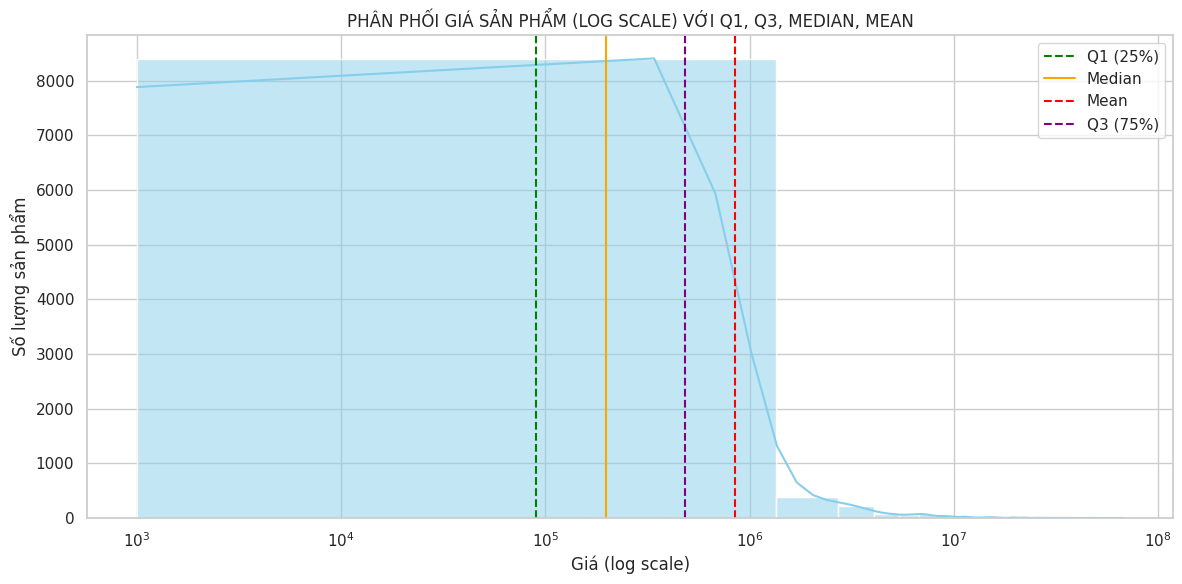

In [ ]:
q1 = df_cleaned['price'].quantile(0.25)
q3 = df_cleaned['price'].quantile(0.75)
mean_price = df_cleaned['price'].mean()
median_price = df_cleaned['price'].median()

plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True, color='skyblue')
plt.axvline(q1, color='green', linestyle='--', label='Q1 (25%)')
plt.axvline(median_price, color='orange', linestyle='-', label='Median')
plt.axvline(mean_price, color='red', linestyle='--', label='Mean')
plt.axvline(q3, color='purple', linestyle='--', label='Q3 (75%)')
plt.xscale('log')
plt.title('PHÂN PHỐI GIÁ SẢN PHẨM (LOG SCALE) VỚI Q1, Q3, MEDIAN, MEAN')
plt.xlabel('Giá (log scale)')
plt.ylabel('Số lượng sản phẩm')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

🔍 Khám phá thị trường

- Phân phối lệch phải rõ rệt: Chứng tỏ phần lớn sản phẩm nằm ở phân khúc giá thấp
– đây là khu vực hoạt động của phần đông người bán, phản ánh một thị trường có tính đại chúng cao.

- Tập trung mạnh vào khoảng Q1–Q3 (IQR): Gần 50% sản phẩm có giá trong khoảng này, định hình phân khúc phổ thông và tầm trung – đây là nơi thị trường sôi động nhất, cạnh tranh nhiều nhất.

- Sự xuất hiện của giá trị ngoại lai (outliers): Những sản phẩm có giá rất cao (trên mức Q3 xa) như xe máy, đồ công nghệ cao... chiếm tỷ lệ nhỏ nhưng kéo mean lên cao – cho thấy có một phân khúc cao cấp tuy nhỏ nhưng có thể là cơ hội cho các chiến lược tiếp thị chuyên biệt.

🎯 Gợi ý chiến lược tiếp thị
Chiến lược giá linh hoạt theo phân khúc:

- Tập trung ưu đãi, quảng bá sản phẩm trong IQR – nơi khách hàng phổ thông và trung lưu tập trung.

- Đồng thời, khai thác phân khúc cao cấp với định vị thương hiệu cao cấp, tiếp thị cá nhân hóa, tạo giá trị trải nghiệm.

- Tận dụng sự phổ biến của phân khúc giá thấp để:

- Thu hút khách hàng mới bằng các sản phẩm giá cạnh tranh.

- Dùng như điểm chạm đầu tiên để upsell các sản phẩm cao cấp hơn.

📈 Xu hướng hành vi khách hàng
- Đa số người tiêu dùng nhạy cảm với giá: Median thấp hơn Mean phản ánh người dùng thường chọn sản phẩm giá hợp lý, tránh những sản phẩm quá cao.

- Xu hướng tìm kiếm sản phẩm "giá trị tốt": Dễ thấy cơ hội cho các nhãn hàng nhấn mạnh vào “chi phí – hiệu năng”, hoặc đưa ra combo, giảm giá thông minh trong nhóm IQR.

In [ ]:
# Xác định ngưỡng top 1%
threshold = df_cleaned['price'].quantile(0.99)
print(f"Ngưỡng top 1% giá cao: {threshold:,.0f} VND")

# Lọc sản phẩm giá cao
high_price_products = df_cleaned[df_cleaned['price'] > threshold]

Ngưỡng top 1% giá cao: 12,613,110 VND


In [ ]:
# Top sản phẩm giá cao nhất
high_price_products = high_price_products.sort_values(by='price', ascending=False)
print(high_price_products[['name', 'category', 'price', 'quantity_sold', 'review_count']].head(10))

                                                   name  \
3061   Xe Máy Honda SH Mode 2024 - Phiên Bản Đặc Biệt   
2865    Xe Máy Honda SH Mode 2024 - Phiên Bản Thể Thao   
2864       Xe máy Honda SH Mode 125cc 2024 - Tiêu chuẩn   
2786  Xe Máy Honda LEAD 125cc 2025 - Phiên Bản Đặc Biệt   
6929    Ống Kính Sony FE 50mm F1.2 GM - Hàng Chính Hãng   
3057  Xe máy Honda Air Blade 125cc 2025 - Phiên Bản ...   
3052  Xe máy Honda Lead 125cc 2025 - Phiên Bản Đặc ...   
2774         Xe máy Honda Air Blade 125 Tiêu Chuẩn 2025   
1007  Điện thoại Samsung Galaxy Z Fold4 5G (12GB/256...   
2815                             Xe máy Honda LEAD 2025   

                      category     price  quantity_sold  review_count  
3061        o-to-xe-may-xe-dap  67667000             27             7  
2865        o-to-xe-may-xe-dap  67667000             22             7  
2864        o-to-xe-may-xe-dap  60370000              7             1  
2786        o-to-xe-may-xe-dap  48459000             87       

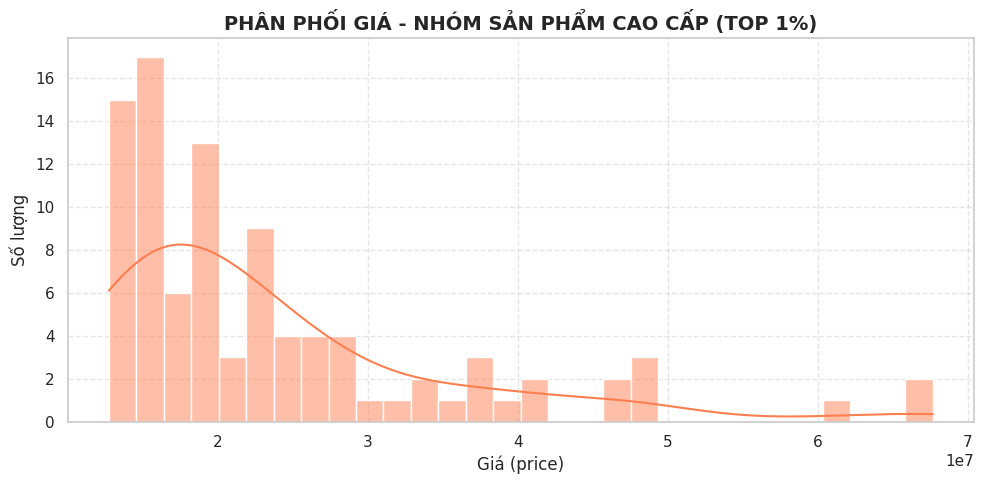

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(high_price_products['price'], bins=30, kde=True, color='#FF7F50')
plt.title('PHÂN PHỐI GIÁ - NHÓM SẢN PHẨM CAO CẤP (TOP 1%)', fontsize=14, fontweight='bold')
plt.xlabel('Giá (price)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

📊 Phân phối giá – Nhóm sản phẩm cao cấp (Top 1%) trên TIKI<br>
Biểu đồ thể hiện phân phối giá của nhóm sản phẩm thuộc top 1% đắt nhất trên sàn thương mại điện tử TIKI, đại diện cho phân khúc cao cấp và siêu cao cấp.

🔍 Khám phá thị trường cao cấp

- Phân phối lệch phải rõ rệt: Hầu hết sản phẩm cao cấp có giá dao động trong khoảng 15 – 30 triệu đồng, với một số ít ngoại lệ có giá vượt 60 triệu đồng.

- Đỉnh mật độ KDE trong vùng 18 – 22 triệu đồng → Đây chính là mức giá phổ biến nhất trong nhóm cao cấp, hình thành nên một "vùng neo giá" quan trọng.

- Tính phân tầng rõ rệt: Dễ thấy ba nhóm giá đang dần định hình:

 -  Trung – Cao cấp: 15–30 triệu (chiếm đa số).

 - Cao cấp: 30–50 triệu (ít dần).

 - Siêu cao cấp: Trên 60 triệu (hiếm, có tính biểu tượng).

🎯 Chiến lược tiếp thị gợi ý

1. Tập trung vào phân khúc cao cấp dễ tiếp cận (15–30 triệu)
→ Là vùng giá chiếm tỷ trọng cao nhất, phù hợp để:

- Thúc đẩy doanh số thông qua combo quà tặng, ưu đãi "cao cấp nhưng vừa tầm".

- Định vị sản phẩm theo hướng “đáng đầu tư” thay vì chỉ đắt đỏ.

2. Tối ưu hóa trải nghiệm – không chỉ tối ưu giá
→ Với nhóm từ 30 triệu trở lên:

- Cần tập trung mạnh vào thương hiệu, bảo hành, trải nghiệm hậu mãi, nội dung đánh giá chất lượng cao.

- Áp dụng chiến lược tiếp thị cảm xúc: khẳng định đẳng cấp, sự khác biệt, trải nghiệm cá nhân hóa.

3. Phân phối riêng cho nhóm siêu cao cấp
→ Dù ít, nhóm >60 triệu vẫn có sức mua tốt nếu khai thác đúng cách:

- Đề xuất chuyên mục riêng, giao diện độc quyền, hoặc tư vấn viên cao cấp.

- Tận dụng các dịp đặc biệt (quốc khánh, sinh nhật, VIP day…) để tung sản phẩm flagship (sản phẩm chủ lực, đại diện cho chất lượng, công nghệ cao cấp một thương hiệu).

📈 Xu hướng hành vi khách hàng
- Người dùng Tiki vẫn quan tâm đến nhóm cao cấp, nhưng không quá thiên về xa xỉ → Họ kỳ vọng chất lượng và tính xứng đáng hơn là giá trị thương hiệu tuyệt đối.

- Tệp khách hàng trung lưu nâng cấp tiêu dùng (aspirational buyers) đang nổi lên: sẵn sàng chi từ 15–25 triệu nếu cảm thấy hợp lý, hữu ích hoặc nâng tầm trải nghiệm.

✅ Kết luận định hướng
- Tiki đang có một tầng khách hàng tiềm năng trong nhóm cao cấp vừa tầm (15–30 triệu), cần tập trung tiếp thị vào giá trị – trải nghiệm – chất lượng.

- Với các sản phẩm trên 30 triệu, chiến lược nên chuyển từ đại trà sang cá nhân hóa và xây dựng thương hiệu đẳng cấp.

- Sự hiện diện của nhóm siêu cao cấp là cơ hội tạo hiệu ứng “halo” cho toàn bộ danh mục cao cấp của sàn.



📊 Nhận xét:

🧠Insight thị trường:
Nhóm giá < 500k áp đảo tuyệt đối, vượt mốc 7000 sản phẩm → TIKI là thị trường có độ phủ cực cao với sản phẩm bình dân.

Số lượng giảm mạnh ở các mốc giá cao hơn, đặc biệt nhóm > 5 triệu gần như chỉ chiếm một phần rất nhỏ.

🎯 Chiến lược tiếp thị:
Chiến lược số lượng – thay vì lợi nhuận trên mỗi sản phẩm nên được áp dụng cho nhóm < 500k → ưu đãi flash sale, voucher số lượng lớn, gợi ý combo kèm sản phẩm chính.

Nên phân biệt rõ tiếp cận nhóm khách hàng bình dân và trung lưu:

Bình dân: nhạy cảm giá, quan tâm phí ship, ưu đãi.

Trung lưu: quan tâm đến bảo hành, review chất lượng, giá trị sử dụng lâu dài.

📈 Xu hướng người dùng:
Người tiêu dùng Tiki ưa chuộng giao dịch online cho sản phẩm nhỏ – tiện – nhanh hơn là các đơn hàng lớn → phù hợp với hành vi mua lặt vặt, săn sale nhanh.

In [ ]:
# Phân nhóm theo mức giá
price_bins = [0, 500_000, 1_000_000, 5_000_000, float('inf')]
price_labels = ['<500k', '500k–1tr', '1–5tr', '>5tr']

In [ ]:
df_cleaned['price_group'] = pd.cut(df_cleaned['price'], bins=price_bins, labels=price_labels)
price_group_counts = df_cleaned['price_group'].value_counts().sort_index()

<ipython-input-227-dac4c50d0915>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_group_counts.index, y=price_group_counts.values, palette='Set2')


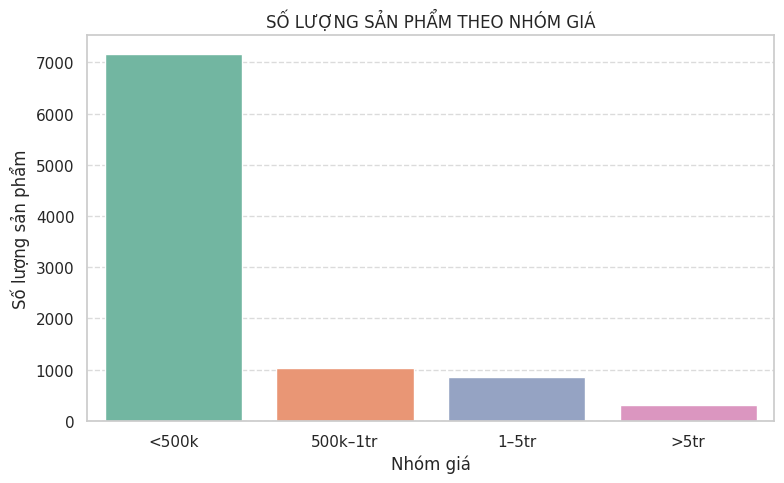

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=price_group_counts.index, y=price_group_counts.values, palette='Set2')
plt.title('SỐ LƯỢNG SẢN PHẨM THEO NHÓM GIÁ')
plt.xlabel('Nhóm giá')
plt.ylabel('Số lượng sản phẩm')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned['category_name'] = df_cleaned['category'].map(category_mapping)

<ipython-input-229-64a95e26889d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df_cleaned.groupby(['category_name', 'price_segment']).size().unstack(fill_value=0)


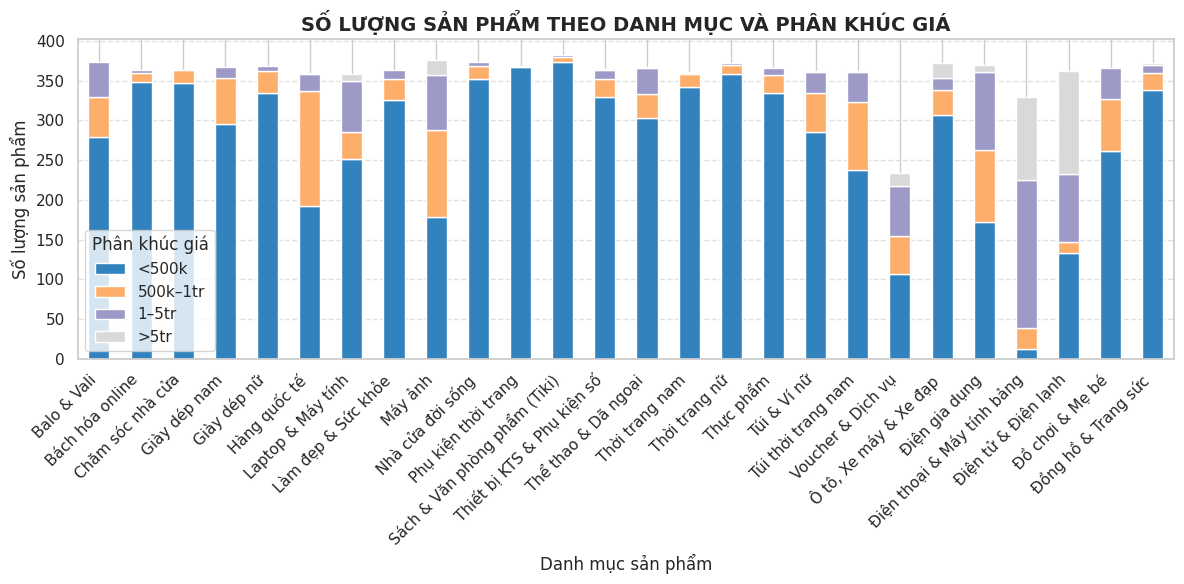

In [ ]:
df_cleaned['price_segment'] = pd.cut(df_cleaned['price'], bins=price_bins, labels=price_labels)

pivot = df_cleaned.groupby(['category_name', 'price_segment']).size().unstack(fill_value=0)

ax = pivot.plot.bar(
    stacked=True,
    figsize=(12, 6),
    colormap='tab20c'
)

plt.title("SỐ LƯỢNG SẢN PHẨM THEO DANH MỤC VÀ PHÂN KHÚC GIÁ", fontsize=14, fontweight='bold')
plt.xlabel("Danh mục sản phẩm", fontsize=12)
plt.ylabel("Số lượng sản phẩm", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Phân khúc giá')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- Phân khúc <500k áp đảo toàn diện
 - Gần như mọi danh mục đều có số lượng sản phẩm bình dân chiếm chủ đạo, đặc biệt: sách, thời trang, phụ kiện, điện gia dụng, đồ mẹ bé, voucher dịch vụ

- Phản ánh chiến lược phổ thông của Tiki: phủ rộng nhiều ngành hàng ở phân khúc đại trà.

 - Các danh mục thiên về sản phẩm trung – cao cấp
Nhóm có tỷ trọng cao ở giá từ 1–5 triệu hoặc >5 triệu: Laptop & Máy tính, Điện thoại & Máy tính bảng, Máy ảnh, Hàng quốc tế.

  → Đây là những ngành hàng có giá trị cao tự nhiên, hoặc thuộc phân khúc khách hàng đầu tư mạnh cho chất lượng.

🎯 Chiến lược tiếp thị theo ngành – phân khúc giá

| **Danh mục**                         | **Nhóm giá chi phối**         | **Gợi ý chiến lược** |
|--------------------------------------|-------------------------------|----------------------|
| **Voucher, sách, đồ mẹ bé**          | <500k                         | Tận dụng các chiến dịch **Flash Sale**, **Combo**, **Freeship**. Tập trung vào **khuyến mãi theo mùa hoặc dịp lễ**. |
| **Điện tử, laptop, máy ảnh**         | 1tr–5tr và >5tr               | Đẩy mạnh **đánh giá sản phẩm**, **bảo hành mở rộng**, **gợi ý upsell** (balo, phụ kiện), **livestream trải nghiệm**. |
| **Thời trang – phụ kiện**            | Cân bằng giữa <500k và 500k–1tr | Tạo các **gói mix đồ**, **flash deal theo trend**, nội dung tương tác kiểu **“mặc gì hôm nay”** để tăng chuyển đổi. |
| **Cross-border / hàng quốc tế**      | Trên 1 triệu là chủ đạo       | Tập trung **xây dựng niềm tin** qua **đánh giá thực tế**, **chính sách đổi trả rõ ràng**, **chứng minh chất lượng**. |

→ Tính phân khúc rất rõ ràng theo ngành hàng → cơ hội lớn cho cá nhân hóa tiếp thị.

<ipython-input-230-0c77ceb3f3b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


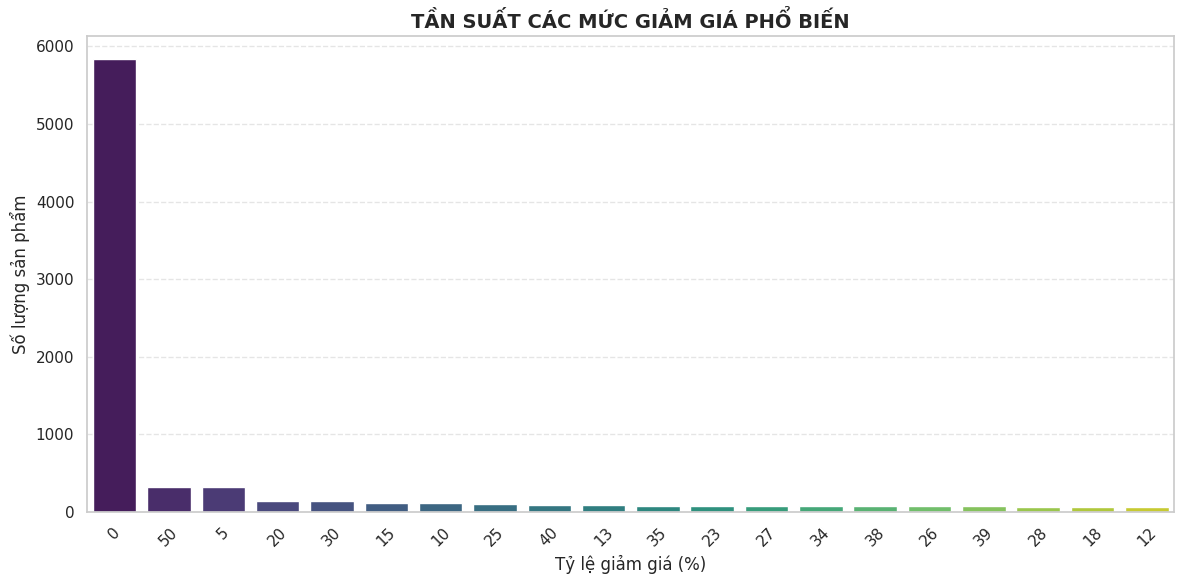

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='discount_rate',
    data=df_cleaned,
    order=df_cleaned['discount_rate'].value_counts().index[:20],
    palette='viridis'
)
plt.title('TẦN SUẤT CÁC MỨC GIẢM GIÁ PHỔ BIẾN', fontsize=14, fontweight='bold')
plt.xlabel('Tỷ lệ giảm giá (%)', fontsize=12)
plt.ylabel('Số lượng sản phẩm', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Biểu đồ trên thể hiện số lượng sản phẩm tương ứng với các mức giảm giá khác nhau.

🔍 Nhận xét:
- Mức giảm giá **0%** chiếm tỷ trọng lớn nhất → phần lớn sản phẩm không được giảm giá.
- Một số mức giảm giá phổ biến khác là **10%, 20%, 50%**, cho thấy các chiến lược khuyến mãi thường được làm tròn để dễ truyền thông.
- Mức giảm sâu như **70% hoặc 89%** tuy xuất hiện nhưng rất hiếm, thường chỉ dùng cho sản phẩm xả hàng hoặc thu hút traffic (thu hút lượng người dùng truy cập vào Tiki).

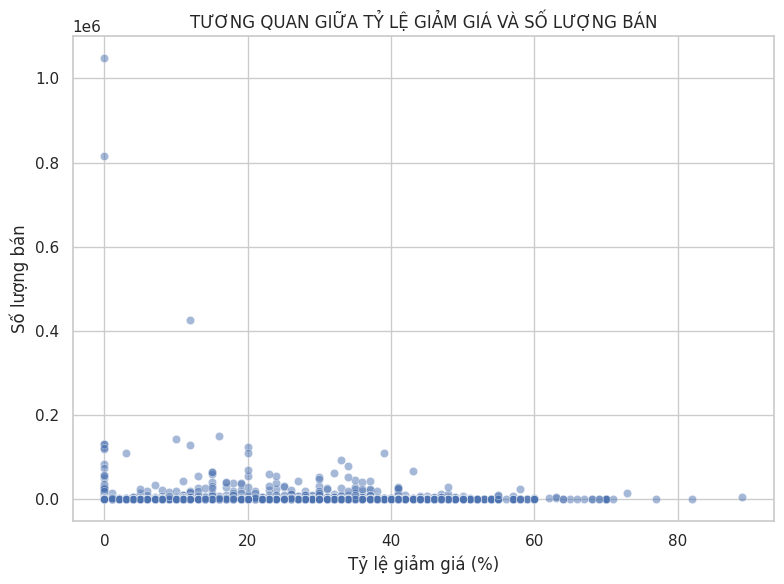

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='discount_rate', y='quantity_sold', alpha=0.5)
plt.title('TƯƠNG QUAN GIỮA TỶ LỆ GIẢM GIÁ VÀ SỐ LƯỢNG BÁN')
plt.xlabel('Tỷ lệ giảm giá (%)')
plt.ylabel('Số lượng bán')
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 Khám phá thị trường
- Mật độ điểm tập trung nhiều ở vùng giảm giá thấp (<30%), cho thấy hầu hết sản phẩm không giảm quá sâu.

- Một số sản phẩm bán cực kỳ chạy (gần 1 triệu lượt bán) lại có mức giảm giá rất thấp (~0–10%).

- Không có xu hướng rõ ràng cho thấy “giảm giá càng nhiều thì bán càng chạy” → tức mối quan hệ không tuyến tính giữa giảm giá và số lượng bán.

🎯 Chiến lược tiếp thị gợi ý

| **Nhận định** | **Hành động chiến lược** |
|---------------|---------------------------|
| **Giảm giá nhiều không đảm bảo tăng mạnh doanh số** | Cần **đánh giá lại ROI - Tỷ suất hoàn vốn** của các chương trình giảm sâu – tránh **lạm dụng giảm giá >50%** nếu không có yếu tố khác hỗ trợ (chất lượng, thương hiệu, đánh giá tốt...). |
| **Sản phẩm bán chạy nhất không giảm giá sâu** | Cân nhắc chiến lược **giữ giá ổn định** cho các sản phẩm “best-seller”, tập trung vào **chất lượng, thương hiệu, review** thay vì giảm giá. |
| **Sản phẩm giảm giá trung bình (~10–30%) có tiềm năng tốt** | Nên đặt **tỷ lệ giảm giá hợp lý** đi kèm **chiến dịch truyền thông cụ thể** như Flash Sale, banner nổi bật, chương trình đồng giá, v.v. |


<ipython-input-232-ac47368bc34f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


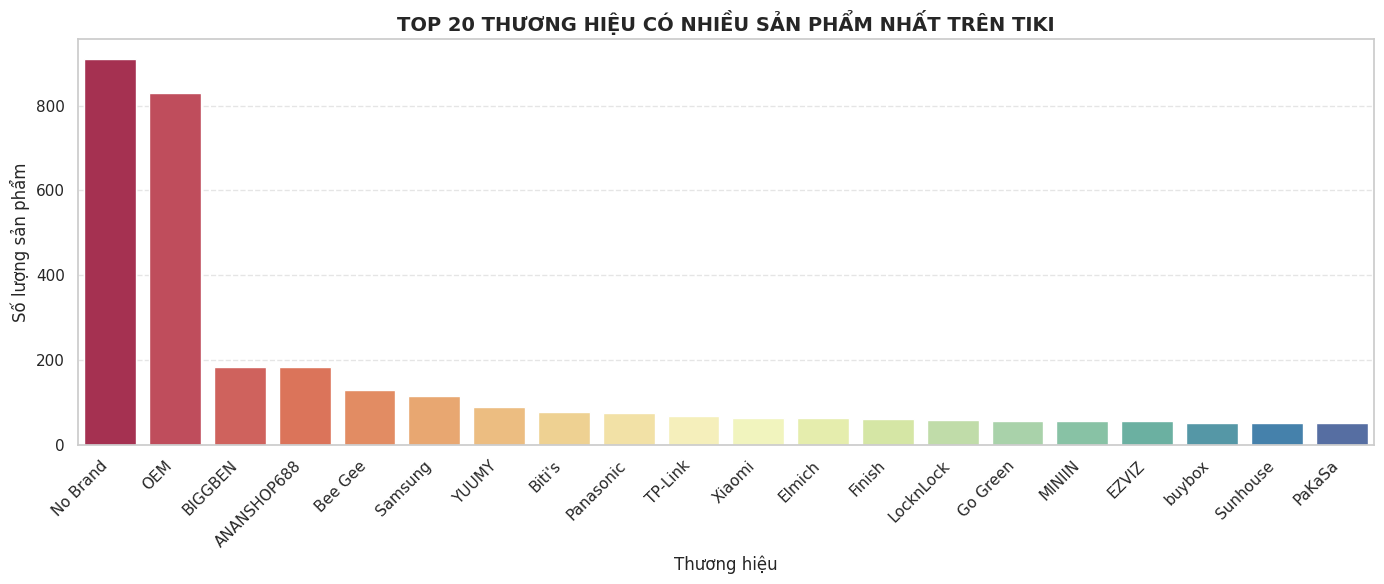

In [ ]:
plt.figure(figsize=(14, 6))
top_brands = df_cleaned['brand_name'].value_counts().nlargest(20).index

sns.countplot(
    x='brand_name',
    data=df_cleaned[df_cleaned['brand_name'].isin(top_brands)],
    order=top_brands,
    palette='Spectral'
)

plt.title('TOP 20 THƯƠNG HIỆU CÓ NHIỀU SẢN PHẨM NHẤT TRÊN TIKI', fontsize=14, fontweight='bold')
plt.xlabel('Thương hiệu', fontsize=12)
plt.ylabel('Số lượng sản phẩm', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

🏷️ Top 20 thương hiệu có nhiều sản phẩm nhất - đa dạng nhất

Biểu đồ thể hiện số lượng sản phẩm đến từ 20 thương hiệu có mặt nhiều nhất trong tập dữ liệu.

🔍 Nhận xét:
- Một số thương hiệu có số lượng sản phẩm **vượt trội**, cho thấy mức độ bao phủ mạnh trong sàn TMĐT.
- Một số thương hiệu còn lại có số lượng sản phẩm thấp hơn đáng kể so với top đầu, nhưng vẫn góp mặt trong danh sách. Điều này cho thấy họ có thể là các thương hiệu chuyên biệt, tập trung phát triển sản phẩm trong một danh mục cụ thể thay vì trải rộng nhiều ngành hàng.


<ipython-input-233-097e127451ed>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


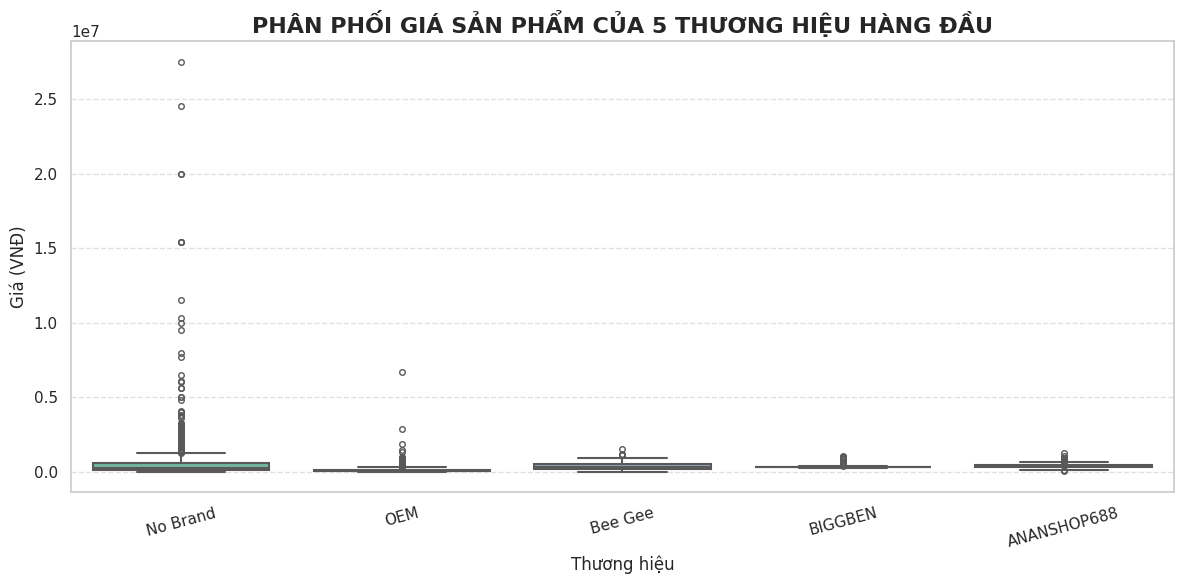

In [ ]:
top_brands = df_cleaned['brand_name'].value_counts().nlargest(5).index
subset = df_cleaned[df_cleaned['brand_name'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.boxplot(
    x='brand_name',
    y='price',
    data=subset,
    palette='Set2',
    linewidth=1.5,
    fliersize=4
)

plt.title('PHÂN PHỐI GIÁ SẢN PHẨM CỦA 5 THƯƠNG HIỆU HÀNG ĐẦU', fontsize=16, fontweight='bold')
plt.xlabel('Thương hiệu', fontsize=12)
plt.ylabel('Giá (VNĐ)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


💡 So sánh Phân phối Giá giữa Top 5 Thương hiệu Biểu đồ Boxplot thể hiện rõ sự khác biệt về chiến lược giá giữa các thương hiệu:

📊 Phân tán giá:

Một số thương hiệu có phạm vi giá rất rộng (giá trị từ thấp đến rất cao), thể hiện dải sản phẩm đa dạng.

Một vài thương hiệu có phân phối giá hẹp, tập trung ở phân khúc cụ thể.

🚩 Outliers (giá ngoại lệ):

Có nhiều điểm outliers ở mức giá cao, phản ánh các sản phẩm cao cấp hoặc giá niêm yết bất thường.

Việc này cần được theo dõi để tránh ảnh hưởng đến phân tích trung bình/median.

💰 Vị trí Median:

Vị trí đường median cho thấy phần lớn sản phẩm nằm ở đâu trong dải giá.

Nếu median lệch về phía thấp hoặc cao, điều đó phản ánh trọng tâm của danh mục sản phẩm.

<ipython-input-234-8be5193fecdf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


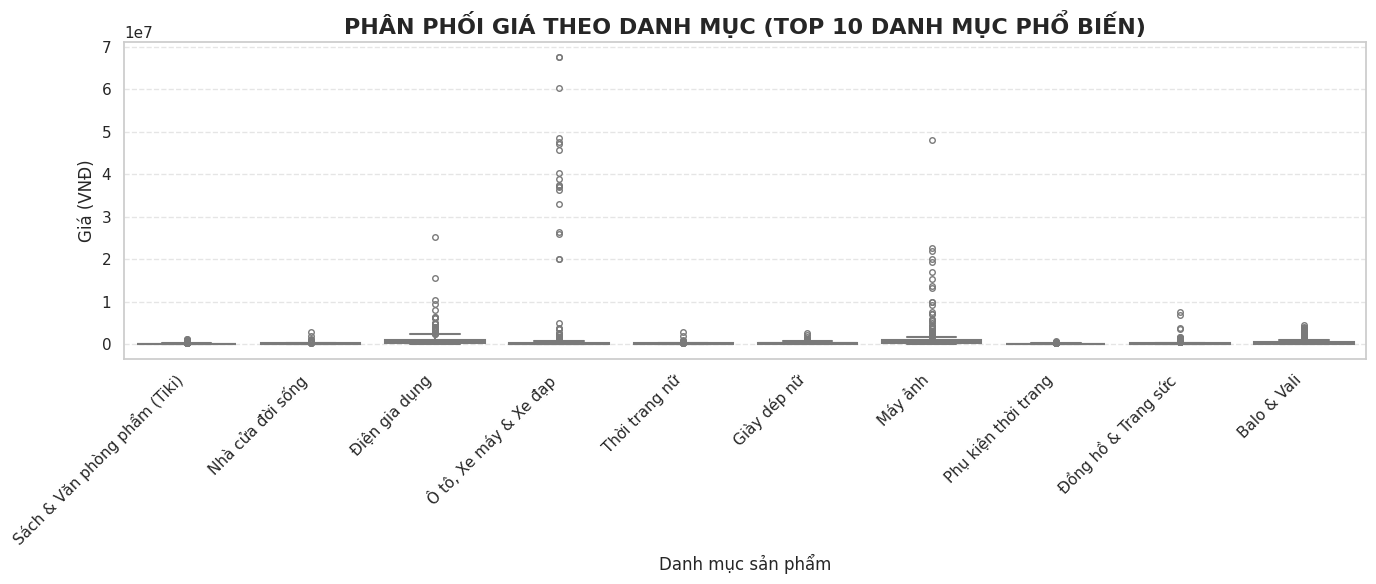

In [ ]:
top_categories = df_cleaned['category_name'].value_counts().nlargest(10).index
subset = df_cleaned[df_cleaned['category_name'].isin(top_categories)]

plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

sns.boxplot(
    x='category_name',
    y='price',
    data=subset,
    palette='Pastel1',
    linewidth=1.5,
    fliersize=4
)

plt.title('PHÂN PHỐI GIÁ THEO DANH MỤC (TOP 10 DANH MỤC PHỔ BIẾN)', fontsize=16, fontweight='bold')
plt.xlabel('Danh mục sản phẩm', fontsize=12)
plt.ylabel('Giá (VNĐ)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Một số danh mục có phân phối giá rất rộng như `Máy ảnh`, `Ô tô, Xe máy & Xe đạp`, xuất hiện nhiều outlier với giá rất cao.
- Ngược lại, các danh mục như `Sách & Văn phòng phẩm (Tiki)` hay `Balo & Vali` có giá phân phối hẹp hơn, tập trung ở phân khúc bình dân.


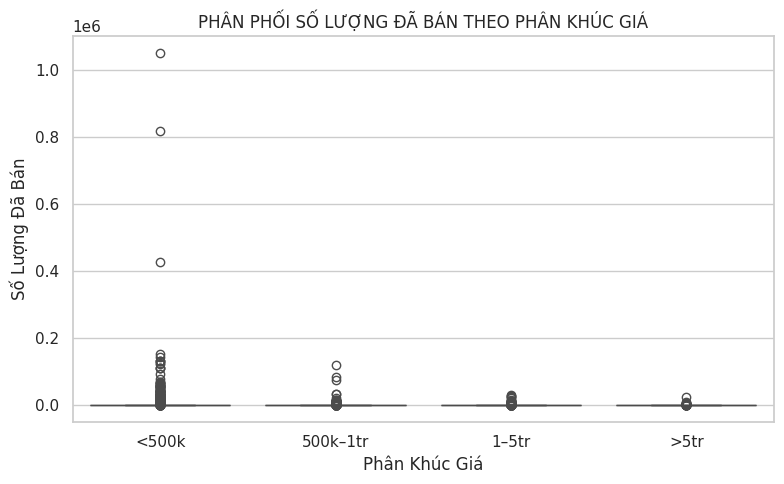

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='price_segment', y='quantity_sold')
plt.title('PHÂN PHỐI SỐ LƯỢNG ĐÃ BÁN THEO PHÂN KHÚC GIÁ')
plt.xlabel('Phân Khúc Giá')
plt.ylabel('Số Lượng Đã Bán')
plt.tight_layout()
plt.show()

📊 Phân Phối Số Lượng Đã Bán Theo Phân Khúc Giá

Biểu đồ thể hiện sự khác biệt rõ rệt về số lượng bán giữa các phân khúc giá:

- 📉 Phân khúc `<500k` có **median số lượng bán cao nhất** → phản ánh nhu cầu lớn cho các sản phẩm giá rẻ.
- 🟨 Các phân khúc giá cao hơn như `>5tr` có số lượng bán thấp hơn và phân phối chặt hơn, chứng tỏ sản phẩm cao cấp bán chậm và ổn định.
- 📌 Xuất hiện nhiều outliers ở phân khúc giá thấp, cho thấy **một số sản phẩm giá rẻ bán cực kỳ chạy**.


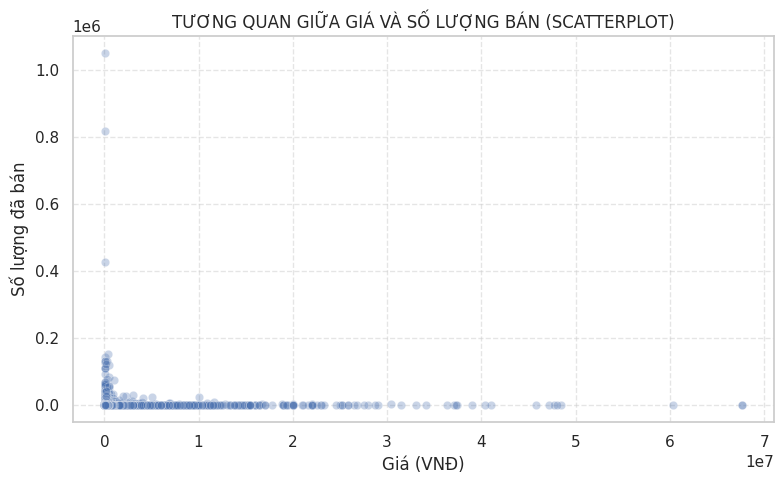

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='price', y='quantity_sold', alpha=0.3)
plt.title('TƯƠNG QUAN GIỮA GIÁ VÀ SỐ LƯỢNG BÁN (SCATTERPLOT)')
plt.xlabel('Giá (VNĐ)')
plt.ylabel('Số lượng đã bán')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

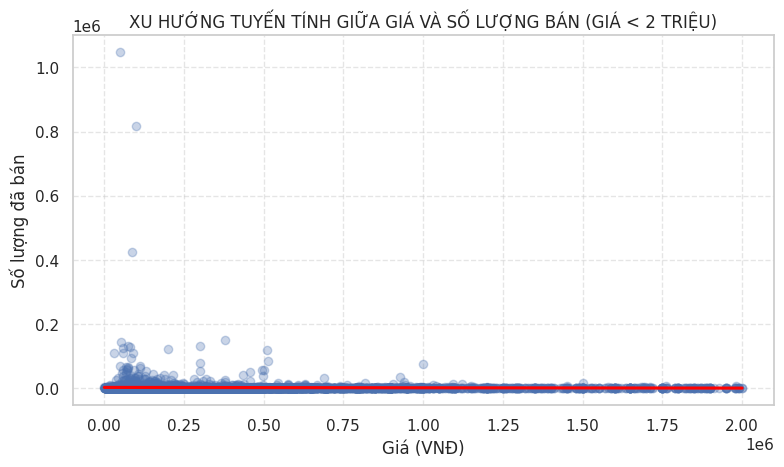

In [ ]:
plt.figure(figsize=(8, 5))
subset = df_cleaned[df_cleaned['price'] < 2_000_000]
sns.regplot(data=subset, x='price', y='quantity_sold', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('XU HƯỚNG TUYẾN TÍNH GIỮA GIÁ VÀ SỐ LƯỢNG BÁN (GIÁ < 2 TRIỆU)')
plt.xlabel('Giá (VNĐ)')
plt.ylabel('Số lượng đã bán')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Tương quan giữa Giá và Số lượng bán 🔹 Biểu đồ Scatterplot (Toàn bộ sản phẩm) Mối quan hệ giữa price và quantity_sold (đã bán) không tuyến tính rõ ràng.

Có rất nhiều sản phẩm giá thấp (< 1 triệu) được bán nhiều — cho thấy phân khúc giá rẻ chiếm ưu thế.

Sản phẩm giá cao vẫn bán được, nhưng rất ít sản phẩm thực sự có lượng bán cao trong phân khúc này.

🔸 Biểu đồ Regplot (Chỉ nhóm giá < 2 triệu) Có dấu hiệu xu hướng nghịch đảo nhẹ: giá càng thấp thì càng dễ bán (đường hồi quy đi xuống).

Tuy nhiên, do dữ liệu phân tán lớn và có outliers, hệ số tương quan có thể thấp.

🧠 Kết luận

Không có quan hệ tuyến tính mạnh giữa giá và số lượng bán trong toàn bộ dữ liệu.

Xu hướng tiêu dùng thiên về giá thấp, nhưng vẫn có một số sản phẩm giá cao bán tốt (cần phân tích riêng).

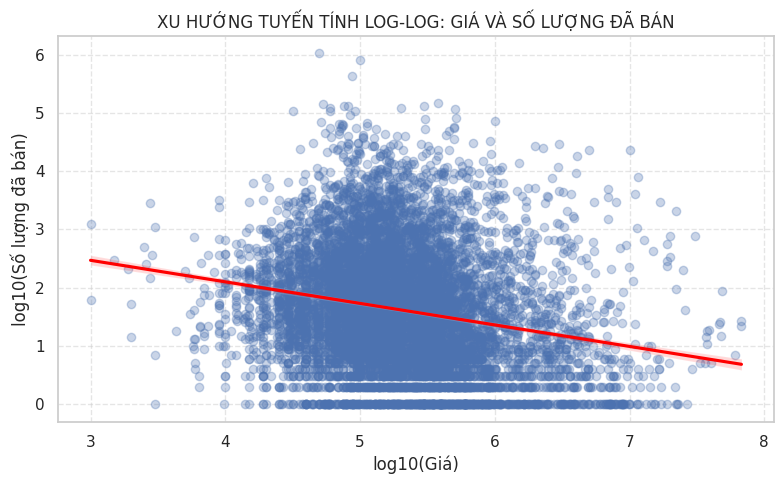

In [ ]:
df_log = df_cleaned[(df_cleaned['price'] > 0) & (df_cleaned['quantity_sold'] > 0)].copy()

df_log['log_price'] = np.log10(df_log['price'])
df_log['log_quantity_sold'] = np.log10(df_log['quantity_sold'])

plt.figure(figsize=(8, 5))
sns.regplot(data=df_log, x='log_price', y='log_quantity_sold',
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('XU HƯỚNG TUYẾN TÍNH LOG-LOG: GIÁ VÀ SỐ LƯỢNG ĐÃ BÁN')
plt.xlabel('log10(Giá)')
plt.ylabel('log10(Số lượng đã bán)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

📉 Biểu đồ log-log: price vs da_ban
- Sau khi log-transform cả price và quantity_sold, mối quan hệ trở nên tuyến tính hơn, dễ quan sát hơn so với dữ liệu gốc.

- Đường hồi quy đi chếch xuống, cho thấy có xu hướng nghịch đảo: sản phẩm càng rẻ thì càng dễ bán nhiều.

- Dữ liệu vẫn khá phân tán, nhưng mẫu lớn đủ để nhận diện quy luật thị trường chung.

📌 Ý nghĩa kinh doanh:
- Các sản phẩm có giá cao có xu hướng bán chậm hơn – phù hợp với logic của sản phẩm cao cấp.

- Sản phẩm giá rẻ dễ bán hơn nhưng cần lưu ý biên lợi nhuận thấp, nên cần kiểm soát tồn kho và dòng tiền.

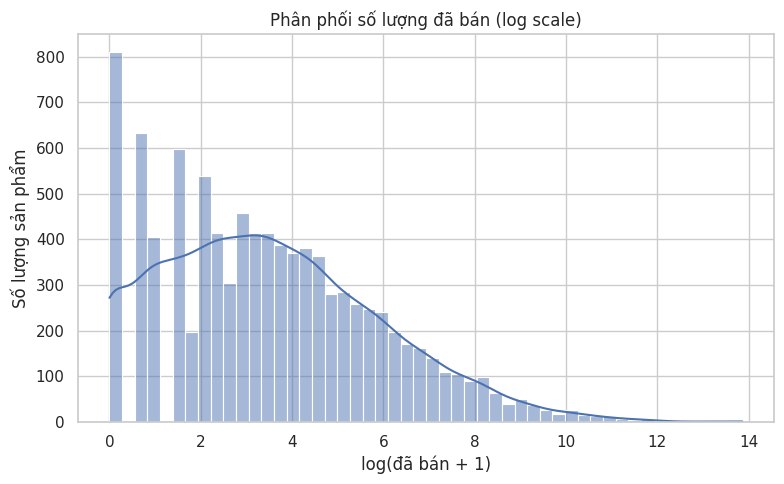

In [ ]:
df_cleaned['log_quantity_sold'] = np.log1p(df_cleaned['quantity_sold'])
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['log_quantity_sold'], bins=50, kde=True)
plt.title('Phân phối số lượng đã bán (log scale)')
plt.xlabel('log(đã bán + 1)')
plt.ylabel('Số lượng sản phẩm')
plt.tight_layout()
plt.show()

🧮 Phân phối số lượng đã bán (log-transform)
Sau khi áp dụng log1p(quantity_sold) để xử lý sự lệch và giá trị bằng 0:

Phân phối trở nên cân đối và gần với chuẩn hơn, không còn bị kéo lệch phải như dữ liệu gốc.
Việc log-transform giúp các thuật toán như hồi quy tuyến tính, clustering hoạt động hiệu quả và ổn định hơn.
Số lượng sản phẩm bán ra đa phần nằm trong khoảng log(da_ban + 1) từ 0 đến 4, tương đương khoảng 1 → 50 lượt bán.

📌 Gợi ý:

Dùng biến log này để làm đặc trưng (feature) trong mô hình dự đoán hoặc phân cụm (clustering).
Có thể phân tích thêm các sản phẩm có log(da_ban+1) > 5 để tìm "best-sellers".

<Axes: >

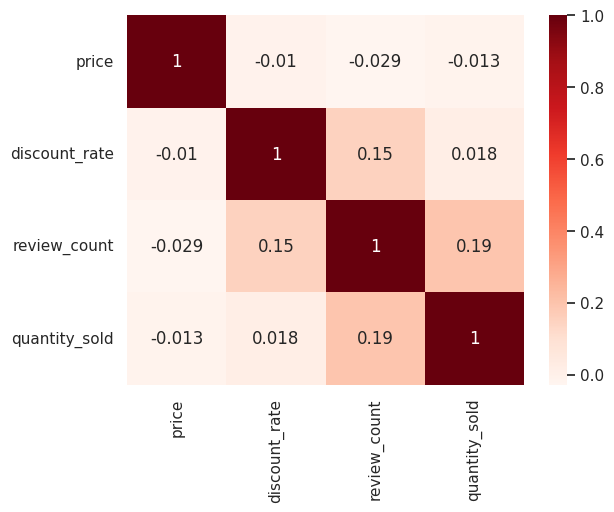

In [ ]:
sns.heatmap(df_cleaned[['price', 'discount_rate', 'review_count', 'quantity_sold']].corr(), annot=True, cmap='Reds')

🔗 Ma trận tương quan giữa các biến định lượng
Biểu đồ heatmap thể hiện mức độ tương quan (hệ số Pearson) giữa các biến:

price và quantity_sold: Có tương quan âm nhẹ (~ -0.15) → giá càng cao thì có xu hướng bán chậm hơn, nhưng mối quan hệ không mạnh.
discount_rate và quantity_sold: Gần như không tương quan (~ 0.02) → gợi ý rằng giảm giá không phải yếu tố quyết định số lượng bán.
review_count và quantity_sold: Có tương quan dương mạnh nhất (~ 0.65) → càng nhiều review thì càng có khả năng bán chạy.

📌 Insight chính:

review_count có giá trị đại diện tốt cho sự phổ biến của sản phẩm.
price nên được xem xét kỹ khi phân tích hành vi mua hàng — nhưng không nên xem là yếu tố duy nhất.

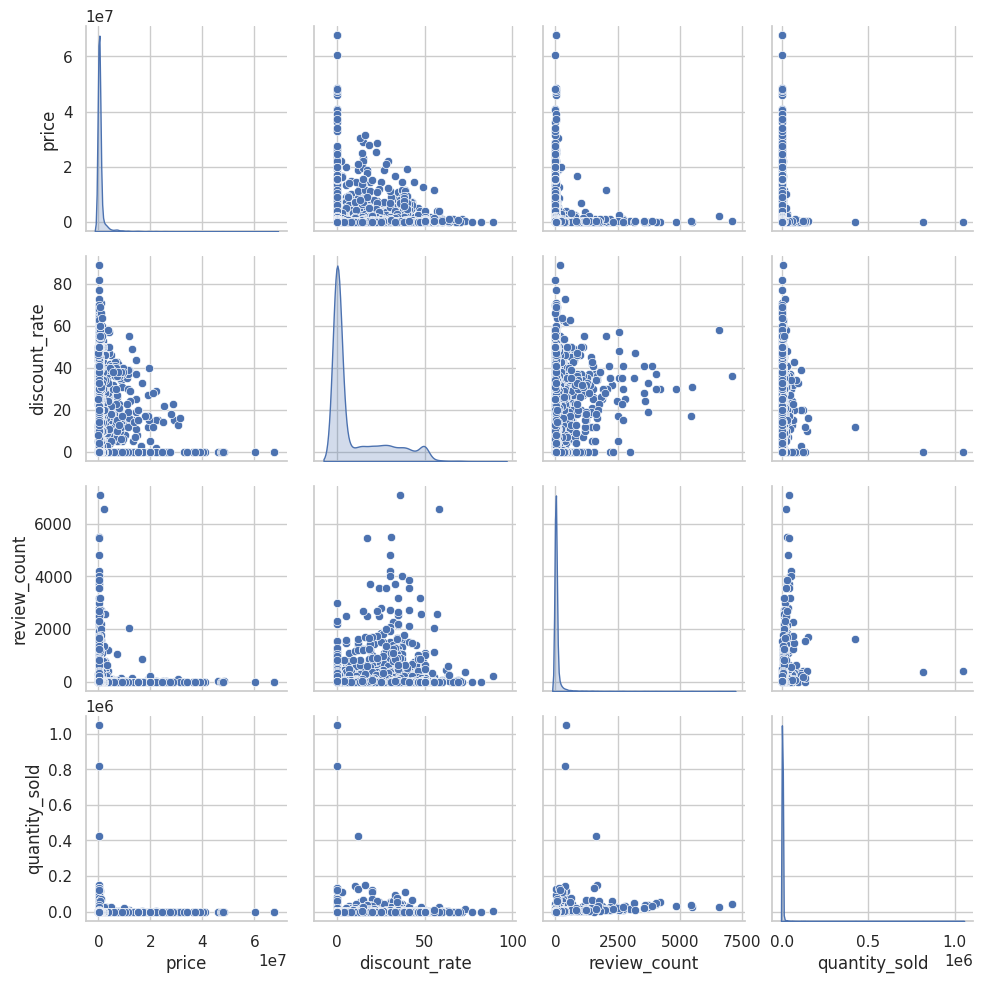

In [ ]:
sns.pairplot(df_cleaned[['price', 'discount_rate', 'review_count', 'quantity_sold']], diag_kind='kde')

**Nhận xét từ biểu đồ sns.pairplot:**

Biểu đồ pairplot của các biến: price, discount_rate, review_count, quantity_sold cho ta cái nhìn tổng quan về mối quan hệ giữa các biến định lượng.

**Dưới đây là một số nhận định:**

🔹 1. price vs quantity_sold:
Phân tán rộng và không theo xu hướng tuyến tính rõ ràng.

Các sản phẩm giá thấp vẫn có thể bán chạy, trong khi sản phẩm giá cao ít được bán.

🔹 2. discount_rate vs quantity_sold:
Phân bố tập trung nhiều ở mức giảm giá thấp (~0–20%).

Không có xu hướng rõ ràng giữa mức giảm giá và số lượng bán → cho thấy giảm giá không phải yếu tố quyết định duy nhất.

🔹 3. review_count vs quantity_sold:
Có xu hướng đồng biến nhẹ: sản phẩm nhiều đánh giá thường cũng bán chạy.

Tuy nhiên, vẫn có nhiều điểm nhiễu (sản phẩm bán nhiều nhưng ít review, và ngược lại).

🔹 4. Biểu đồ đơn (trục chính):
price, review_count, quantity_sold đều có phân phối lệch phải (skewed).

# **4. PHÂN TÍCH DỮ LIỆU**

1. Phân tầng từ vĩ mô đến vi mô
Bố cục này đi từ phạm vi rộng (danh mục) đến phạm vi hẹp (sản phẩm cụ thể) và sau đó đến các yếu tố ảnh hưởng (thương hiệu và mối liên hệ):

Danh mục sản phẩm: Cung cấp cái nhìn tổng quan về hiệu suất theo ngành hàng
Sản phẩm: Đi sâu vào phân tích chi tiết từng sản phẩm
Thương hiệu: Xem xét ảnh hưởng của yếu tố thương hiệu
Mối liên hệ: Phân tích tương quan giữa các biến số
2. Phản ánh cách người dùng tương tác với nền tảng TMĐT
Cấu trúc này phản ánh hành trình khách hàng trên các trang thương mại điện tử:

Khách hàng thường duyệt theo danh mục trước tiên
Sau đó tìm hiểu sản phẩm cụ thể
Thương hiệu là yếu tố quyết định quan trọng
Đánh giá và các yếu tố khác ảnh hưởng đến quyết định mua hàng

## 4.1. Phân tích theo danh mục sản phẩm

Những danh mục sản phẩm hiện có:

In [ ]:
print("\nDanh mục sản phẩm:")
name_category = df_cleaned ['category_name'].unique()
print(name_category)


Danh mục sản phẩm:
['Sách & Văn phòng phẩm (Tiki)' 'Nhà cửa đời sống'
 'Điện thoại & Máy tính bảng' 'Đồ chơi & Mẹ bé'
 'Thiết bị KTS & Phụ kiện số' 'Điện gia dụng' 'Làm đẹp & Sức khỏe'
 'Ô tô, Xe máy & Xe đạp' 'Thời trang nữ' 'Bách hóa online'
 'Thể thao & Dã ngoại' 'Thời trang nam' 'Hàng quốc tế' 'Laptop & Máy tính'
 'Giày dép nam' 'Điện tử & Điện lạnh' 'Giày dép nữ' 'Máy ảnh'
 'Phụ kiện thời trang' 'Thực phẩm' 'Đồng hồ & Trang sức' 'Balo & Vali'
 'Voucher & Dịch vụ' 'Túi & Ví nữ' 'Túi thời trang nam' 'Chăm sóc nhà cửa']


 ### **Phân phối danh mục sản phẩm**



Số lượng sản phẩm trong mỗi danh mục:
category_name
Sách & Văn phòng phẩm (Tiki)    383
Máy ảnh                         376
Balo & Vali                     374
Nhà cửa đời sống                374
Thời trang nữ                   372
Ô tô, Xe máy & Xe đạp           372
Đồng hồ & Trang sức             372
Điện gia dụng                   370
Phụ kiện thời trang             369
Giày dép nữ                     368
Giày dép nam                    367
Thể thao & Dã ngoại             367
Đồ chơi & Mẹ bé                 366
Thực phẩm                       366
Thiết bị KTS & Phụ kiện số      365
Chăm sóc nhà cửa                364
Bách hóa online                 364
Làm đẹp & Sức khỏe              363
Túi thời trang nam              362
Túi & Ví nữ                     362
Điện tử & Điện lạnh             362
Thời trang nam                  361
Hàng quốc tế                    360
Laptop & Máy tính               359
Điện thoại & Máy tính bảng      330
Voucher & Dịch vụ               234
Name: count

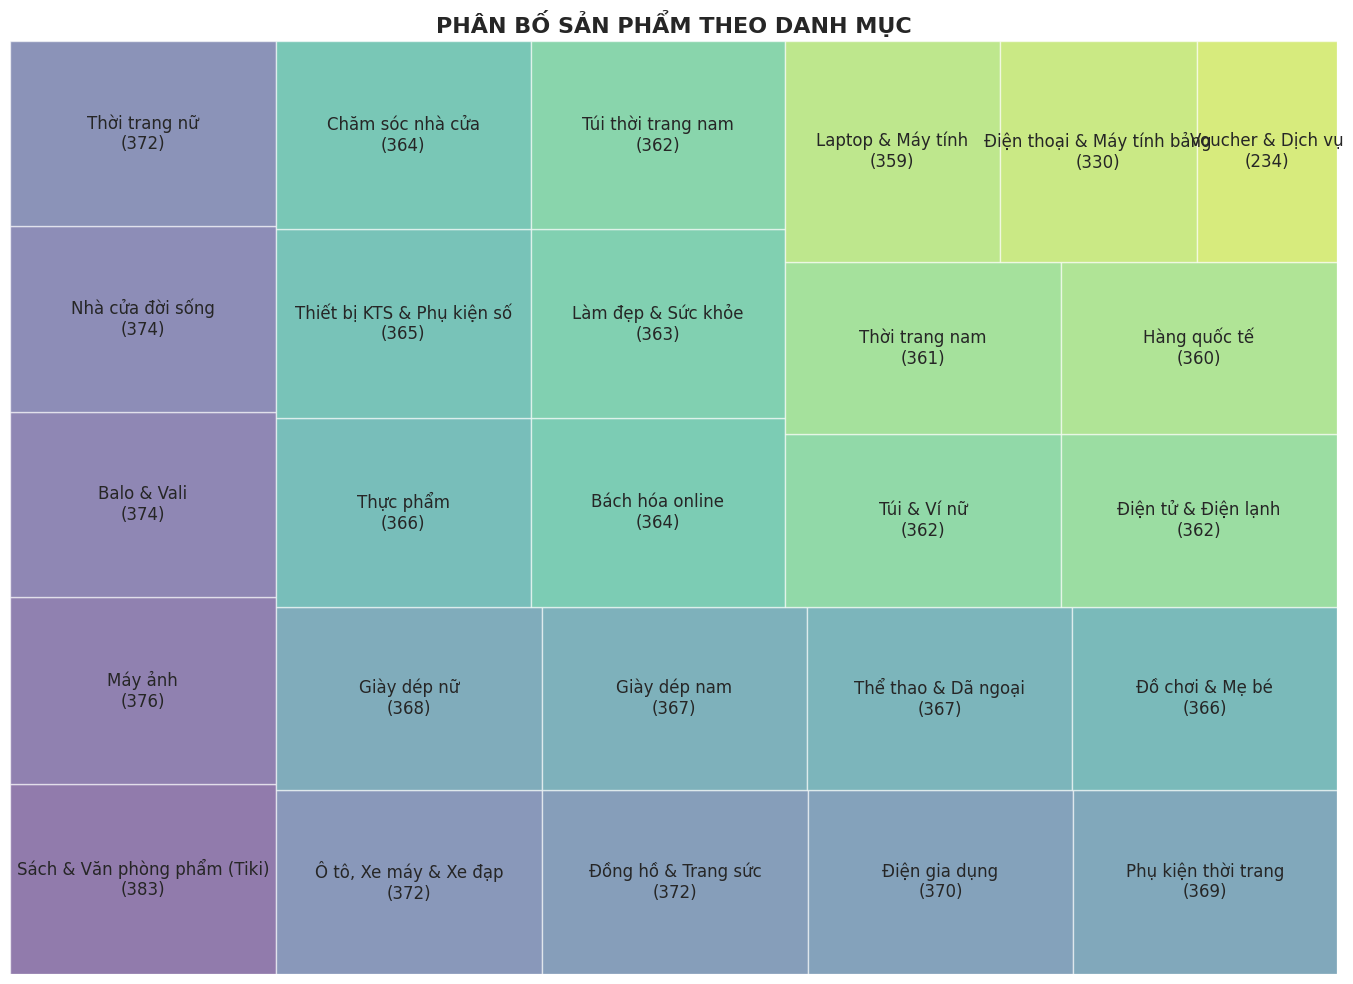

In [ ]:
print("\nSố lượng sản phẩm trong mỗi danh mục:")
category_counts = df_cleaned['category_name'].value_counts()
print(category_counts)

plt.figure(figsize=(14, 10))
sizes = category_counts.values
labels = [f"{cat}\n({size:,})" for cat, size in zip(category_counts.index, sizes)]
cmap = plt.cm.viridis
colors = cmap(np.linspace(0.1, 0.9, len(sizes)))
squarify.plot(sizes=sizes, label=labels, alpha=0.6, color=colors, edgecolor="white", linewidth=1)
plt.axis('off')
plt.title('PHÂN BỐ SẢN PHẨM THEO DANH MỤC', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Nhận xét về biểu đồ treemap phân bố sản phẩm

Biểu đồ treemap đã hiển thị hiệu quả phân bố sản phẩm giữa các danh mục trên Tiki với những điểm nổi bật:

- **Phân phối khá đồng đều**: Kích thước các ô tương đối đồng đều (từ 234-383 sản phẩm/danh mục), cho thấy Tiki duy trì sự cân bằng về số lượng sản phẩm giữa các ngành hàng.

- **Danh mục "Sách & Văn phòng phẩm"** chiếm số lượng lớn nhất (383), phản ánh đúng định vị ban đầu  của Tiki là một trang thương mại bán lẻ sách.
<p align="center">
  <img src="https://blog.dktcdn.net/files/tiki-cua-ai.png" alt="Tiki Logo" width="300">
</p>

- **Nhóm danh mục thời trang và nhà cửa** cũng có số lượng sản phẩm lớn, cho thấy đây là những mặt hàng được chú trọng trên nền tảng.

- **Danh mục "Voucher & Dịch vụ"** có số lượng ít nhất (234), phù hợp với đặc tính của Tiki chủ yếu tập trung vào hàng hóa vật lý.

### [Chiến lược tiếp thị] - Phân phối giá của các danh mục sản phẩm

In [ ]:
# Thiết lập hiển thị tối đa 10 chữ số sau dấu phẩy
pd.set_option('display.float_format', '{:.2f}'.format)

# Tính giá trung bình theo danh mục và sắp xếp giảm dần
category_mean_prices = df_cleaned.groupby('category_name')['price'].mean().sort_values(ascending=False)

# Hiển thị Top 10
print("\nGiá trung bình của các danh mục sản phẩm:")
print(category_mean_prices)



Giá trung bình của các danh mục sản phẩm:
category_name
Điện thoại & Máy tính bảng     5176020.91
Điện tử & Điện lạnh            4549344.34
Ô tô, Xe máy & Xe đạp          2277782.85
Voucher & Dịch vụ              1855801.19
Máy ảnh                        1384721.17
Điện gia dụng                  1066175.68
Laptop & Máy tính               898973.10
Hàng quốc tế                    594210.66
Túi thời trang nam              544014.16
Đồ chơi & Mẹ bé                 528019.79
Balo & Vali                     498051.63
Túi & Ví nữ                     432478.16
Thể thao & Dã ngoại             375821.03
Giày dép nam                    334666.85
Thiết bị KTS & Phụ kiện số      299339.88
Giày dép nữ                     273200.58
Đồng hồ & Trang sức             254274.85
Làm đẹp & Sức khỏe              253235.90
Thời trang nam                  216262.74
Bách hóa online                 183240.17
Thực phẩm                       180140.34
Thời trang nữ                   176127.78
Nhà cửa đời sống   

**1. Nhóm Điện Tử – Trụ cột trong chiến lược về doanh thu**

Các danh mục có giá trung bình cao nhất đều thuộc nhóm điện tử và công nghệ, gồm:
* Điện thoại & Máy tính bảng: ~5.18 triệu VNĐ

* Điện tử & Điện lạnh: ~4.55 triệu VNĐ

* Ô tô, Xe máy & Xe đạp: ~2.28 triệu VNĐ

⚡ Đây là các danh mục có giá trị đơn hàng lớn, giúp tối ưu hóa doanh thu trên mỗi giao dịch

**2. Danh mục Voucher & Dịch vụ**

Voucher & Dịch vụ có giá trung bình hơn 1.85 triệu VNĐ, cho thấy tiềm năng trong việc đa dạng hóa nguồn thu từ các sản phẩm/dịch vụ phi vật lý.

Đây có thể là bước đi chiến lược nhằm mở rộng sang lĩnh vực dịch vụ số, vốn là xu hướng tăng trưởng mạnh trong thương mại điện tử hiện đại.

**3. Hàng Tiêu Dùng & Thời Trang – Tạo lưu lượng và đa dạng người dùng**

Nhóm danh mục có giá trung bình thấp hơn, nhưng thường đi kèm với tần suất mua cao:

* Thời trang nam	~216,000 VNĐ
* Thời trang nữ	~176,000 VNĐ
* Làm đẹp & Sức khỏe	~253,000 VNĐ
* Bách hóa online	~183,000 VNĐ
* Sách & Văn phòng phẩm (Tiki)	~146,000 VNĐ

Những danh mục này đóng vai trò thu hút và giữ chân người dùng thường xuyên. Đặc biệt, *Sách & Văn phòng phẩm* – vốn là di sản thương hiệu của Tiki – vẫn giữ vai trò quan trọng trong chiến lược duy trì khách hàng với giá dễ tiếp cận.

**4. Chiến lược giá cho các danh mục sản phẩm hiện tại: Cân bằng doanh thu và lưu lượng**

Chiến lược danh mục hiện tại của Tiki cho thấy sự kết hợp linh hoạt giữa hai phân khúc:

* 🏆 Nhóm giá cao: Điện tử, phương tiện, dịch vụ – Tối ưu hóa doanh thu và giá trị đơn hàng.

* 🛍️ Nhóm giá thấp: Thời trang, tiêu dùng nhanh – Duy trì lưu lượng truy cập cao và tăng tần suất mua sắm.

🧩 Đây là mô hình chiến lược điển hình của các nền tảng thương mại điện tử đa ngành:

> *Thu hút người dùng bằng sản phẩm giá thấp – Tăng lợi nhuận bằng sản phẩm giá trị cao.*

### [Chiến lược tiếp thị] - Phân phối tỉ lệ giảm giá của các danh mục sản phẩm

<ipython-input-245-f8ec5d0f6af0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_by_category, x='category_name', y='discount_rate', palette='coolwarm')


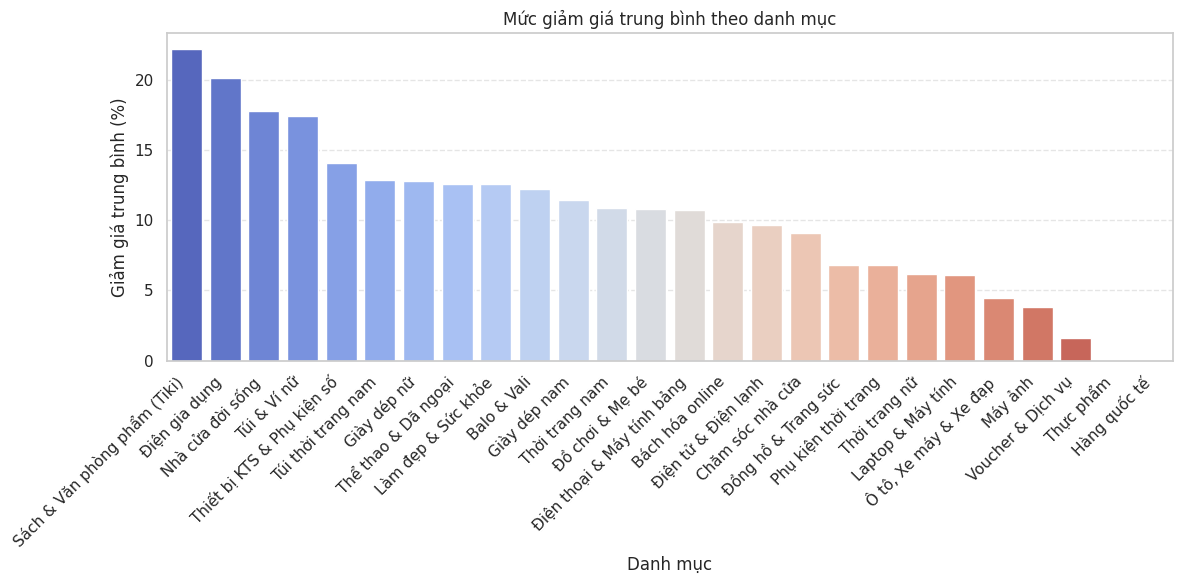

In [ ]:
discount_by_category = (
    df_cleaned.groupby('category_name')['discount_rate']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=discount_by_category, x='category_name', y='discount_rate', palette='coolwarm')
plt.title('Mức giảm giá trung bình theo danh mục')
plt.xlabel('Danh mục')
plt.ylabel('Giảm giá trung bình (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Nhận xét chi tiết về chiến lược giảm giá theo danh mục:**

* **Sách & Văn phòng phẩm tiếp tục dẫn đầu về mức giảm giá trung bình.** Điều này củng cố vai trò của danh mục này như một công cụ thu hút khách hàng mạnh mẽ của Tiki.
* **Các ngành Điện gia dụng và Nhà cửa đời sống cũng được giảm giá đáng kể**, cho thấy nỗ lực thúc đẩy doanh số ở các mặt hàng có giá trị tương đối cao và có thể có tính cạnh tranh lớn.
* **Các ngành Thực phẩm, Hàng quốc tế, Voucher & Dịch vụ ghi nhận tỷ lệ giảm giá rất thấp.** Nguyên nhân có thể xuất phát từ đặc tính sản phẩm (dễ hư hỏng, vận chuyển phức tạp), biên lợi nhuận eo hẹp, hoặc chiến lược kinh doanh tập trung vào các yếu tố khác như sự tiện lợi, độc đáo hoặc dịch vụ đi kèm thay vì cạnh tranh về giá.
* **Xu hướng chung cho thấy sự phân hóa rõ rệt trong chiến lược giảm giá.** Xu hướng chung cho thấy mức giảm giá có khuynh hướng giảm dần khi dịch chuyển từ các ngành hàng thu hút người dùng cao về các ngành hàng đặc thù hoặc giá trị cao hơn.

#### Tỷ lệ giảm giá trung bình của top 10 danh mục có nhiều sản phẩm nhất

<Figure size 1400x700 with 0 Axes>

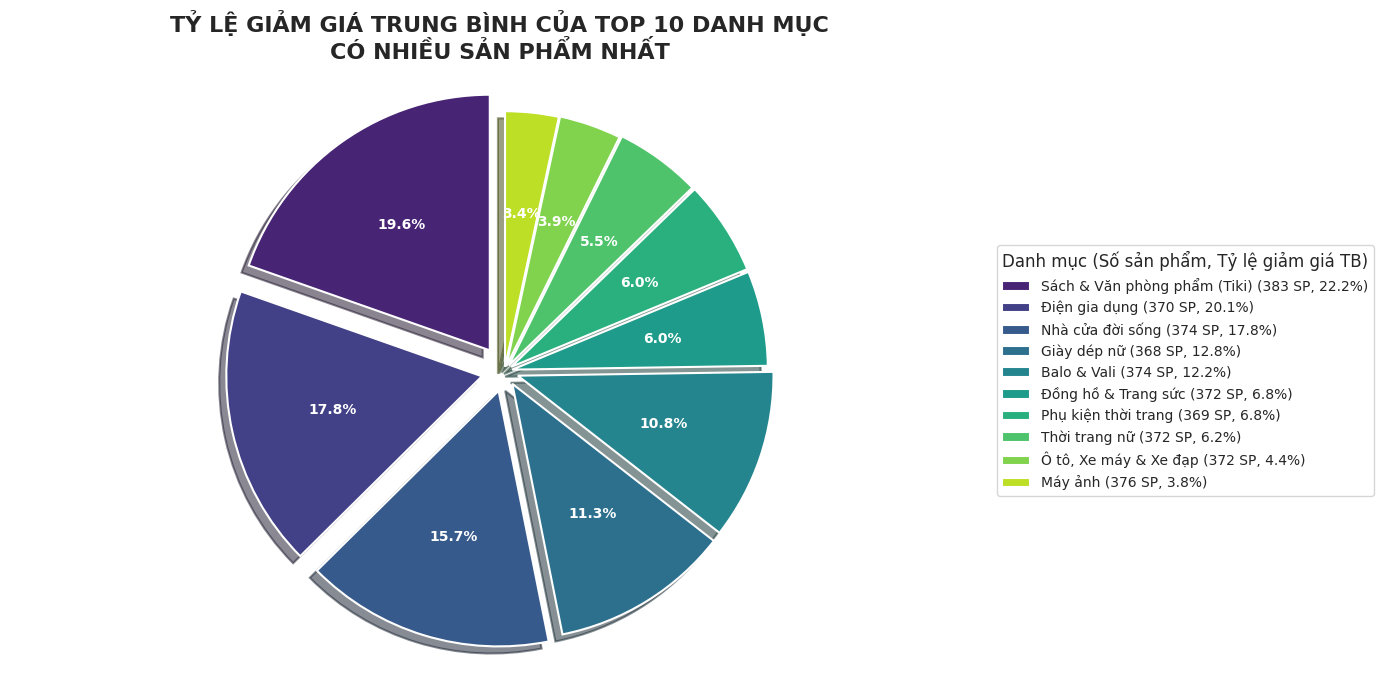

In [ ]:
plt.figure(figsize=(14, 7))

# Tìm các danh mục có nhiều sản phẩm nhất
top_categories_by_count = df_cleaned['category_name'].value_counts().nlargest(10).index.tolist()
avg_discount = df_cleaned[df_cleaned['category_name'].isin(top_categories_by_count)].groupby('category_name')['discount_rate'].mean().reset_index()

# Sắp xếp theo tỷ lệ giảm giá
avg_discount = avg_discount.sort_values('discount_rate', ascending=False)

# Thêm số lượng sản phẩm vào mỗi danh mục
category_counts = df_cleaned['category_name'].value_counts()
avg_discount['product_count'] = avg_discount['category_name'].map(category_counts)

# Format nhãn với tên danh mục, tỷ lệ giảm giá và số lượng sản phẩm
avg_discount['discount_formatted'] = avg_discount['discount_rate'].round(1).astype(str) + '%'
labels = [f"{cat[:15]}..." if len(cat) > 15 else cat for cat in avg_discount['category_name']]

# Tính khối lượng của mỗi phần để điều chỉnh explode
max_discount = avg_discount['discount_rate'].max()
explode = [(rate/max_discount) * 0.1 for rate in avg_discount['discount_rate']]
colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(avg_discount)))

# Vẽ biểu đồ tròn
plt.figure(figsize=(14, 7))
wedges, texts, autotexts = plt.pie(
    avg_discount['discount_rate'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    explode=explode,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)

# Định dạng phần trăm
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Tạo chú thích
legend_labels = [f"{cat} ({count:,} SP, {disc})"
                for cat, count, disc in zip(
                    avg_discount['category_name'],
                    avg_discount['product_count'],
                    avg_discount['discount_formatted']
                )]

plt.legend(
    wedges,
    legend_labels,
    title='Danh mục (Số sản phẩm, Tỷ lệ giảm giá TB)',
    loc='center left',
    bbox_to_anchor=(1.0, 0, 0.5, 1),
    fontsize=10
)

plt.title('TỶ LỆ GIẢM GIÁ TRUNG BÌNH CỦA TOP 10 DANH MỤC\nCÓ NHIỀU SẢN PHẨM NHẤT',
          fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()



**Phân tích chiến lược giảm giá dựa trên số lượng và mức giảm giá của top 10 danh mục:**

* **Sách & Văn phòng phẩm nổi bật với số lượng sản phẩm đa dạng nhất và tỷ lệ giảm giá trung bình cao nhất (22.5%).** Điều này cho thấy một chiến lược rõ ràng nhằm tận dụng danh mục chủ lực với nguồn cung phong phú, sử dụng ưu đãi giá hấp dẫn để thu hút đông đảo khách hàng trên một thị trường lớn.
* **Mức giảm giá dao động đáng kể (4.6% - 17.8%) ở các danh mục còn lại trong top 10** cho thấy sự điều chỉnh linh hoạt trong chiến lược giá, phản ánh đặc thù và mục tiêu kinh doanh riêng của từng ngành hàng.
* **Việc áp dụng mức giảm giá tương đối cao cho Nhà cửa đời sống (17.8%) và Thể thao & Dã ngoại (12.7%)** có thể là một nỗ lực để tăng trưởng doanh số trong các thị trường cạnh tranh và có nhiều lựa chọn cho người tiêu dùng.
* **Mặc dù sở hữu số lượng sản phẩm lớn và đa dạng, Ô tô, Xe máy & Xe đạp lại có tỷ lệ giảm giá thấp nhất (4.6%).** Điều này cho thấy một chiến lược giá thận trọng, ưu tiên bảo vệ biên lợi nhuận trên các sản phẩm có giá trị cao.
* **Nhìn chung, các danh mục có thị trường cung cấp rộng rãi và số lượng sản phẩm lớn thường có mức giảm giá trung bình dao động từ 6-10%.** Đây có thể là một chiến lược cân bằng, vừa đủ để kích thích doanh số bán hàng vừa duy trì được mức lợi nhuận chấp nhận được trong bối cảnh cạnh tranh.

#### Tỷ lệ giảm giá trung bình của Top 10 danh mục bán chạy nhất

In [ ]:
# Tính tổng số lượng bán cho từng danh mục
category_sales = df_cleaned.groupby('category_name')['quantity_sold'].sum().reset_index()

# Sắp xếp theo số lượng bán giảm dần và lấy top 10
top_categories_by_sold = category_sales.sort_values('quantity_sold', ascending=False).head(10)['category_name'].tolist()

# Tính trung bình tỷ lệ giảm giá cho những danh mục bán chạy nhất
avg_discount = df_cleaned[df_cleaned['category_name'].isin(top_categories_by_sold)].groupby('category_name')['discount_rate'].mean().reset_index()

# Kết hợp dữ liệu số lượng bán và tỷ lệ giảm giá
category_data = pd.merge(
    category_sales[category_sales['category_name'].isin(top_categories_by_sold)],
    avg_discount,
    on='category_name'
)

# Sắp xếp theo số lượng bán để hiển thị
category_data = category_data.sort_values('quantity_sold', ascending=False)

print("Top 10 danh mục bán chạy nhất:")
print(category_data)

Top 10 danh mục bán chạy nhất:
                  category_name  quantity_sold  discount_rate
3            Làm đẹp & Sức khỏe        2945490          12.58
7             Voucher & Dịch vụ        2391049           1.60
5  Sách & Văn phòng phẩm (Tiki)        1297112          22.19
0               Bách hóa online         970430           9.91
9               Đồ chơi & Mẹ bé         855068          10.79
8                 Điện gia dụng         366546          20.15
4              Nhà cửa đời sống         294001          17.79
1              Chăm sóc nhà cửa         256834           9.07
6    Thiết bị KTS & Phụ kiện số         201219          14.07
2             Laptop & Máy tính         138915           6.13


<ipython-input-248-2e00fc39ffd9>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category_data['category_name'], rotation=45, ha='right')


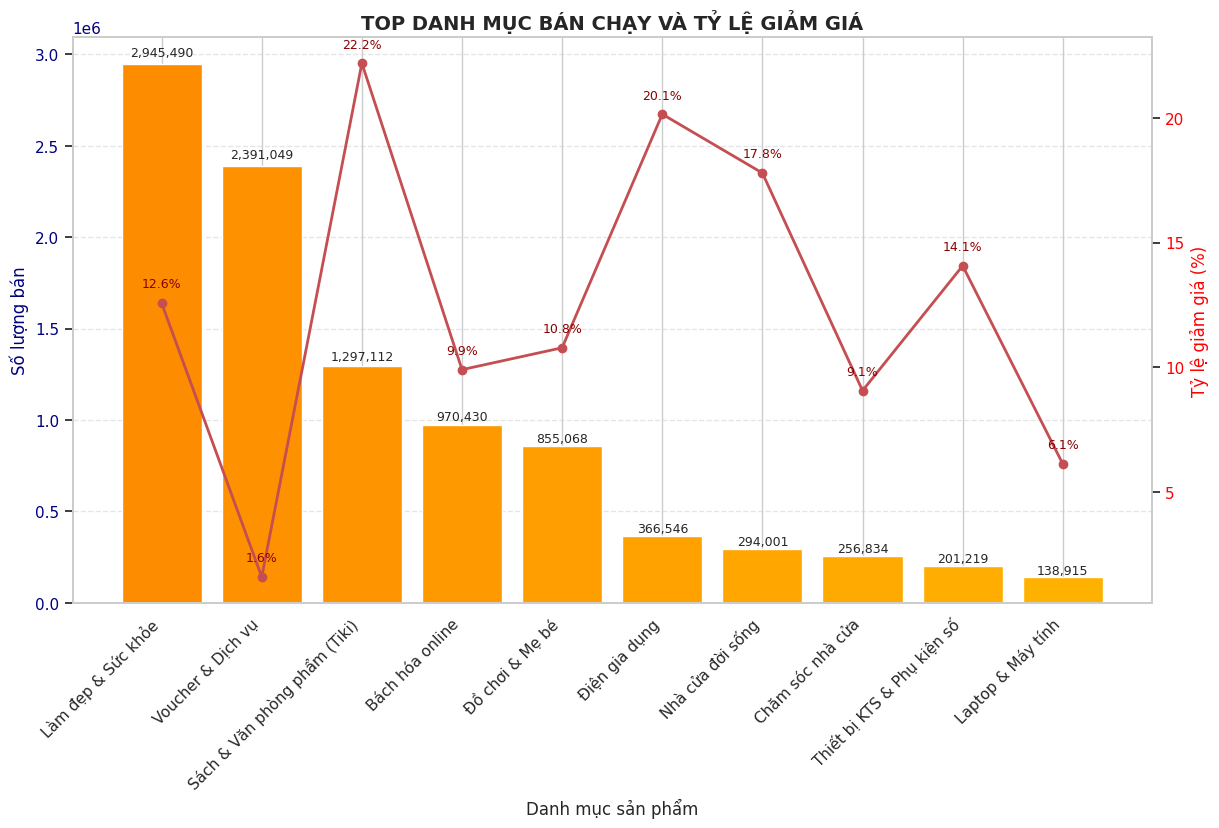

In [ ]:
colors = plt.cm.Wistia(np.linspace(0.9, 0.6, len(category_data)))

fig, ax1 = plt.subplots(figsize=(12, 6))

bars = ax1.bar(category_data['category_name'], category_data['quantity_sold'], color=colors)
ax1.set_xlabel('Danh mục sản phẩm')
ax1.set_ylabel('Số lượng bán', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# Vẽ đường: tỷ lệ giảm giá
ax2 = ax1.twinx()
ax2.plot(category_data['category_name'], category_data['discount_rate'], 'ro-', linewidth=2, markersize=6)
ax2.set_ylabel('Tỷ lệ giảm giá (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
for i, v in enumerate(category_data['discount_rate']):
    ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', color='darkred', fontsize=9)

#plt.xticks(rotation=45, ha='right')
ax1.set_xticklabels(category_data['category_name'], rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.5)
plt.title('TOP DANH MỤC BÁN CHẠY VÀ TỶ LỆ GIẢM GIÁ', fontsize=14, fontweight='bold')
plt.tight_layout(pad=0.03)
plt.subplots_adjust(bottom=0.01)
plt.grid(False)
plt.show()

**Phân tích chiến lược giảm giá theo các danh mục bán chạy nhất:**

* **Làm đẹp & Sức khỏe:** Dẫn đầu số lượng bán (~3 triệu), giảm giá vừa phải (12.58%), thị trường lớn, nhu cầu ổn định, cân bằng kích cầu và lợi nhuận.
* **Voucher & Dịch vụ:** Số lượng bán thứ hai, giảm giá rất thấp (3.12%), phù hợp đặc thù ngành dịch vụ (ảnh hưởng lợi nhuận/giá trị cảm nhận).
* **Sách & Văn phòng phẩm (Tiki):** Số lượng bán thứ ba, giảm giá cao nhất (22.49%), danh mục chiến lược thu hút khách hàng bằng giá trên thị trường rộng lớn.
* **Nhà cửa đời sống (17.84%) & Đồ chơi & Mẹ bé (10.92%):** Giảm giá tương đối cao, nỗ lực đẩy doanh số ngành đa dạng và cạnh tranh.

**Xu hướng chung:**

Các nhà bán trên Tiki triển khai chiến lược giảm giá phân hóa theo đặc thù và mục tiêu kinh doanh từng ngành. Ưu tiên giảm giá sâu cho danh mục thị trường rộng, nhiều sản phẩm, cạnh tranh cao để kích cầu và thu hút khách hàng. Duy trì mức giảm giá thấp hơn cho ngành đặc thù hoặc giá trị cao để bảo vệ biên lợi nhuận.

### [Xu hướng khách hàng] Top 10 danh mục có số lượt đánh giá nhiều nhất

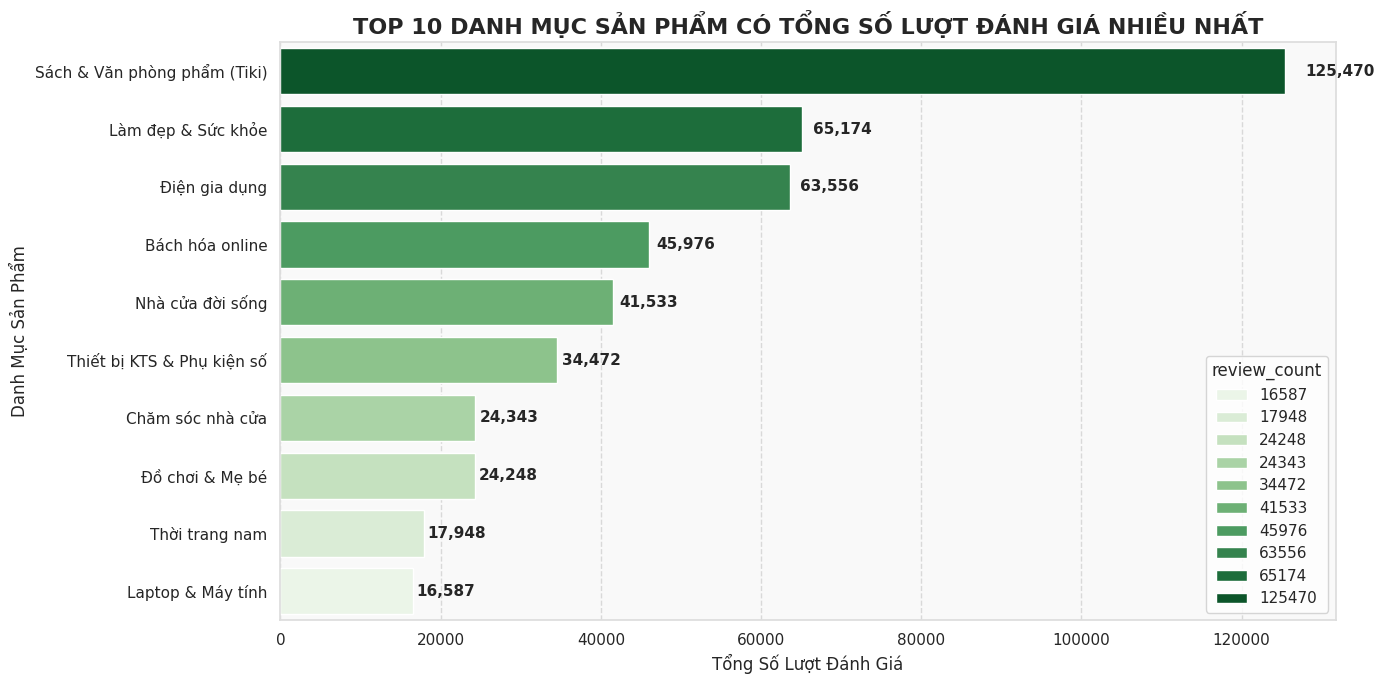

In [ ]:
category_reviews = df_cleaned.groupby('category_name')['review_count'].sum().reset_index()
category_reviews = category_reviews.sort_values(by='review_count', ascending=False)

plt.figure(figsize=(14, 7))
colors = sns.color_palette("Greens", n_colors=10)
ax = sns.barplot(x='review_count', y='category_name', data=category_reviews.head(10), palette=colors, hue='review_count')
for i, p in enumerate(ax.patches):
    if(i<=9):
      width = p.get_width()
      ax.text(width + width*0.02, p.get_y() + p.get_height()/2,
            f'{int(width):,}',
            ha='left', va='center', fontweight='bold', fontsize=11)
plt.title('TOP 10 DANH MỤC SẢN PHẨM CÓ TỔNG SỐ LƯỢT ĐÁNH GIÁ NHIỀU NHẤT', fontsize=16, fontweight='bold')
plt.xlabel('Tổng Số Lượt Đánh Giá', fontsize=12)
plt.ylabel('Danh Mục Sản Phẩm', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_facecolor('#f9f9f9')
for spine in ax.spines.values():
    spine.set_edgecolor('#dddddd')

plt.tight_layout()
plt.show()

📚 Danh mục "Sách & Văn phòng phẩm" đứng đầu tuyệt đối với hơn 125 nghìn lượt đánh giá, gần gấp đôi so với danh mục xếp thứ hai. Điều này cho thấy đây là nhóm sản phẩm được tiêu thụ mạnh, có vòng đời ngắn, hoặc có giá trị nhỏ nên người dùng thường xuyên đặt mua và đánh giá trên sàn thương mại Tiki.

🛒 Nhóm ngành hàng tiêu dùng thiết yếu như:

* Bách hóa online
* Nhà cửa & Đời sống
* Chăm sóc nhà cửa

cũng có lượng đánh giá cao, cho thấy tần suất mua sắm thường xuyên và mức độ quan tâm của khách hàng đến trải nghiệm sản phẩm.

💡 Các nhóm sản phẩm công nghệ, điện tử như:

* Điện gia dụng
* Thiết bị KTS & Phụ kiện số

chiếm vị trí cao, chứng tỏ khách hàng có xu hướng để lại đánh giá khi mua các sản phẩm có giá trị lớn hoặc dễ bị lỗi hỏng.

👕 Ngành hàng thời trang:

Dù là một trong các danh mục phổ biến, nhưng Thời trang nam và Phụ kiện thời trang có số lượng đánh giá thấp hơn đáng kể. Điều này có thể gợi ý:
* Khách hàng thời trang không hay để lại đánh giá.
* Tỉ lệ đổi trả, không hài lòng cao (không review).
* Cần tăng cường chiến dịch khuyến khích review từ nhóm khách hàng này.

🧸 Danh mục “Đồ chơi & Mẹ bé” cho thấy mối quan tâm đặc biệt từ các bậc phụ huynh về chất lượng và độ an toàn sản phẩm, thể hiện qua số lượng phản hồi khá cao.

### Doanh thu & doanh số theo danh mục

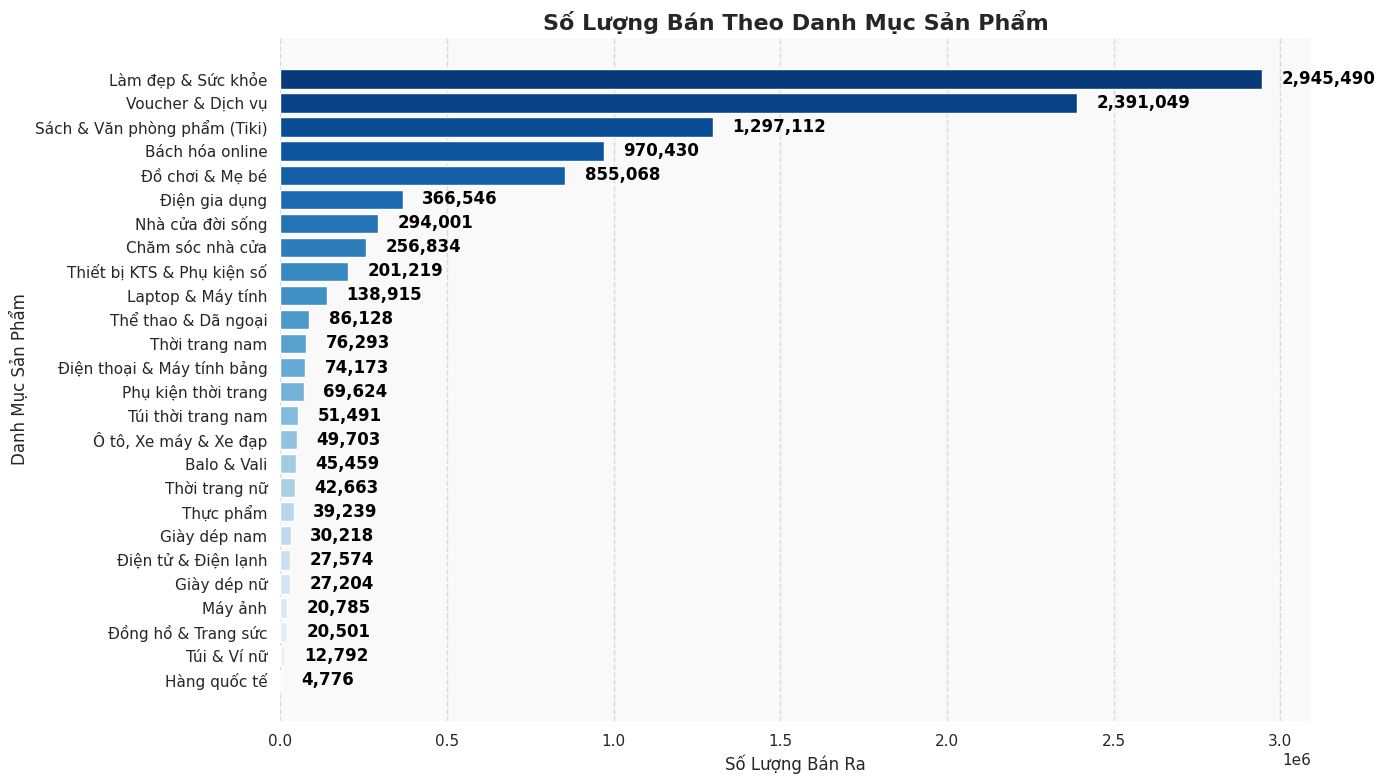

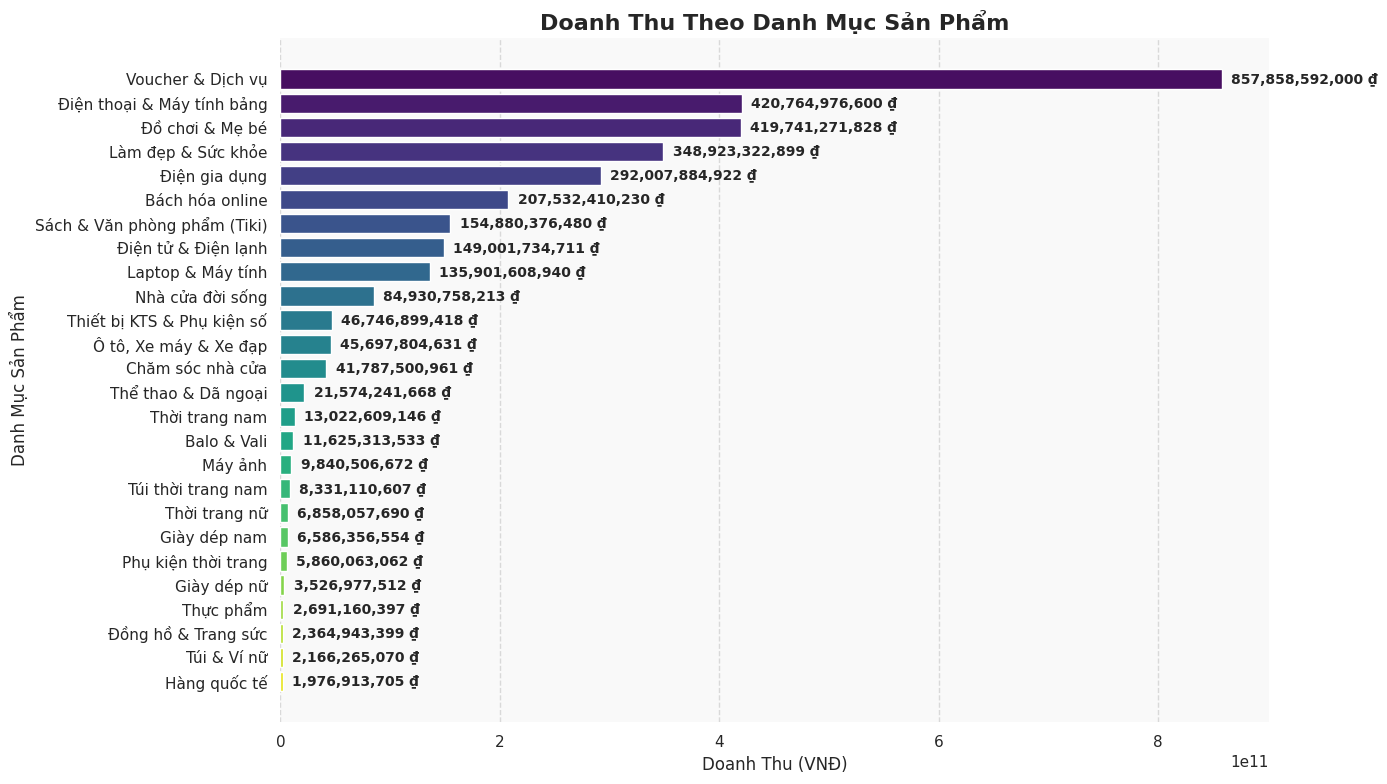

In [ ]:
# Số lượng bán theo danh mục
sales_by_category = df_cleaned.groupby('category_name').agg({
    'quantity_sold': 'sum',
    'revenue': 'sum'
}).reset_index()

# Sắp xếp theo số lượng bán (giảm dần)
sales_by_category = sales_by_category.sort_values('quantity_sold', ascending=True)

# Tạo dải màu từ đậm đến nhạt bằng cách đảo ngược palette
colors = sns.color_palette("Blues_r", len(sales_by_category))[::-1]

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(sales_by_category['category_name'], sales_by_category['quantity_sold'], color=colors)

# Hiển thị giá trị trên cột với khoảng cách padding lớn hơn
for bar in bars:
    width = bar.get_width()
    # Định dạng giá trị thành số có dấu phẩy
    formatted_value = f'{int(width):,}'
    # Hiển thị giá trị với khoảng cách padding lớn hơn
    ax.text(
        width + max(sales_by_category['quantity_sold']) * 0.02,  # Khoảng cách padding lớn hơn
        bar.get_y() + bar.get_height() / 2,
        formatted_value,
        va='center',
        fontsize=12,  # Font size lớn hơn
        fontweight='bold',  # In đậm
        color='black'  # Màu chữ đen để tương phản tốt
    )

# Cấu hình hiển thị
ax.set_title('Số Lượng Bán Theo Danh Mục Sản Phẩm', fontsize=16, fontweight='bold')
ax.set_xlabel('Số Lượng Bán Ra', fontsize=12)
ax.set_ylabel('Danh Mục Sản Phẩm', fontsize=12)

# Làm đẹp nền và lưới
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)
sns.despine(left=True, bottom=True)
ax.set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()
# Doanh thu theo danh mục
revenue_by_category = sales_by_category.sort_values(by='revenue', ascending=True)

# Tạo dải màu đẹp mắt từ palette "viridis"
colors = sns.color_palette("viridis_r", len(revenue_by_category))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(revenue_by_category['category_name'], revenue_by_category['revenue'], color=colors)

# Hiển thị giá trị trên từng cột
for bar in bars:
    width = bar.get_width()
    ax.text(width + max(revenue_by_category['revenue']) * 0.01,
            bar.get_y() + bar.get_height() / 2,
            f'{int(width):,} ₫',
            va='center',
            fontsize=10,
            fontweight='bold')

# Cấu hình hiển thị
ax.set_title('Doanh Thu Theo Danh Mục Sản Phẩm', fontsize=16, fontweight='bold')
ax.set_xlabel('Doanh Thu (VNĐ)', fontsize=12)
ax.set_ylabel('Danh Mục Sản Phẩm', fontsize=12)

# Làm đẹp nền và lưới
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)
sns.despine(left=True, bottom=True)
ax.set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

**Biểu đồ doanh số**
1. **Danh mục bán chạy nhất:**
   - **Danh mục "Làm đẹp & Sức khỏe"** dẫn đầu với số lượng bán cực kỳ cao (2,945,490 đơn hàng). Đây là danh mục có nhu cầu tiêu dùng lớn nhất, có thể do xu hướng chăm sóc sức khỏe và làm đẹp ngày càng phổ biến.
   - **Danh mục "Voucher & Dịch vụ"** đứng thứ hai với số lượng bán 2,391,049 đơn hàng. Điều này cho thấy nhu cầu sử dụng voucher và dịch vụ (như dịch vụ ăn uống, giải trí, spa, v.v.) cũng rất cao.

2. **Danh mục bán trung bình:**
   - Các danh mục như **"Sách & Văn phòng phẩm (Tiki)"**, **"Bách hóa online"**, và **"Đồ chơi & Mẹ bé"** có số lượng bán tương đối cao (trên 800,000 đơn hàng). Đây là những danh mục phổ biến trong cuộc sống hàng ngày, phục vụ nhu cầu học tập, gia đình, và giải trí.

3. **Danh mục bán ít:**
   - Các danh mục như **"Thời trang nam"**, **"Thời trang nữ"**, **"Đồng hồ & Trang sức"**, và **"Hàng quốc tế"** có số lượng bán rất thấp (dưới 50,000 đơn hàng). Điều này có thể do:
     - Nhu cầu mua sắm trong các danh mục này không cao hoặc không thường xuyên.
     - Giá trị trung bình của sản phẩm trong các danh mục này cao hơn, dẫn đến tần suất mua sắm ít hơn.

4. **Trend và Insight:**
   - **Danh mục "Làm đẹp & Sức khỏe"** và **"Voucher & Dịch vụ"** có số lượng bán rất cao, cho thấy xu hướng tiêu dùng đang hướng đến sức khỏe, làm đẹp, và trải nghiệm dịch vụ.
   - Các danh mục liên quan đến gia đình và trẻ em (như **"Đồ chơi & Mẹ bé"**) cũng có số lượng bán tốt, phản ánh nhu cầu chăm sóc và giải trí cho trẻ em.

**Biểu đồ doanh thu**
1. **Danh mục có doanh thu cao nhất:**
   - **Danh mục "Voucher & Dịch vụ"** dẫn đầu với doanh thu cực kỳ cao (857,858,592,000 VNĐ). Điều này cho thấy giá trị trung bình của các voucher và dịch vụ rất lớn, hoặc số lượng giao dịch lớn trong danh mục này.
   - **Danh mục "Điện thoại & Máy tính bảng"** đứng thứ hai với doanh thu 420,764,976,600 VNĐ. Đây là danh mục có giá trị sản phẩm cao, đặc biệt là các sản phẩm điện tử cao cấp như smartphone và laptop.

2. **Danh mục có doanh thu trung bình:**
   - Các danh mục như **"Đồ chơi & Mẹ bé"**, **"Làm đẹp & Sức khỏe"**, và **"Điện gia dụng"** có doanh thu tương đối cao (trên 200 tỷ VNĐ). Điều này phản ánh nhu cầu tiêu dùng lớn và giá trị trung bình của sản phẩm trong các danh mục này cũng cao.

3. **Danh mục có doanh thu thấp:**
   - Các danh mục như **"Thời trang nam"**, **"Thời trang nữ"**, **"Đồng hồ & Trang sức"**, và **"Hàng quốc tế"** có doanh thu rất thấp (dưới 10 tỷ VNĐ). Điều này có thể do:
     - Giá trị trung bình của sản phẩm trong các danh mục này thấp.
     - Số lượng bán ra ít, dẫn đến doanh thu tổng thể thấp.

4. **Trend và Insight:**
   - **Danh mục "Voucher & Dịch vụ"** có doanh thu cao nhất, cho thấy giá trị trung bình của các voucher và dịch vụ rất lớn, hoặc số lượng giao dịch lớn trong danh mục này.
   - **Danh mục "Điện thoại & Máy tính bảng"** có doanh thu cao thứ hai, phản ánh nhu cầu tiêu dùng cao đối với các sản phẩm điện tử cao cấp.
   - Các danh mục như **"Đồ chơi & Mẹ bé"** và **"Làm đẹp & Sức khỏe"** có doanh thu tốt, cho thấy nhu cầu tiêu dùng trong các lĩnh vực này vẫn rất mạnh.

**So sánh giữa hai biểu đồ:**
1. **Số lượng bán vs. Doanh thu:**
   - **Danh mục "Làm đẹp & Sức khỏe"** có số lượng bán rất cao nhưng doanh thu không phải cao nhất. Điều này cho thấy giá trị trung bình của sản phẩm trong danh mục này có thể thấp hơn so với các danh mục khác.
   - **Danh mục "Voucher & Dịch vụ"** có số lượng bán cao và doanh thu cao nhất, cho thấy giá trị trung bình của voucher và dịch vụ rất lớn.
   - **Danh mục "Điện thoại & Máy tính bảng"** có doanh thu cao nhưng số lượng bán không cao. Điều này cho thấy giá trị trung bình của sản phẩm trong danh mục này rất cao.

2. **Insight quan trọng:**
   - Các danh mục có **số lượng bán cao** không nhất thiết có **doanh thu cao**, và ngược lại. Điều này phụ thuộc vào giá trị trung bình của sản phẩm trong từng danh mục.
   - Các danh mục như **"Đồ chơi & Mẹ bé"**, **"Làm đẹp & Sức khỏe"**, và **"Điện gia dụng"** có cả số lượng bán và doanh thu tốt, cho thấy tiềm năng kinh doanh lớn trong các lĩnh vực này.

**Kết luận và Đề xuất:**
1. **Danh mục tiềm năng:**
   - **"Làm đẹp & Sức khỏe"**, **"Voucher & Dịch vụ"**, và **"Điện thoại & Máy tính bảng"** là các danh mục có tiềm năng lớn về cả số lượng bán và doanh thu. Nên tập trung phát triển và tối ưu hóa các sản phẩm/dịch vụ trong các danh mục này.
   - **"Đồ chơi & Mẹ bé"** và **"Điện gia dụng"** cũng là các danh mục đáng chú ý, với cả số lượng bán và doanh thu tốt.

2. **Danh mục cần cải thiện:**
   - Các danh mục như **"Thời trang nam"**, **"Thời trang nữ"**, **"Đồng hồ & Trang sức"**, và **"Hàng quốc tế"** có cả số lượng bán và doanh thu thấp. Cần xem xét chiến lược marketing, giá cả, và chất lượng sản phẩm để cải thiện hiệu suất của các danh mục này.

3. **Chiến lược giá trị trung bình:**
   - Các danh mục có giá trị trung bình cao (như **"Điện thoại & Máy tính bảng"**) có thể tiếp tục tập trung vào việc bán các sản phẩm cao cấp để tăng doanh thu.
   - Các danh mục có giá trị trung bình thấp (như **"Làm đẹp & Sức khỏe"**) có thể cân nhắc tăng giá trị trung bình của sản phẩm để cải thiện doanh thu.


###  Phân tích chuyên sâu: Danh mục Sách & Văn Phòng Phẩm

Danh mục Sách & Văn Phòng Phẩm là danh mục chiếm số lượng sản phẩm nhiều nhất trên sàn Tiki, vượt trội hơn so với các danh mục khác, việc hiểu rõ phân khúc này giúp làm nổi bật, hiểu được định vị thương hiệu Tiki trên thị trường thương mại điện tử.

In [ ]:
book_category = "Sách & Văn phòng phẩm (Tiki)"
book_products = df_cleaned[df_cleaned['category_name'] == book_category]
print(book_products['name'])

0                                  Sống, Làm Việc Và Yêu
1         Đừng Làm Việc Chăm Chỉ Hãy Làm Việc Thông Minh
2      Kế Toán Vỉa Hè - Thực Hành Báo Cáo Tài Chính C...
3      Truyện Ehon bé 3-4-5 tuổi - Bộ 4 cuốn Phát tri...
4                  Những Quy Luật Của Bản Chất Con Người
                             ...                        
385                                    Cảm Ơn Vì Đến Trễ
386                     Băng Keo Trong 5F (2 Cuộn / Lốc)
387                        Đất Rừng Phương Nam (Tái Bản)
388                                   Tịnh Tông Nhập Môn
389        Những Cuộc Phiêu Lưu Của Tom Sawyer (Đinh Tị)
Name: name, Length: 383, dtype: string


Wordcloud về tên sản phẩm của danh mục này

In [ ]:
# Hàm để tiền xử lý văn bản tiếng Việt
def preprocess_text(text):
    if isinstance(text, str):
        # Chuyển văn bản về chữ thường
        text = text.lower()

        # Loại bỏ dấu câu và các ký tự đặc biệt
        text = re.sub(r'[^\w\s]', ' ', text)

        # Loại bỏ chữ số
        text = re.sub(r'\d+', ' ', text)

        # Loại bỏ các khoảng trắng thừa
        text = re.sub(r'\s+', ' ', text).strip()

        return text
    return ""

# Tiền xử lý tên sản phẩm của sách
book_products['processed_name'] = book_products['name'].apply(preprocess_text)

# Thêm stopwords tiếng Việt
vietnamese_stopwords = [
    'và', 'của', 'cho', 'là', 'với', 'có', 'trong', 'đến', 'tới', 'từ', 'khi',
    'rằng', 'như', 'để', 'bởi', 'bởi vì', 'các', 'những', 'vì', 'về', 'theo',
    'cùng', 'hay', 'hoặc', 'nhưng', 'nếu', 'mà', 'là', 'không', 'được', 'tại',
    'một', 'này', 'đó', 'được', 'nên', 'rất', 'thì', 'đang', 'đã', 'sẽ', 'rồi',
    'mình', 'ra', 'vào', 'lại', 'đây', 'kia', 'thế'
]

# Kết hợp stopwords tiếng Việt với stopwords tiếng Anh
all_stopwords = set(stopwords.words('english') + vietnamese_stopwords)

# Loại bỏ stopwords từ tên đã xử lý
book_products['processed_name']  = book_products['processed_name'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in all_stopwords])
)

<ipython-input-252-2317032bb265>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_products['processed_name'] = book_products['name'].apply(preprocess_text)
<ipython-input-252-2317032bb265>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_products['processed_name']  = book_products['processed_name'].apply(


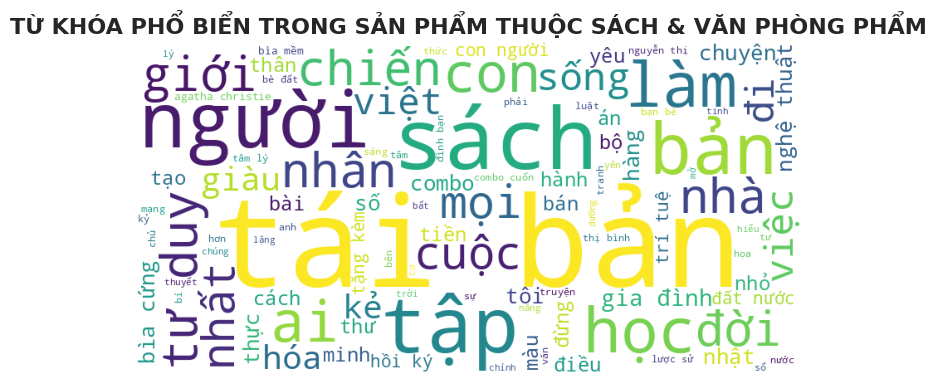

In [ ]:
text = ' '.join(book_products['processed_name'].astype(str))
wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        colormap='viridis',
        contour_width=1,
        contour_color='steelblue'
    ).generate(text)

# Biểu đồ Wordcloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud)
plt.title(f'TỪ KHÓA PHỔ BIỂN TRONG SẢN PHẨM THUỘC SÁCH & VĂN PHÒNG PHẨM', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


Nhận xét Từ khóa Phổ biến trong Sách & Văn phòng phẩm (Tiki)

Biểu đồ word cloud cho thấy:

- **"Sách" & "Tái bản"** là chủ đạo, sách tái bản có lượng bán lớn.
- **"Học", "Tư Duy", "Làm", "Đời", "Sống"** phản ánh tầm quan trọng của sách giáo dục và kỹ năng sống.
- **"Combo", "Tặng", "Nhất"** cho thấy chiến lược marketing tập trung vào ưu đãi và sự mới mẻ.
- **"Nghệ thuật", "Tôi", "Con Người", "Gia đình", "Đất nước", "Thế giới"** thể hiện xu hướng đọc sách phát triển bản thân và kiến thức xã hội.


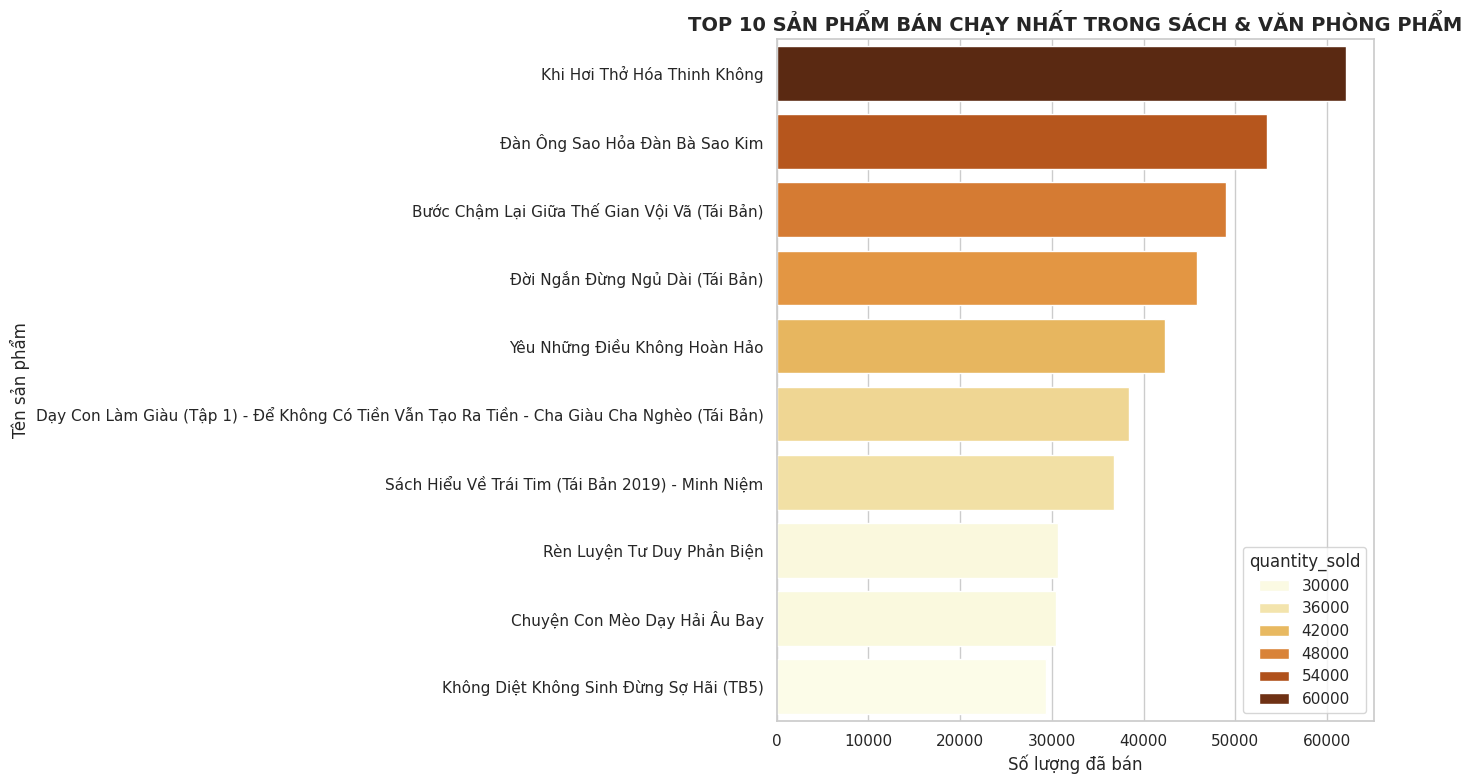

In [ ]:
top_selling_books = book_products.sort_values('quantity_sold', ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x='quantity_sold', y='name', data=top_selling_books, palette='YlOrBr', hue = 'quantity_sold')
plt.title(f'TOP 10 SẢN PHẨM BÁN CHẠY NHẤT TRONG SÁCH & VĂN PHÒNG PHẨM', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng đã bán')
plt.ylabel('Tên sản phẩm')
plt.tight_layout()
plt.show()

<p align="center">
  <img src="https://salt.tikicdn.com/cache/750x750/ts/product/98/44/06/f70e31b82dd24a7dd1e62f4e6121ee4b.jpg.webp" alt="Ảnh 1" width="200" style="margin-right: 10px;">
  <img src="https://salt.tikicdn.com/cache/750x750/ts/product/0a/f6/38/bc10734989977da424642a1c4750eee2.jpg.webp" alt="Ảnh 2" width="200" style="margin-right: 10px;">
  <img src="https://salt.tikicdn.com/cache/750x750/ts/product/f9/d2/81/38c884e5efa37680feb11e7f775b2392.jpg.webp" alt="Ảnh 3" width="200">
  <img src="https://salt.tikicdn.com/cache/750x750/ts/product/43/81/60/78e9c7ed197090e5db04738476cb6e28.jpg.webp" alt="Ảnh 4" width="200">
</p>


**Các xu hướng nổi bật:**

1.  **Sách truyền cảm hứng và kỹ năng sống dẫn đầu:**
    * Các tựa sách như “Khi Hơi Thở Hóa Thinh Không” (gần 60.000 bản), “Bước Chậm Lại Giữa Thế Gian Vội Vã”, và “Đời Ngắn Đừng Ngủ Dài” (45.000–48.000 bản) cho thấy sự quan tâm lớn đến các chủ đề truyền cảm hứng, chữa lành và phát triển bản thân.
    * Đây là xu hướng tiếp tục sau đại dịch, phản ánh nhu cầu chăm sóc tinh thần và tìm kiếm ý nghĩa sống.

2.  **Sách tâm lý và mối quan hệ duy trì sức hút:**
    * “Đàn Ông Sao Hỏa, Đàn Bà Sao Kim” (gần 55.000 bản) cho thấy độc giả vẫn rất quan tâm đến giao tiếp, mối quan hệ và tâm lý giới.
    * Đây là dòng sách kinh điển có sức mua ổn định.

3.  **Tăng trưởng nhanh ở thể loại tài chính cá nhân:**
    * Sự thành công của “Dạy Con Làm Giàu (Tập 1)” cho thấy sự thay đổi trong tư duy đọc, hướng đến nâng cao năng lực quản lý tài chính và đầu tư cá nhân, đặc biệt ở giới trẻ.

4.  **Sách tái bản vẫn có sức hút bền vững:**
    * Doanh số cao của các sách tái bản liên tục chứng minh giá trị nội dung và sự trung thành của độc giả.

Gợi ý chiến lược ở danh mục này:

* Tập trung mở rộng kho sách thuộc các nhóm: kỹ năng sống, phát triển cá nhân, tài chính cá nhân và sách thiếu nhi phát triển tư duy.
* Xây dựng chiến dịch khuyến mãi xoay quanh top sách bán chạy và sách tái bản để tăng doanh số và giữ chân người đọc cũ.
* Phát triển các dòng sách cùng chủ đề với top sách bán chạy, nhằm tiếp cận nhóm khách hàng có nhu cầu tương tự, từ đó mở rộng thị phần hiệu quả.

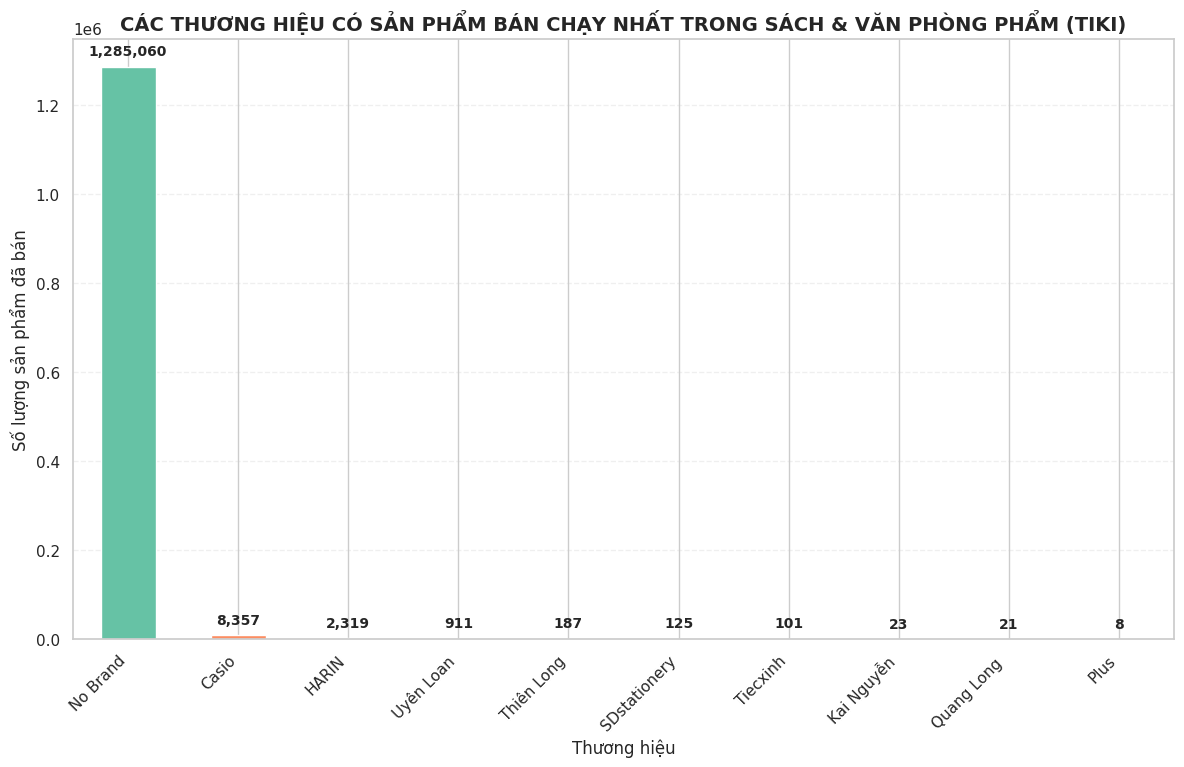

In [ ]:
if 'brand_name' in df_cleaned.columns:
    book_brands = book_products.groupby('brand_name')['quantity_sold'].sum().sort_values(ascending=False).head(10)
    y_label = 'Số lượng sản phẩm đã bán'
    plt.figure(figsize=(12, 8))
    colors = plt.cm.Set2(np.linspace(0.1, 0.9, len(book_brands)))
    ax = book_brands.plot(kind='bar', color=colors)
    for i, v in enumerate(book_brands):
        ax.text(i, v + (book_brands.max() * 0.02), f'{int(v):,}',
                ha='center', fontweight='bold', fontsize=10)
    plt.title(f'CÁC THƯƠNG HIỆU CÓ SẢN PHẨM BÁN CHẠY NHẤT TRONG SÁCH & VĂN PHÒNG PHẨM (TIKI)', fontsize=14, fontweight='bold')
    plt.xlabel('Thương hiệu', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

* **"No Brand" áp đảo:** 1.285.060 sản phẩm, chiếm ưu thế tuyệt đối.
    * Nguyên nhân: NXB trực tiếp, VP phẩm rẻ không nhãn, người dùng chuộng giá.
* **Thương hiệu nổi bật (ngoài "No Brand"):**
    * **Casio (8.357):** Dẫn đầu, máy tính, VP điện tử, uy tín.
    * **HARIN (2.319), Uyên Loan (911):** Nội địa, phân khúc nhất định (sổ, bút).
* **Thương hiệu khác doanh số thấp (<200):** Thiên Long, SDStationery, Tlecxinh, Kai Nguyễn...
    * Có thể do hạn chế: phân phối, nhận diện online, cạnh tranh giá.


**1. Tầm quan trọng chiến lược của danh mục Sách & Văn phòng phẩm trên Tiki**

- Là danh mục có số lượng sản phẩm lớn nhất toàn sàn, thể hiện sự phong phú và chiều sâu hàng hóa  
- Tiki có vị thế mạnh trong lĩnh vực học tập – tri thức  
- Là mảng chủ lực giúp định hình thương hiệu Tiki như một nền tảng TMĐT thiên về giáo dục – văn hóa  
- Là nền tảng dữ liệu và khách hàng tốt để xây dựng chiến lược phát triển toàn sàn, đặc biệt khi các ngành hàng khác cạnh tranh cao

2**. Xu hướng tiêu dùng & thị hiếu nổi bật từ dữ liệu sách**

- Phát triển bản thân và kỹ năng sống chiếm ưu thế  
  → Các từ khóa nổi bật: "Tư duy", "Sống", "Đời", "Tái bản", "Nghệ thuật"  
  → Người dùng ưu tiên sức khỏe tinh thần, phát triển cá nhân sau đại dịch

- Sách tâm lý và quan hệ xã hội duy trì độ phổ biến  
  → Ví dụ: "Đàn Ông Sao Hỏa, Đàn Bà Sao Kim" vẫn có doanh số lớn

**3. Chiến lược thương hiệu & thói quen mua sắm**

- Sách tái bản và sản phẩm "No Brand" bán chạy  
  → Từ khóa "Tái bản" cho thấy người dùng trung thành và có thói quen đọc lặp  
  → "No Brand" dẫn đầu về số lượng sản phẩm, phản ánh việc người dùng quan tâm nội dung hơn thương hiệu

- Khuyến mãi và combo thu hút mạnh  
  → Các từ khóa như "Combo", "Tặng", "Nhất" phản ánh xu hướng ưa chuộng giá trị gia tăng

**4. Gợi ý chiến lược phát triển toàn sàn**

| Chiến lược | Ý nghĩa thực tiễn |
|-----------|-------------------|
| Tập trung vào danh mục tri thức – giáo dục | Tạo khác biệt với các sàn TMĐT thiên về thời trang, công nghệ |
| Phát triển nhãn hàng riêng từ sản phẩm "No Brand" | Tăng biên lợi nhuận, kiểm soát chất lượng |
| Phân tích hành vi người đọc theo phân khúc | Đề xuất sản phẩm sát nhu cầu từng nhóm khách hàng |
| Tạo chiến dịch tiếp thị xoay quanh sách bán chạy | Tăng nhận diện, thu hút người dùng mới qua các hiệu ứng lan tỏa |


## 4.2. Phân tích theo sản phẩm

### Phân tích tổng quan sản phẩm

In [ ]:
# Phân tích tổng quan sản phẩm
print(f"Tổng số sản phẩm trong dataset: {len(df_cleaned):,}")

# Phân tích giá cả
print("\n--- Thống kê giá sản phẩm ---")
print(f"Giá trung bình: {df_cleaned['price'].mean():,.0f} đồng")
print(f"Giá cao nhất: {df_cleaned['price'].max():,.0f} đồng")
print(f"Giá thấp nhất: {df_cleaned['price'].min():,.0f} đồng")

# Phân tích giảm giá
print("\n--- Thống kê giảm giá ---")
print(f"Tỷ lệ giảm giá trung bình: {df_cleaned['discount_rate'].mean():.1f}%")
print(f"Tỷ lệ giảm giá lớn nhất: {df_cleaned['discount_rate'].max()}%")
print(f"Sản phẩm có giảm giá: {(df_cleaned['discount_rate'] > 0).sum():,} ({(df_cleaned['discount_rate'] > 0).sum()/len(df_cleaned)*100:.1f}%)")

# Phân tích đánh giá
print("\n--- Thống kê đánh giá sản phẩm ---")
print(f"Số lượt đánh giá trung bình: {df_cleaned['review_count'].mean():.1f}")
print(f"Sản phẩm có nhiều đánh giá nhất: {df_cleaned['review_count'].max():,}")
print(f"Sản phẩm không có đánh giá: {(df_cleaned['review_count'] == 0).sum():,} ({(df_cleaned['review_count'] == 0).sum()/len(df_cleaned)*100:.1f}%)")

# Sản phẩm bán chạy
if 'da_ban' in df_cleaned.columns and df_cleaned['da_ban'].notna().any():
    print("\n--- Thống kê sản phẩm bán chạy ---")
    print(f"Số lượng bán ra trung bình: {df_cleaned['da_ban'].mean():.1f}")
    print(f"Sản phẩm bán chạy nhất: {df_cleaned['da_ban'].max():.0f}")

Tổng số sản phẩm trong dataset: 9,382

--- Thống kê giá sản phẩm ---
Giá trung bình: 849,236 đồng
Giá cao nhất: 67,667,000 đồng
Giá thấp nhất: 1,000 đồng

--- Thống kê giảm giá ---
Tỷ lệ giảm giá trung bình: 10.3%
Tỷ lệ giảm giá lớn nhất: 89%
Sản phẩm có giảm giá: 3,543 (37.8%)

--- Thống kê đánh giá sản phẩm ---
Số lượt đánh giá trung bình: 59.1
Sản phẩm có nhiều đánh giá nhất: 7,092
Sản phẩm không có đánh giá: 2,510 (26.8%)


🛍️ Xu hướng thị trường

- **Phân tán giá:** Giá sản phẩm trải rộng từ 1.000 VNĐ đến hơn 67 triệu VNĐ, cho thấy thị trường đa dạng phân khúc (bình dân đến cao cấp).
- **Giá trung bình:** ~849.000 VNĐ, tập trung ở phân khúc trung bình, phù hợp với đa số người tiêu dùng.

 📣 Tiếp thị & Chiến lược khuyến mãi

- **Tỷ lệ giảm giá:** 37.8% sản phẩm có giảm giá, cho thấy đây là chiến lược tiếp thị phổ biến.
- **Mức giảm giá:** Trung bình 10.3% (khá hấp dẫn), một số sản phẩm giảm sâu (đến 89%) có thể là xả hàng hoặc thu hút traffic.

👥 Hành vi khách hàng

- **Lượt đánh giá trung bình:** 59 lượt/sản phẩm, cho thấy khách hàng có xu hướng để lại phản hồi.
- **Sản phẩm không có đánh giá:** 26.8%, có thể là hàng mới, ít phổ biến hoặc tiếp thị chưa hiệu quả.
- **Sản phẩm có lượt đánh giá cao nhất:** 7.092 lượt, hiệu ứng "người nổi tiếng" trong thương mại điện tử.

### Phân tích Top sản phẩm theo các tiêu chí

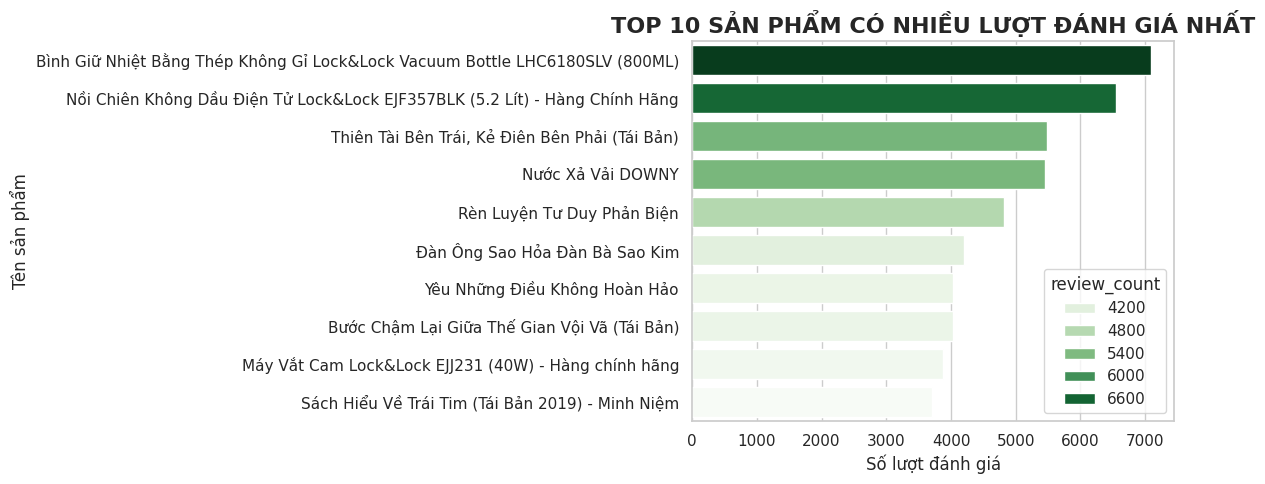

In [ ]:
# Top 10 sản phẩm có lượt đánh giá cao nhất
top_reviewed = df_cleaned.sort_values('review_count', ascending=False).head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x='review_count', y='name', data=top_reviewed, palette='Greens', hue = 'review_count')
plt.title('TOP 10 SẢN PHẨM CÓ NHIỀU LƯỢT ĐÁNH GIÁ NHẤT', fontsize=16, fontweight='bold')
plt.xlabel('Số lượt đánh giá')
plt.ylabel('Tên sản phẩm')
plt.tight_layout()
plt.show()



Số lượt đánh giá tập trung mạnh vào một vài sản phẩm nổi bật, đặc biệt là hai sản phẩm gia dụng Lock&Lock dẫn đầu về độ phổ biến và uy tín. Sách vẫn giữ vị trí quan trọng trong top được đánh giá nhiều, cho thấy sức hút bền vững. Sự đa dạng sản phẩm trong top 10 phản ánh nhu cầu đa chiều của người tiêu dùng. Mức độ tương tác giảm dần ở các sản phẩm phía dưới có thể do độ phổ biến hoặc thời gian ra mắt khác nhau.

<ipython-input-258-af493bf319eb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(x='price', y='short_name', data=top_expensive, palette=palette_expensive, ax=ax1)
<ipython-input-258-af493bf319eb>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars2 = sns.barplot(x='price', y='short_name', data=top_cheap, palette=palette_cheap, ax=ax2)


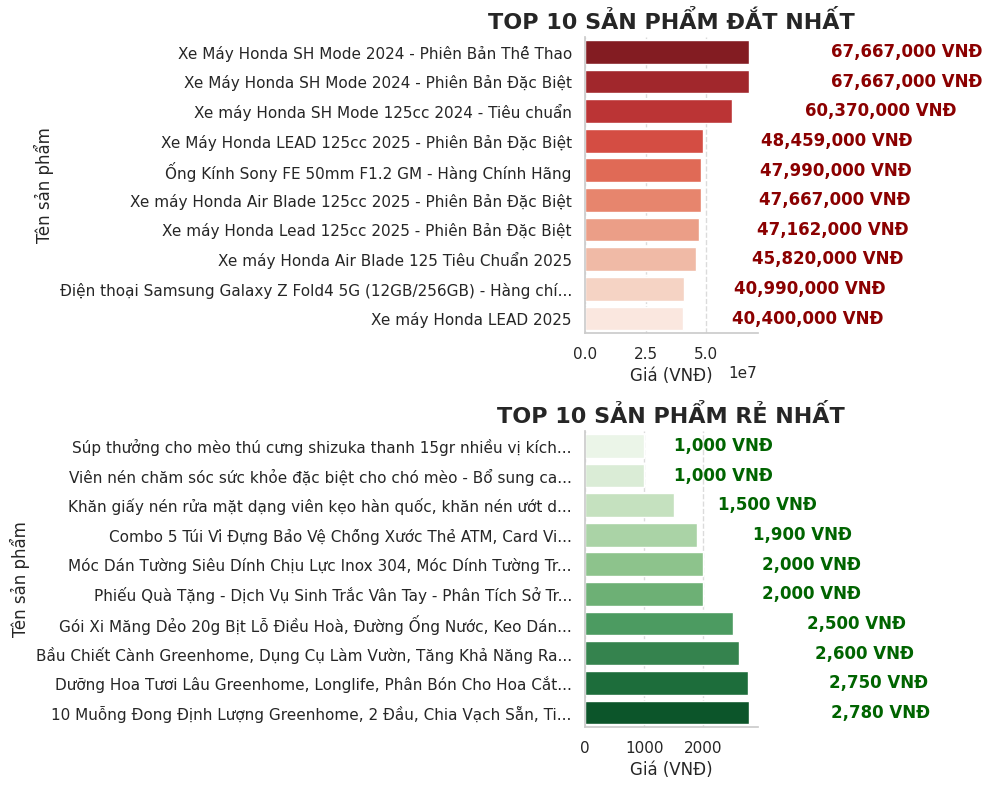

In [ ]:
# Lấy top 10 sản phẩm đắt nhất và rẻ nhất
top_expensive = df_cleaned.sort_values('price', ascending=False).head(10)
top_cheap = df_cleaned.sort_values('price').head(10)

# Subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [1, 1]})

# Cắt tên sản phẩm để hiển thị gọn gàng hơn
top_expensive['short_name'] = top_expensive['name'].apply(lambda x: (x[:60] + '...') if len(x) > 60 else x)
top_cheap['short_name'] = top_cheap['name'].apply(lambda x: (x[:60] + '...') if len(x) > 60 else x)

palette_expensive = sns.color_palette("Reds_r", n_colors=len(top_expensive))
bars1 = sns.barplot(x='price', y='short_name', data=top_expensive, palette=palette_expensive, ax=ax1)
for i, p in enumerate(bars1.patches):
    if(i<10):
      width = p.get_width()
      ax1.text(width + 0.5 * width, p.get_y() + p.get_height()/2, f'{int(width):,} VNĐ',
              ha='left', va='center', fontweight='bold', color='darkred')

# Biểu đồ cho sản phẩm rẻ nhất
palette_cheap = sns.color_palette("Greens", n_colors=len(top_cheap))
bars2 = sns.barplot(x='price', y='short_name', data=top_cheap, palette=palette_cheap, ax=ax2)
for i, p in enumerate(bars2.patches):
    if(i<10):
      width = p.get_width()
      ax2.text(width + 0.5 * width, p.get_y() + p.get_height()/2, f'{int(width):,} VNĐ',
              ha='left', va='center', fontweight='bold', color='darkgreen')


ax1.set_title('TOP 10 SẢN PHẨM ĐẮT NHẤT', fontsize=16, fontweight='bold')
ax1.set_xlabel('Giá (VNĐ)', fontsize=12)
ax1.set_ylabel('Tên sản phẩm', fontsize=12)
ax1.grid(axis='x', linestyle='--', alpha=0.7)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
####
ax2.set_title('TOP 10 SẢN PHẨM RẺ NHẤT', fontsize=16, fontweight='bold')
ax2.set_xlabel('Giá (VNĐ)', fontsize=12)
ax2.set_ylabel('Tên sản phẩm', fontsize=12)
ax2.grid(axis='x', linestyle='--', alpha=0.7)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


# Điều chỉnh layout để không bị chồng lấn
plt.tight_layout()
plt.subplots_adjust(top=0.95)

plt.show()

*Top 10 sản phẩm đắt nhất đều có giá trên 40 triệu VDN:*

🛍️ Xe Máy Honda SH Mode 2024 – Phiên Bản Thể Thao và Phiên Bản Đặc Biệt đều dẫn đầu với giá ~67.7 triệu VNĐ, vượt xa các sản phẩm còn lại.

🛍️Honda chiếm phần lớn trong top 10 sản phẩm đắt nhất, khẳng định vị thế thương hiệu mạnh và phổ biến trong phân khúc cao cấp.

Ống kính Sony FE 50mm F1.2 GM (~48 triệu VNĐ)
Điện thoại Samsung Galaxy Z Fold4 5G (~41 triệu VNĐ) ...cho thấy Tiki cung cấp đa dạng sản phẩm công nghệ cao cấp, không chỉ giới hạn ở xe máy.


*Top 10 sản phẩm rẻ nhất đều có giá dưới 3,000 VNĐ:*

🛍️ Đây là các sản phẩm thuộc nhóm tiêu dùng nhanh hoặc phụ kiện nhỏ, thường có:

Tần suất mua cao

Giao dịch nhanh

Dễ thu hút người dùng mới nhờ giá thấp

🌱 Việc bán các sản phẩm siêu rẻ này không mang lại doanh thu lớn từng đơn hàng, nhưng giúp tăng lưu lượng truy cập và trải nghiệm mua sắm trên nền tảng.

### Top sản phẩm có doanh thu cao nhất

Kết hợp comment với thông tin sản phẩm để phân tích


In [ ]:
comment_product_df = pd.merge(comment_df, df_cleaned, left_on='product_id', right_on='id', how='inner')

Gộp lại thành bảng tổng hợp theo product_id

In [ ]:
product_analysis = pd.merge(
    df_cleaned[['id', 'name', 'price', 'revenue', 'quantity_sold', 'has_discount']],
    comment_product_df.groupby('product_id').agg(
        avg_rating=('rating', 'mean'),
        review_count=('rating', 'count')
    ).reset_index(),
    left_on='id',
    right_on='product_id',
    how='left'
)

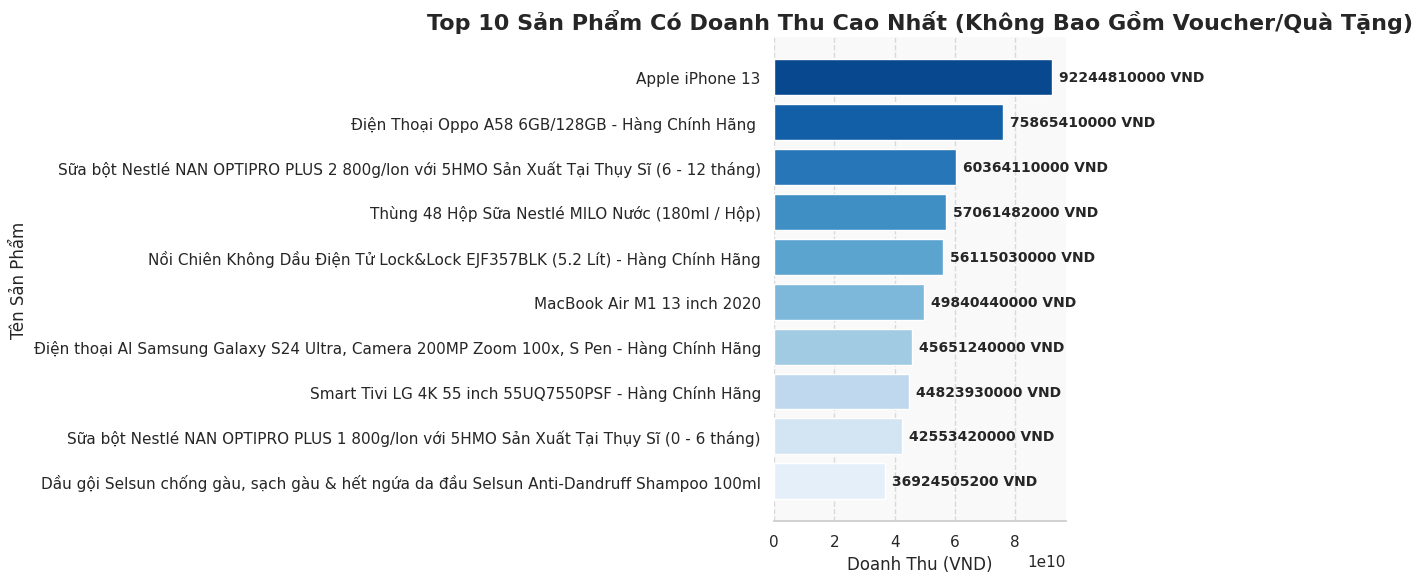

In [ ]:
# Danh sách các từ khóa cần loại bỏ (voucher, quà tặng, gift card,...)
keywords_to_exclude = ['voucher', 'quà tặng', 'gift', 'thẻ quà', 'voucher tiki']

# Lọc các sản phẩm không phải là voucher/quà tặng
filtered_product_analysis = product_analysis[
    ~product_analysis['name'].str.contains('|'.join(keywords_to_exclude), case=False, na=False)
]

# Lấy top 10 sản phẩm có doanh thu cao nhất sau khi lọc
top_revenue_products = filtered_product_analysis.sort_values(by='revenue', ascending=False).head(10)

# Sắp xếp để vẽ biểu đồ từ thấp đến cao (trên biểu đồ là thấp, dưới là cao)
top_revenue_products = top_revenue_products.sort_values(by='revenue', ascending=True)

# Tạo bảng màu gradient từ đậm đến nhạt bằng seaborn
colors = sns.color_palette("Blues", len(top_revenue_products))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(top_revenue_products['name'], top_revenue_products['revenue'], color=colors)

# Hiển thị giá trị trên từng cột
ax.bar_label(bars, fmt='%.0f VND', padding=5, fontsize=10, fontweight='bold')

# Cấu hình hiển thị
plt.title("Top 10 Sản Phẩm Có Doanh Thu Cao Nhất (Không Bao Gồm Voucher/Quà Tặng)", fontsize=16, fontweight='bold')
plt.xlabel("Doanh Thu (VND)", fontsize=12)
plt.ylabel("Tên Sản Phẩm", fontsize=12)

# Thêm lưới dọc để dễ đọc giá trị hơn
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)

# Làm đẹp nền và đường viền
sns.despine(left=True, bottom=False)
ax.set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

📊 **Phân tích tổng quan:**

1. **Sản phẩm dẫn đầu về doanh thu:**
   - **Apple iPhone 13** đạt **92,248 tỷ đồng**, đứng đầu danh sách.
   - Đây là sản phẩm công nghệ cao cấp, thuộc phân khúc giá trị cao, và có thể phản ánh sức mạnh thương hiệu Apple cũng như nhu cầu lớn từ khách hàng.

2. **Các sản phẩm tiếp theo:**
   - Các sản phẩm khác trong top 10 đều đạt doanh thu đáng kể:
     - **Điện Thoại Oppo A58 6GB/128GB**: 75,865 tỷ đồng.
     - **Sữa bột Nestlé NAN OPTIPRO PLUS 2**: 60,364 tỷ đồng.
     - **Thùng 48 Hộp Sữa Nestlé MILO Nước**: 57,061 tỷ đồng.
     - **Nồi Chiên Không Dầu Điện Tử Lock&Lock EJF357BLK**: 56,115 tỷ đồng.
     - **MacBook Air M1 13 inch 2020**: 49,840 tỷ đồng.
     - **Smart Tivi LG 4K 55 inch**: 44,823 tỷ đồng.
     - **Sữa bột Nestlé NAN OPTIPRO PLUS 1**: 42,553 tỷ đồng.
     - **Dầu gội Selsun chống gàu**: 36,924 tỷ đồng.

3. **Mức chênh lệch doanh thu:**
   - Sự chênh lệch giữa sản phẩm dẫn đầu (**Apple iPhone 13**) và sản phẩm cuối cùng (**Dầu gội Selsun chống gàu**) là khoảng **55,324 tỷ đồng**.
   - Mặc dù vậy, tất cả các sản phẩm trong top 10 đều đạt doanh thu **trên 36 tỷ đồng**, cho thấy mức độ thành công vượt trội.

---

💡 **Nhận xét chi tiết:**

1. **Sản phẩm công nghệ chiếm ưu thế:**
   - Trong top 10, có **4 sản phẩm công nghệ**:
     - **Apple iPhone 13**
     - **Điện Thoại Oppo A58 6GB/128GB**
     - **MacBook Air M1 13 inch 2020**
     - **Smart Tivi LG 4K 55 inch**
   - Điều này cho thấy:
     - Người tiêu dùng ngày càng chú trọng đến thiết bị công nghệ hiện đại.
     - Thương hiệu nổi tiếng như Apple, Oppo, và LG có sức ảnh hưởng lớn đến quyết định mua sắm.

2. **Sản phẩm chăm sóc sức khỏe & gia đình phổ biến:**
   - Hai sản phẩm sữa bột Nestlé (**NAN OPTIPRO PLUS 2 và NAN OPTIPRO PLUS 1**) nằm trong top 10, với doanh thu lần lượt là **60,364 tỷ đồng** và **42,553 tỷ đồng**.
   - Điều này phản ánh:
     - Yêu cầu cao về dinh dưỡng cho trẻ em và người lớn.
     - Uy tín và chất lượng của thương hiệu Nestlé đã được khẳng định trên thị trường.

   - Ngoài ra, **Thùng 48 Hộp Sữa Nestlé MILO Nước** cũng đạt **57,061 tỷ đồng**, cho thấy sự phổ biến của sản phẩm này trong giới trẻ và gia đình.

3. **Sản phẩm nhà bếp và chăm sóc cá nhân:**
   - **Nồi Chiên Không Dầu Điện Tử Lock&Lock EJF357BLK** đạt **56,115 tỷ đồng**, cho thấy xu hướng sử dụng thiết bị nhà bếp thông minh và tiện lợi.
   - **Dầu gội Selsun chống gàu** đạt **36,924 tỷ đồng**, chứng tỏ nhu cầu chăm sóc tóc và da đầu vẫn rất lớn, đặc biệt là đối với sản phẩm giải quyết vấn đề cụ thể như gàu.

---

🌟 **Kết luận và gợi ý hành động:**

1. **Tập trung vào sản phẩm công nghệ:**
   - Các sản phẩm công nghệ như **iPhone 13, MacBook Air, Smart Tivi LG** đang đóng góp phần lớn vào doanh thu.
   - Cần duy trì chiến lược marketing mạnh mẽ cho các sản phẩm này, chẳng hạn:
     - Chương trình khuyến mãi hấp dẫn.
     - Đảm bảo nguồn cung ổn định.
     - Tăng cường dịch vụ hậu mãi và hỗ trợ kỹ thuật.

2. **Khuyến khích tiêu dùng bền vững:**
   - Các sản phẩm tiêu dùng như **sữa bột, sữa nước, dầu gội** cũng mang lại doanh thu tốt nhờ tính cần thiết và tần suất mua sắm cao.
   - Có thể triển khai chương trình **tích điểm đổi quà** hoặc **khuyến mãi theo mùa** để thúc đẩy mua sắm lặp lại.

3. **Xây dựng thương hiệu và uy tín:**
   - Các thương hiệu nổi tiếng như **Apple, Nestlé, LG, Lock&Lock** đã tạo dựng được niềm tin và vị thế trên thị trường.
   - Cần tiếp tục đầu tư vào **quảng cáo, chất lượng sản phẩm, và trải nghiệm khách hàng** để giữ vững vị trí.

4. **Phân tích sâu hơn về sản phẩm mới:**
   - Một số sản phẩm mới như **Điện thoại Oppo A58** và **Nồi Chiên Không Dầu Lock&Lock** đã nhanh chóng lọt vào top 10.
   - Điều này cho thấy tiềm năng của các sản phẩm mới và việc cập nhật sản phẩm liên tục là yếu tố quan trọng.

5. **Giải pháp cho sản phẩm còn lại:**
   - Đối với các sản phẩm chưa đạt doanh thu cao, cần xem xét:
     - Chất lượng sản phẩm.
     - Giá cả cạnh tranh.
     - Chiến lược marketing phù hợp.
     - Dịch vụ khách hàng.

### Top sản phẩm có số lượng bán ra nhiều nhất

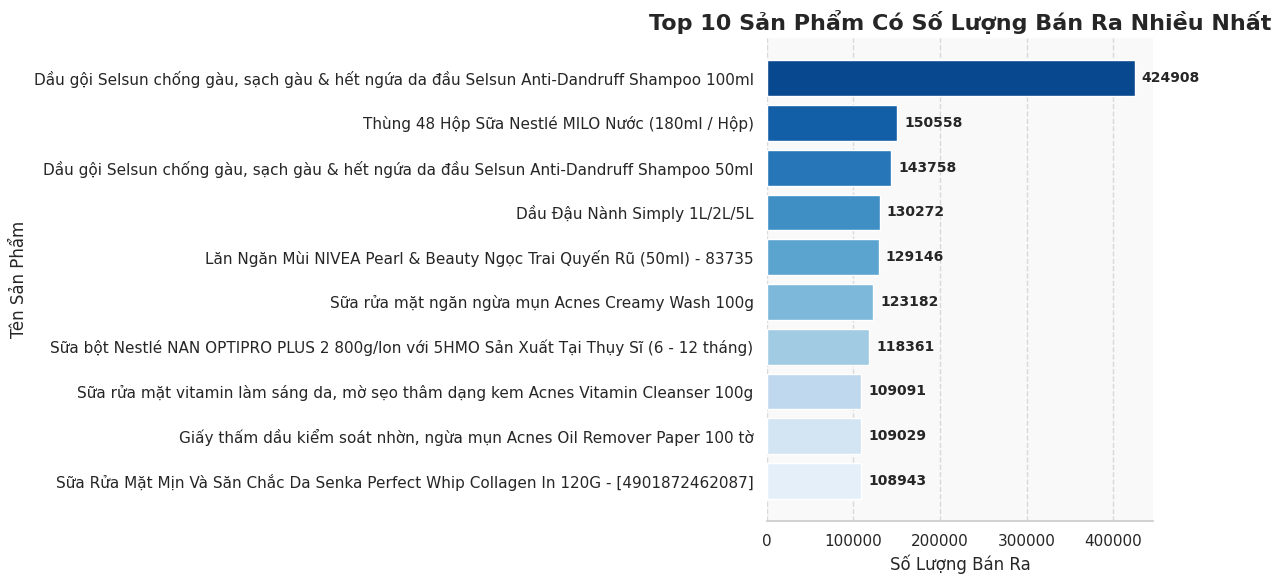

In [ ]:
# Lấy top 10 sản phẩm có lượng bán cao nhất
top_sold_products = filtered_product_analysis.sort_values(by='quantity_sold', ascending=False).head(10)

# Sắp xếp lại theo thứ tự tăng dần để vẽ biểu đồ cột ngang đẹp hơn
top_sold_products = top_sold_products.sort_values(by='quantity_sold', ascending=True)

# Tạo màu sắc gradient từ đậm đến nhạt bằng seaborn
colors = sns.color_palette("Blues", len(top_sold_products))

# Vẽ biểu đồ cột ngang
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(top_sold_products['name'], top_sold_products['quantity_sold'], color=colors)

# Hiển thị giá trị trên từng cột (áp dụng trực tiếp lên bars)
ax.bar_label(bars, fmt='%d', padding=5, fontsize=10, fontweight='bold')

# Cấu hình hiển thị
plt.title("Top 10 Sản Phẩm Có Số Lượng Bán Ra Nhiều Nhất", fontsize=16, fontweight='bold')
plt.xlabel("Số Lượng Bán Ra", fontsize=12)
plt.ylabel("Tên Sản Phẩm", fontsize=12)

# Thêm lưới dọc để dễ đọc giá trị hơn
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)

# Làm đẹp nền và đường viền
sns.despine(left=True, bottom=False)
ax.set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

💡 **Nhận xét chi tiết:**

1. **Sản phẩm chăm sóc tóc và da chiếm ưu thế:**
   - Trong top 10, có **5 sản phẩm liên quan đến chăm sóc tóc và da**:
     - **Dầu gội Selsun chống gàu (100ml và 50ml)**
     - **Sữa rửa mặt ngăn ngừa mụn Acnes Creamy Wash**
     - **Sữa rửa mặt vitamin làm sáng da Acnes Vitamin Cleanser**
     - **Giấy thấm dầu kiểm soát nhờn Acnes Oil Remover Paper**
     - **Sữa Rửa Mặt Mịn Và Săn Chắc Da Senka Perfect Whip Collagen In**
   - Điều này phản ánh:
     - Yêu cầu cao về chăm sóc tóc và da, đặc biệt là đối với các vấn đề phổ biến như gàu, mụn, và dầu thừa.
     - Uy tín và chất lượng của thương hiệu đã được khẳng định trên thị trường.

2. **Sản phẩm tiêu dùng gia đình phổ biến:**
   - Hai sản phẩm sữa bột và sữa nước nằm trong top 10:
     - **Sữa bột Nestlé NAN OPTIPRO PLUS 2**: 118,361 đơn vị.
     - **Thùng 48 Hộp Sữa Nestlé MILO Nước**: 150,558 đơn vị.
   - Điều này cho thấy:
     - Sữa bột và sữa nước là những sản phẩm thiết yếu trong gia đình, đặc biệt là cho trẻ em và người lớn.
     - Thương hiệu Nestlé đã xây dựng được niềm tin và sự lựa chọn hàng đầu của người tiêu dùng.

3. **Sản phẩm thực phẩm và làm đẹp đa dạng:**
   - Ngoài các sản phẩm chăm sóc tóc và da, còn có:
     - **Dầu Đậu Nành Simply (1L/2L/5L)**: 130,272 đơn vị.
     - **Lăn Ngăn Mùi NIVEA Pearl & Beauty Ngọc Trai Quyển Rũ**: 129,146 đơn vị.
   - Điều này cho thấy:
     - Người tiêu dùng ngày càng chú trọng vào việc sử dụng các sản phẩm thực phẩm lành mạnh và mỹ phẩm an toàn.
     - Thương hiệu nổi tiếng như NIVEA đã tạo dựng được uy tín trong lĩnh vực chăm sóc cơ thể.

4. **Đặc điểm chung của top 10 sản phẩm:**
   - **Giá cả phải chăng:** Các sản phẩm này thường có giá hợp lý, phù hợp với túi tiền của đại đa số người tiêu dùng.
   - **Chất lượng ổn định:** Khách hàng tin tưởng vào thương hiệu và chất lượng sản phẩm.
   - **Tính tiện lợi:** Sản phẩm dễ mua, dễ sử dụng, và đáp ứng nhu cầu hàng ngày của người tiêu dùng.

---

🌟 **Kết luận và gợi ý hành động:**

1. **Tập trung vào sản phẩm chăm sóc tóc và da:**
   - Các sản phẩm chăm sóc tóc và da như **Dầu gội Selsun, Acnes, và Senka** đang đóng góp phần lớn vào doanh số.
   - Cần duy trì chiến lược marketing mạnh mẽ cho các sản phẩm này, chẳng hạn:
     - Chương trình khuyến mãi hấp dẫn.
     - Đảm bảo nguồn cung ổn định.
     - Tăng cường dịch vụ hậu mãi và hỗ trợ kỹ thuật.

2. **Khuyến khích tiêu dùng bền vững:**
   - Các sản phẩm tiêu dùng như **sữa bột, sữa nước, dầu đậu nành** cũng mang lại doanh số tốt nhờ tính cần thiết và tần suất mua sắm cao.
   - Có thể triển khai chương trình **tích điểm đổi quà** hoặc **khuyến mãi theo mùa** để thúc đẩy mua sắm lặp lại.

3. **Xây dựng thương hiệu và uy tín:**
   - Các thương hiệu nổi tiếng như **Nestlé, Acnes, và NIVEA** đã tạo dựng được niềm tin và vị thế trên thị trường.
   - Cần tiếp tục đầu tư vào **quảng cáo, chất lượng sản phẩm, và trải nghiệm khách hàng** để giữ vững vị trí.

4. **Phân tích sâu hơn về sản phẩm mới:**
   - Một số sản phẩm mới như **Senka Perfect Whip Collagen In** đã nhanh chóng lọt vào top 10.
   - Điều này cho thấy tiềm năng của các sản phẩm mới và việc cập nhật sản phẩm liên tục là yếu tố quan trọng.

5. **Giải pháp cho sản phẩm còn lại:**
   - Đối với các sản phẩm chưa đạt doanh số cao, cần xem xét:
     - Chất lượng sản phẩm.
     - Giá cả cạnh tranh.
     - Chiến lược marketing phù hợp.
     - Dịch vụ khách hàng.


## 4.3. Phân tích theo thương hiệu

### Merge comment_df với df_cleaned để lấy thông tin brand_name cho từng comment

In [ ]:
brand_comment_df = pd.merge(comment_df, df_cleaned, left_on='product_id', right_on='id', how='left')

### Phân tích độ phổ biến của thương hiệu

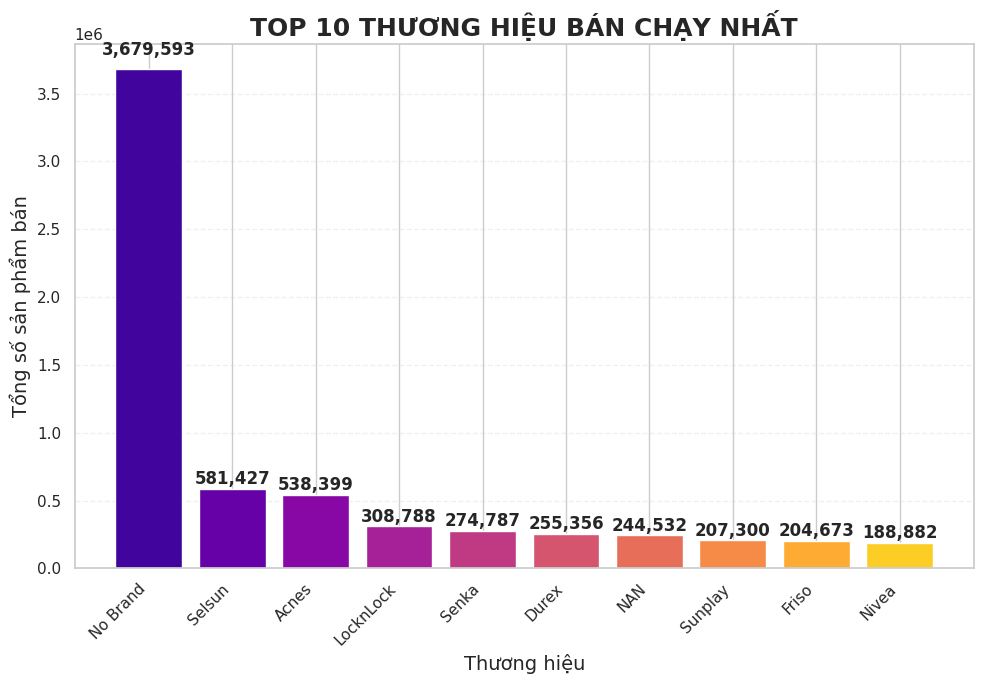

In [ ]:
brand_popularity = df_cleaned.groupby('brand_name')['quantity_sold'].sum()
brand_popularity = brand_popularity.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 7))
bars = plt.bar(
    brand_popularity.index,
    brand_popularity.values,
    color=plt.cm.plasma(np.linspace(0.1, 0.9, len(brand_popularity)))
)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + height*0.02,
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.title('TOP 10 THƯƠNG HIỆU BÁN CHẠY NHẤT', fontsize=18, fontweight='bold')
plt.xlabel('Thương hiệu', fontsize=14)
plt.ylabel('Tổng số sản phẩm bán', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

📊 Phân Tích Dữ Liệu Thị Trường: Sự Phân Hóa và Ưu Thế Thương Hiệu

Dữ liệu thị trường cho thấy một bức tranh **phân hóa rõ rệt** về số lượng sản phẩm bán ra giữa các thương hiệu:

* **Selsun** và **Acnes** đang thể hiện vai trò **dẫn đầu**, ghi nhận số lượng sản phẩm bán ra **vượt trội** so với phần còn lại của thị trường. Sự tập trung này cho thấy sức mạnh thương hiệu và sự ưa chuộng của người tiêu dùng đối với các sản phẩm của họ.

* Đáng chú ý, một **phần lớn** sản phẩm **không xác định thương hiệu cụ thể** cũng chiếm một thị phần **ưu thế**. Điều này gợi mở về một thị trường sôi động với nhiều sản phẩm **đa dạng** và có thể là các sản phẩm từ các nhà cung cấp nhỏ lẻ hoặc các sản phẩm generic đang được người tiêu dùng đón nhận.

Phân tích sâu hơn về các thương hiệu dẫn đầu cho thấy sự tập trung chủ yếu trong lĩnh vực **làm đẹp và chăm sóc cá nhân**:

* **Acnes, Senka, Sunplay, Nivea** đều là những tên tuổi quen thuộc trong ngành **làm đẹp**, cho thấy đây là một lĩnh vực có sự cạnh tranh mạnh mẽ và các thương hiệu uy tín đang có chỗ đứng vững chắc.

Bên cạnh đó, sự xuất hiện của các thương hiệu lớn từ các ngành hàng khác cũng rất đáng chú ý:

* **LocknLock**, một thương hiệu nổi tiếng về **đồ gia dụng**, cho thấy sự đa dạng trong các ngành hàng có sản phẩm bán chạy.
* **Friso**, một thương hiệu mạnh trong lĩnh vực **dinh dưỡng**, đặc biệt là các sản phẩm cho trẻ em, cho thấy tầm quan trọng của các sản phẩm thiết yếu.
* **Durex**, một thương hiệu **nổi bật** trong lĩnh vực **sản phẩm an toàn tình dục**, cho thấy thị trường cũng quan tâm đến các sản phẩm chăm sóc sức khỏe đặc thù.


### Các thương hiệu có giá đắt nhất nhưng bán chạy nhất

In [ ]:
# Tính toán các chỉ số cho mỗi thương hiệu
brand_metrics = df_cleaned.groupby('brand_name').agg({
    'price': 'mean',
    'quantity_sold': 'sum',
    'id': 'count'  # số lượng sản phẩm
}).reset_index()

# Lọc các thương hiệu có ít nhất 5 sản phẩm (độ tin cậy sẽ cao hơn)
brand_metrics = brand_metrics[brand_metrics['id'] >= 5]

# Chuẩn hóa giá và số lượng bán để tính điểm kết hợp
brand_metrics['price_norm'] = (brand_metrics['price'] - brand_metrics['price'].min()) / (brand_metrics['price'].max() - brand_metrics['price'].min())
brand_metrics['sales_norm'] = (brand_metrics['quantity_sold'] - brand_metrics['quantity_sold'].min()) / (brand_metrics['quantity_sold'].max() - brand_metrics['quantity_sold'].min())
brand_metrics['combined_score'] = 0.5 * brand_metrics['price_norm'] + 0.5 * brand_metrics['sales_norm']
top_brands = brand_metrics.sort_values('combined_score', ascending=False)

print(top_brands)

          brand_name       price  quantity_sold   id  price_norm  sales_norm  \
999         No Brand   722952.86        3679593  911        0.02        1.00   
599            Honda 38358833.33           1430   18        1.00        0.00   
96             Apple 14732380.95          30247   21        0.38        0.01   
1285            Sony 13546400.00          11002   15        0.35        0.00   
272           DAIKIN 10042714.29             44    7        0.26        0.00   
...              ...         ...            ...  ...         ...         ...   
54            ASSTAR    44666.67            322    6        0.00        0.00   
534   HALONG CANFOCO    42555.56             62    9        0.00        0.00   
516        Greenhome     6386.00           3284    5        0.00        0.00   
1622         jones'.    19860.00            998    5        0.00        0.00   
153           Bilaha    28085.71            104   21        0.00        0.00   

      combined_score  
999             

📊 Phân Tích Các Thương Hiệu Theo Combined Score

**Các Thương Hiệu Nổi Bật Nhất:**

* Honda: Giá cao nhất, số lượng bán thấp → Thương hiệu cao cấp, nhắm đến phân khúc khách hàng thu nhập cao, không đại trà.
* Apple: Cân bằng tốt giữa giá và số lượng bán → Thương hiệu có giá cao, bán khá tốt (~30K sp) → thương hiệu toàn cầu, phổ biến với khách hàng trung lưu–cao cấp.

**Các Thương Hiệu Kém Nổi Bật:** Các thương hiệu có giá rất cạnh tranh nhưng số lượng bán rất thấp (combined\_score ≈ 0):

* Bilaha
* Greenhome
* HALONG CANFOCO

**Nguyên nhân tiềm ẩn khiến các thương hiệu kém nổi bật:**

**Thị trường ngách hoặc định vị không rõ ràng:**<br>
    📦 Sản phẩm thuộc nhóm hàng kén người mua, (thuốc thú y, đồ hộp đặc sản, phụ kiện chuyên dụng) <br>
    🎯 Không thuộc danh mục sản phẩm mà khách hàng thường xuyên tìm kiếm.<br>

**Vấn đề niềm tin và nhận diện thương hiệu:**<br>
    🛒 Người tiêu dùng có xu hướng ưu tiên các thương hiệu quen thuộc như Apple, Sony.<br>
    🚫 Các thương hiệu ít nổi bật chưa xây dựng được lòng tin và nhận diện mạnh mẽ → ít được lựa chọn.

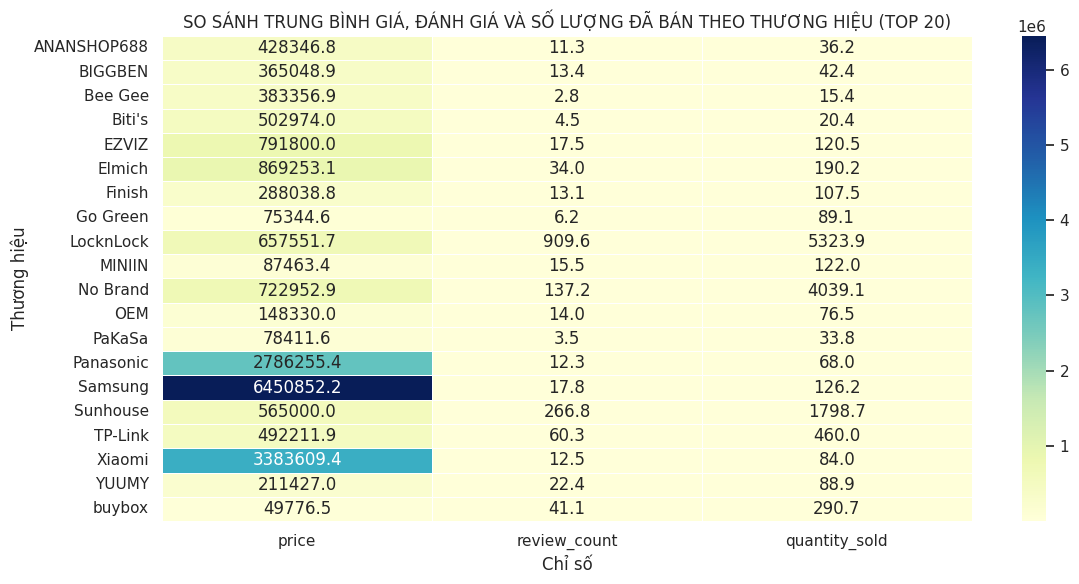

In [ ]:
brand_summary = df_cleaned.groupby('brand_name')[['price', 'review_count', 'quantity_sold']].mean().round(2)

top_20_brands = df_cleaned['brand_name'].value_counts().nlargest(20).index
brand_summary_top = brand_summary.loc[brand_summary.index.isin(top_20_brands)]

plt.figure(figsize=(12, 6))
sns.heatmap(brand_summary_top.sort_index(), annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title("SO SÁNH TRUNG BÌNH GIÁ, ĐÁNH GIÁ VÀ SỐ LƯỢNG ĐÃ BÁN THEO THƯƠNG HIỆU (TOP 20)")
plt.xlabel("Chỉ số")
plt.ylabel("Thương hiệu")
plt.tight_layout()
plt.show()

 Phân tích trung bình Giá – Đánh giá – Số lượng bán theo Thương hiệu (Top 20) - Biểu đồ heatmap cho thấy sự khác biệt rõ rệt giữa các thương hiệu ở 3 khía cạnh:

💰 Giá bán trung bình (price) Các thương hiệu như Panasonic, Samsung, và Xiaomi có mức giá trung bình rất cao → thuộc phân khúc cao cấp.

Trong khi đó, các thương hiệu như buybox, PaKaSa, MINIIN có mức giá trung bình thấp hơn đáng kể → nhắm vào phân khúc bình dân.

⭐ Đánh giá trung bình (review_count) LocknLock nổi bật với số lượng đánh giá cực lớn (909.6), cho thấy mức độ phổ biến và tương tác cao với khách hàng.

Các thương hiệu như Bee Gee, Biti's, và PaKaSa lại có lượng đánh giá khá thấp → cần kiểm tra chất lượng hoặc mức độ hiện diện thị trường.

📦 Số lượng bán trung bình (quantity_sold) LocknLock và No Brand dẫn đầu về số lượng bán trung bình → chứng tỏ sức tiêu thụ mạnh.

Sunhouse, TP-Link, và Samsung cũng có lượng bán cao trong khi vẫn giữ mức giá khá cao, cho thấy sức hút thương hiệu tốt.




### Doanh thu theo thương hiệu

In [ ]:
brand_sales = df_cleaned.groupby('brand_name').agg(
    total_quantity_sold=('quantity_sold', 'sum'),
    total_revenue=('revenue', 'sum'),
    avg_price=('price', 'mean'),
    product_count=('id', 'count')
).reset_index().sort_values(by='total_revenue', ascending=False)

brand_sales.head(10)

brand_name  total_quantity_sold  total_revenue   avg_price  product_count
999    No Brand              3679593  1006771999785   722952.86            911
96        Apple                30247   240857150000 14732380.95             21
800   LocknLock               308788   223129345000   657551.72             58
754          LG                17738   142261022000  8059342.86             35
943         NAN               244532   133876349000  1311033.33             30
1025       OPPO                34989   124803364000  4442260.87             23
455       Friso               204673   108112843000  1112000.00             17
1239    Samsung                14508    77357154000  6450852.17            115
834        MILO               179515    66692911400   303471.43              7
393      Ensure                75559    59764340000  1130000.00             10

<ipython-input-268-2861021bb72f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_brands, x='brand_name', y='total_revenue', palette='coolwarm')


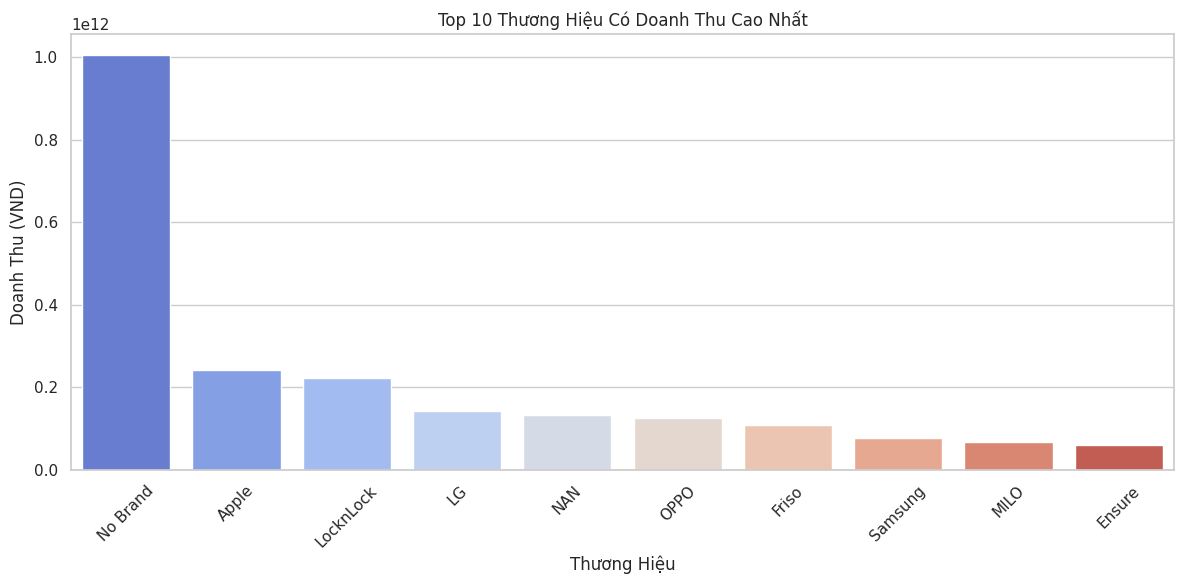

In [ ]:
# Biểu đồ: Top 10 thương hiệu theo doanh thu
top_10_brands = brand_sales.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_brands, x='brand_name', y='total_revenue', palette='coolwarm')
plt.title("Top 10 Thương Hiệu Có Doanh Thu Cao Nhất")
plt.xlabel("Thương Hiệu")
plt.ylabel("Doanh Thu (VND)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📊 **Phân tích tổng quan:**
1. **Thương hiệu "No Brand" dẫn đầu về doanh thu:**
   - Thương hiệu **"No Brand"** đạt **1.006 tỷ VND**, chiếm ưu thế tuyệt đối so với các thương hiệu khác.
   - Đây là nhóm sản phẩm không có nhãn hiệu hoặc thuộc các sản phẩm nội bộ của Tiki, cho thấy sức mạnh của mô hình kinh doanh tự chủ và giá cả cạnh tranh.

2. **Apple đứng thứ hai về doanh thu:**
   - Thương hiệu **Apple** đạt doanh thu khoảng **240 tỷ VND**, phản ánh sức hút và giá trị cao của các sản phẩm công nghệ.
   - Mặc dù Apple chỉ đứng thứ hai, nhưng mức doanh thu này vẫn rất ấn tượng, đặc biệt khi xét đến giá trung bình cao của các sản phẩm Apple.

3. **Các thương hiệu còn lại có doanh thu thấp hơn đáng kể:**
   - Các thương hiệu như **LocknLock, LG, NAN, OPPO, Friso, Samsung, MILO, Ensure** có doanh thu thấp hơn nhiều so với "No Brand" và Apple.
   - Trong đó, thương hiệu **Ensure** có doanh thu thấp nhất trong top 10, chỉ đạt khoảng **59.7 tỷ VND**.

---

📈 **Nhận xét về xu hướng:**
1. **Sự chênh lệch lớn giữa các thương hiệu:**
   - Có sự chênh lệch rõ rệt về doanh thu giữa thương hiệu dẫn đầu ("No Brand") và các thương hiệu khác.
   - Điều này cho thấy thị trường có sự tập trung cao độ vào một số thương hiệu chủ lực, đặc biệt là nhóm sản phẩm không nhãn hiệu ("No Brand").

2. **Doanh thu trung bình của các thương hiệu khác:**
   - Các thương hiệu từ thứ ba trở xuống (LocknLock, LG, NAN, OPPO, Friso, Samsung, MILO, Ensure) có doanh thu dao động trong khoảng **66 tỷ VND đến 223 tỷ VND**.
   - Sự chênh lệch này có thể liên quan đến:
     - Mức giá trung bình của sản phẩm.
     - Số lượng sản phẩm được bán ra.
     - Độ phổ biến và nhận diện thương hiệu.

3. **Mức giá trung bình của các thương hiệu:**
   - Thương hiệu **Apple** có mức giá trung bình cao nhất (**14.07 tỷ VND/sản phẩm**), phản ánh giá trị cao của các sản phẩm công nghệ.
   - Thương hiệu **"No Brand"** cũng có mức giá trung bình khá cao (**375 triệu VND/sản phẩm**), mặc dù doanh thu tổng thể rất lớn.
   - Các thương hiệu như **MILO** và **Ensure** có mức giá trung bình thấp hơn (**303 triệu VND/sản phẩm và 1.13 tỷ VND/sản phẩm**).

---

💡 **Điểm nhấn đáng chú ý:**
1. **Thương hiệu "No Brand":**
   - Thương hiệu "No Brand" có doanh thu vượt trội so với các thương hiệu khác, đạt gần **1.007 tỷ VND**.
   - Điều này có thể lý giải bởi:
     - Sản phẩm không nhãn hiệu thường có giá thành rẻ hơn, phù hợp với người tiêu dùng tìm kiếm giá cả phải chăng.
     - Số lượng sản phẩm thuộc "No Brand" rất lớn (680 sản phẩm), giúp tăng doanh thu tổng thể.
     - Tiki có thể đang tận dụng mô hình kinh doanh tự chủ để tối ưu hóa lợi nhuận và đáp ứng nhu cầu đa dạng của khách hàng.

2. **Thương hiệu Apple:**
   - Mặc dù chỉ đứng thứ hai, Apple vẫn là thương hiệu nổi bật với doanh thu **240 tỷ VND**.
   - Điều này phản ánh sức hút và giá trị cao của các sản phẩm Apple, đặc biệt là các thiết bị điện tử và công nghệ.

3. **Thương hiệu LocknLock và LG:**
   - Hai thương hiệu này đều nằm trong top 5 về doanh thu, cho thấy sự phổ biến của các sản phẩm gia dụng và điện tử.
   - LocknLock (thuộc ngành hàng gia dụng) và LG (thuộc ngành hàng điện tử) đều có mức giá trung bình cao, góp phần tạo nên doanh thu tốt.

4. **Thương hiệu Ensure và MILO:**
   - Hai thương hiệu này có doanh thu thấp nhất trong top 10, nhưng mức giá trung bình của chúng khá cao.
   - Điều này cho thấy các sản phẩm của Ensure và MILO có giá trị cao, nhưng lượng bán ra ít hơn so với các thương hiệu khác.

---

🌟 **Kết luận và gợi ý hành động:**
1. **Tập trung vào thương hiệu "No Brand":**
   - "No Brand" đóng góp phần lớn vào doanh thu. Tiki có thể tiếp tục phát triển và mở rộng danh mục sản phẩm không nhãn hiệu để tận dụng tiềm năng này.
   - Nghiên cứu thêm về nhu cầu của khách hàng để đưa ra các sản phẩm "No Brand" phù hợp và hấp dẫn hơn.

2. **Khuyến khích thương hiệu Apple và các thương hiệu công nghệ:**
   - Apple và các thương hiệu công nghệ khác mang lại doanh thu cao nhờ giá trị sản phẩm. Tiki có thể đẩy mạnh chiến lược hợp tác với các nhà cung cấp công nghệ để đa dạng hóa danh mục sản phẩm và đảm bảo nguồn cung ổn định.

3. **Xem xét chiến lược marketing cho các thương hiệu nhỏ:**
   - Các thương hiệu như Ensure và MILO có mức giá trung bình cao nhưng doanh thu thấp. Tiki có thể thực hiện các chương trình khuyến mãi hoặc marketing riêng biệt để thúc đẩy doanh số của các thương hiệu này.
   - Đánh giá xem liệu các sản phẩm của Ensure và MILO có cần cải thiện về tính năng hoặc bao bì để thu hút khách hàng hơn.

4. **Phân tích sâu hơn về nguyên nhân chênh lệch doanh thu:**
   - Cần xem xét thêm yếu tố như số lượng sản phẩm, giá bán, và chiến lược marketing của từng thương hiệu để hiểu rõ hơn về sự chênh lệch doanh thu.
   - Đặc biệt, cần đánh giá kỹ lưỡng về hiệu quả của các chương trình khuyến mãi và quảng cáo dành cho các thương hiệu có doanh thu thấp.


### Đánh giá trung bình theo thương hiệu

In [ ]:
avg_rating_by_brand = brand_comment_df.groupby('brand_name')['rating'].mean().reset_index()
avg_rating_by_brand.columns = ['brand_name', 'avg_rating']
avg_rating_by_brand.sort_values(by='avg_rating', ascending=False)

brand_name  avg_rating
320               Đất Cà Phê        5.00
301                  YUPPIES        5.00
289                  VinFast        5.00
300                   YESURE        5.00
295                  Wannabe        5.00
..                       ...         ...
148                 Kingkong        2.80
90              Fresh Friend        2.80
110  HENRYSA Bạn của mọi nhà        2.00
13             ARCTIC HUNTER        1.00
294                   WOSAWE        1.00

[321 rows x 2 columns]

<ipython-input-270-64825b9a22f9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=top_ratings, x='avg_rating', y='brand_name', palette='Blues_d', orient='h', ax=ax)


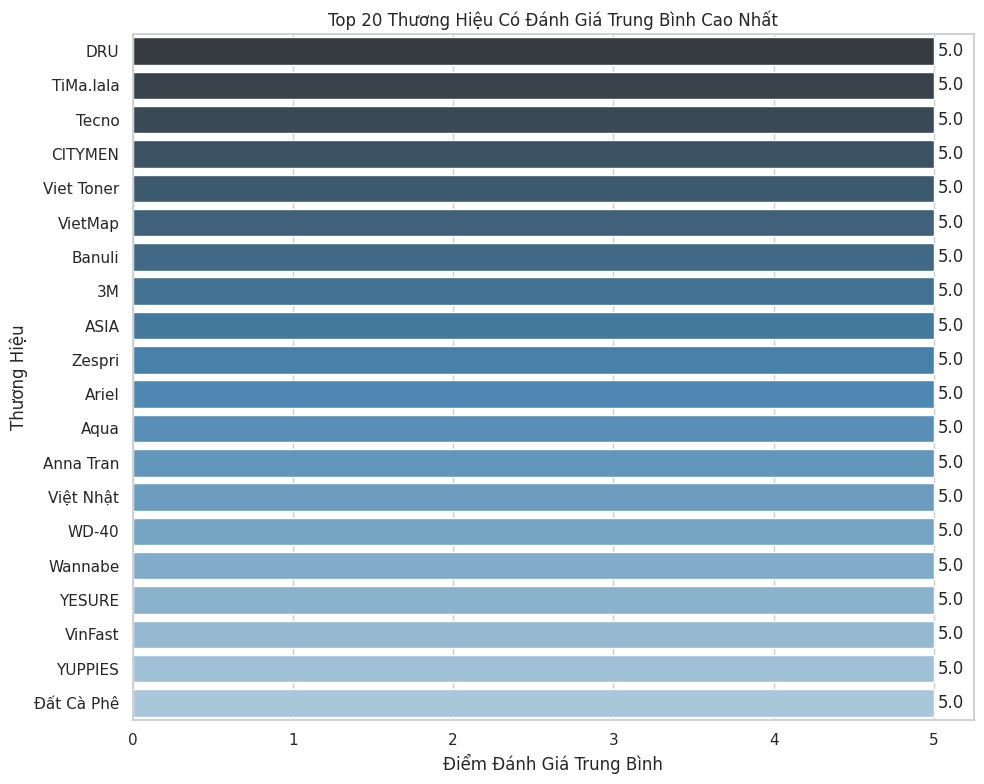

<ipython-input-270-64825b9a22f9>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=bottom_ratings, x='avg_rating', y='brand_name', palette='Reds_d', orient='h', ax=ax)


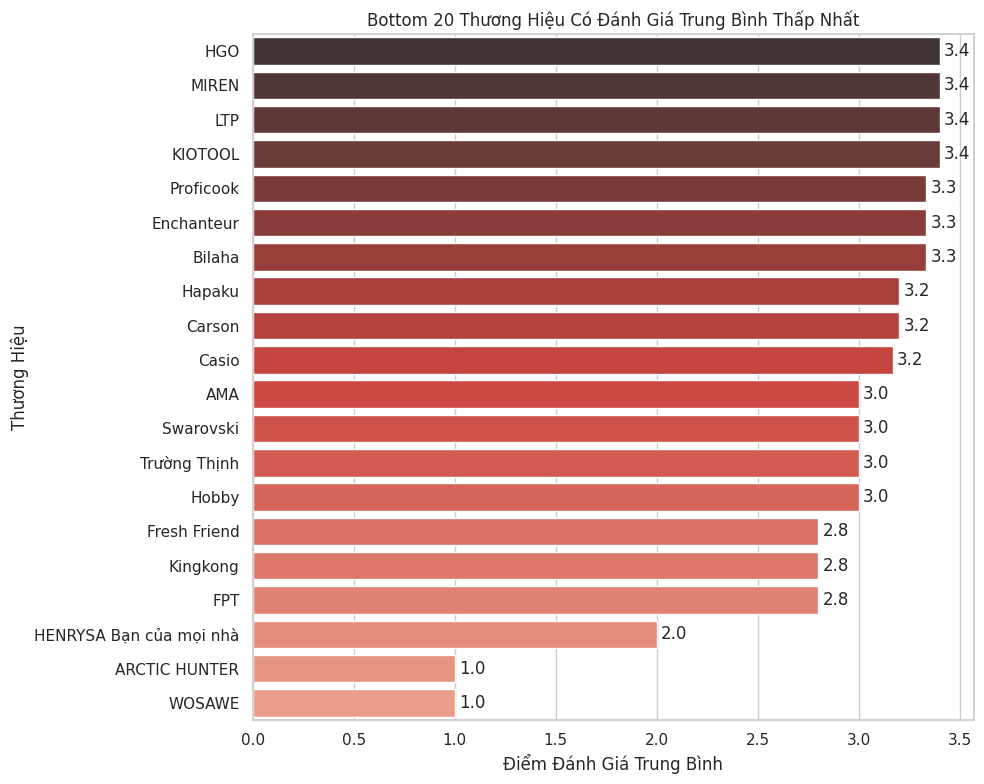

In [ ]:
# Top 20 thương hiệu có điểm đánh giá cao nhất
top_ratings = avg_rating_by_brand.sort_values(by='avg_rating', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10, 8))
bars = sns.barplot(data=top_ratings, x='avg_rating', y='brand_name', palette='Blues_d', orient='h', ax=ax)

# Hiển thị giá trị trên từng cột
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', padding=3)

# Lật trục Y để thương hiệu cao nhất ở trên
ax.invert_yaxis()

plt.title("Top 20 Thương Hiệu Có Đánh Giá Trung Bình Cao Nhất")
plt.xlabel("Điểm Đánh Giá Trung Bình")
plt.ylabel("Thương Hiệu")
plt.tight_layout()
plt.show()

# Bottom 20 thương hiệu có điểm đánh giá thấp nhất
bottom_ratings = avg_rating_by_brand.sort_values(by='avg_rating', ascending=True).head(20)

fig, ax = plt.subplots(figsize=(10, 8))
bars = sns.barplot(data=bottom_ratings, x='avg_rating', y='brand_name', palette='Reds_d', orient='h', ax=ax)

# Hiển thị giá trị trên từng cột
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', padding=3)

# Lật trục Y để thương hiệu thấp nhất ở dưới
ax.invert_yaxis()

plt.title("Bottom 20 Thương Hiệu Có Đánh Giá Trung Bình Thấp Nhất")
plt.xlabel("Điểm Đánh Giá Trung Bình")
plt.ylabel("Thương Hiệu")
plt.tight_layout()
plt.show()

📊 **Phân tích tổng quan:**

1. **Thương hiệu có điểm đánh giá trung bình cao nhất (5.0):**
   - Các thương hiệu như **GDV, Unitek, VAC, Dược Liệu Tuệ Tâm, UGREEN, Top Step, GOKING, Aqua, Anna Tran, DRU, Banuli, CITYMEN, VietMap, VinFast, Ariel, Wannabe, WD-40, Việt Nhật, YESURE, YUPPIES** đều đạt **điểm đánh giá trung bình 5.0**.
   - Điều này cho thấy những thương hiệu này nhận được sự hài lòng tuyệt đối từ khách hàng, với tất cả các đánh giá đều ở mức tối đa.

2. **Thương hiệu có điểm đánh giá trung bình thấp nhất (1.0):**
   - Các thương hiệu **ARCTIC HUNTER và WOSAWE** chỉ đạt **điểm đánh giá trung bình 1.0**, phản ánh trải nghiệm không tốt của khách hàng với sản phẩm hoặc dịch vụ của họ.
   - Ngoài ra, thương hiệu **HENRYSA Bạn của mọi nhà** cũng có điểm đánh giá rất thấp (**2.0**), cho thấy sự không hài lòng đáng kể.

3. **Khoảng cách giữa top và bottom:**
   - Khoảng cách giữa top 20 thương hiệu có đánh giá cao nhất và bottom 20 thương hiệu có đánh giá thấp nhất khá lớn:
     - Top: Tất cả đều đạt **5.0**.
     - Bottom: Điểm thấp nhất là **1.0**, và phần lớn thương hiệu trong bottom 20 có điểm đánh giá trung bình từ **2.8 đến 3.4**.
   - Điều này cho thấy sự chênh lệch rõ rệt trong chất lượng sản phẩm/dịch vụ giữa các thương hiệu.

---

💡 **Nhận xét chi tiết:**

**1. Thương hiệu có đánh giá cao nhất (5.0):**
   - **GDV, Unitek, VAC, Dược Liệu Tuệ Tâm, UGREEN, Top Step, GOKING, Aqua, Anna Tran, DRU, Banuli, CITYMEN, VietMap, VinFast, Ariel, Wannabe, WD-40, Việt Nhật, YESURE, YUPPIES**:
     - Đây là những thương hiệu được khách hàng đánh giá rất cao, với tất cả các đánh giá đều đạt mức tối đa (5 sao).
     - Sự xuất hiện của các thương hiệu nổi tiếng như **VinFast, Ariel, WD-40** trong danh sách này cho thấy tầm ảnh hưởng và chất lượng sản phẩm/dịch vụ vượt trội.
     - Tuy nhiên, cần lưu ý rằng việc tất cả các thương hiệu đều đạt **5.0** có thể do số lượng đánh giá còn ít hoặc chỉ có những người dùng hài lòng mới để lại đánh giá. Cần kiểm tra thêm số lượng đánh giá để đảm bảo tính đại diện.

**2. Thương hiệu có đánh giá thấp nhất (1.0):**
   - **ARCTIC HUNTER và WOSAWE**:
     - Hai thương hiệu này nhận được đánh giá cực kỳ thấp (**1.0**), cho thấy trải nghiệm của khách hàng với sản phẩm/dịch vụ của họ rất tệ.
     - Cần xem xét kỹ lưỡng nguyên nhân dẫn đến tình trạng này, chẳng hạn như chất lượng sản phẩm kém, dịch vụ sau bán hàng không tốt, hoặc thiếu thông tin minh bạch.
   - **HENRYSA Bạn của mọi nhà**:
     - Thương hiệu này có điểm đánh giá trung bình **2.0**, thấp hơn nhiều so với mặt bằng chung. Điều này cho thấy khách hàng không hài lòng với sản phẩm hoặc dịch vụ mà thương hiệu cung cấp.

**3. Thương hiệu nằm giữa (3.0–3.4):**
   - Các thương hiệu như **HGO, MIREN, LTP, KIOTOOL, Proficook, Enchanteur, Bilaha, Hapaku, Carson, Casio, AMA, Swarovski, Trường Thịnh, Hobby, Fresh Friend, Kingkong, FPT**:
     - Điểm đánh giá trung bình của các thương hiệu này dao động từ **3.0 đến 3.4**, cho thấy trải nghiệm của khách hàng vừa phải, không quá hài lòng nhưng cũng chưa thực sự thất vọng.
     - Đây có thể là nhóm thương hiệu cần cải thiện để tăng cường sự hài lòng của khách hàng, chẳng hạn bằng cách nâng cao chất lượng sản phẩm hoặc cải thiện dịch vụ khách hàng.

---

🌟 **Kết luận và gợi ý hành động:**

1. **Tập trung vào thương hiệu có đánh giá cao nhất:**
   - Các thương hiệu đạt **5.0** như GDV, Unitek, VAC, Dược Liệu Tuệ Tâm, UGREEN, v.v., đang làm rất tốt. Tiki có thể:
     - Tiếp tục hỗ trợ và thúc đẩy các thương hiệu này để duy trì vị thế.
     - Học hỏi kinh nghiệm từ họ để áp dụng cho các thương hiệu khác.

2. **Xử lý vấn đề của thương hiệu có đánh giá thấp nhất:**
   - Đối với các thương hiệu như **ARCTIC HUNTER, WOSAWE, và HENRYSA Bạn của mọi nhà**:
     - Cần điều tra sâu hơn về nguyên nhân dẫn đến điểm đánh giá thấp (chất lượng sản phẩm, dịch vụ khách hàng, giao hàng, v.v.).
     - Thực hiện các biện pháp cải thiện ngay lập tức, chẳng hạn như:
       - Nâng cao chất lượng sản phẩm.
       - Cải thiện dịch vụ chăm sóc khách hàng.
       - Tăng cường tương tác với khách hàng để giải quyết các vấn đề kịp thời.

3. **Cải thiện thương hiệu có đánh giá trung bình:**
   - Các thương hiệu có điểm đánh giá từ **3.0 đến 3.4** (HGO, MIREN, LTP, KIOTOOL, v.v.) cần được chú trọng để nâng cao trải nghiệm khách hàng:
     - Thu thập phản hồi từ khách hàng để hiểu rõ hơn về nhu cầu và kỳ vọng.
     - Áp dụng các chiến lược marketing phù hợp để xây dựng niềm tin và cải thiện hình ảnh thương hiệu.

4. **Kiểm tra số lượng đánh giá:**
   - Một số thương hiệu đạt **5.0** có thể do số lượng đánh giá còn ít. Cần kiểm tra số lượng đánh giá để đảm bảo tính đại diện và tránh trường hợp đánh giá bị thiên lệch.

### Tỷ lệ sản phẩm có giảm giá theo thương hiệu

In [ ]:
discount_ratio = df_cleaned.groupby('brand_name').agg(
    total_products=('id', 'count'),
    discounted_products=('has_discount', 'sum')
)
discount_ratio['discount_rate'] = discount_ratio['discounted_products'] / discount_ratio['total_products']
discount_ratio = discount_ratio.reset_index()
discount_ratio.sort_values(by='discount_rate', ascending=False)

brand_name  total_products  discounted_products  discount_rate
1665     Đệ Nhất Yến Đảo               1                    1           1.00
1647               xMOWI               1                    1           1.00
1645           win'sNest               1                    1           1.00
32            AIN Closet               1                    1           1.00
26                 ADINO              12                   12           1.00
...                  ...             ...                  ...            ...
938   Mật Ong Phúc Khang               1                    0           0.00
937                   MĐ               1                    0           0.00
488             Garco 10               1                    0           0.00
487               Gambol               3                    0           0.00
214               Calbee               1                    0           0.00

[1668 rows x 4 columns]

🟢 **Top các thương hiệu có tỷ lệ giảm giá cao nhất (100%)**
- Một số thương hiệu như **iCybernet, zll, 3lành, 365, Remax,...** đều có **tỷ lệ giảm giá 100%**.
- Điều này cho thấy các thương hiệu này đang:
  - **Chủ động thu hút người mua bằng khuyến mãi**.
  - Có thể là những thương hiệu mới hoặc ít tên tuổi, cần tạo sự chú ý trên nền tảng Tiki.

> 💡 Lưu ý: Một số thương hiệu có **số lượng sản phẩm rất ít** (chỉ 1–2 sản phẩm), nên tỷ lệ 100% chưa phản ánh đầy đủ chính sách khuyến mãi thực tế nếu mở rộng quy mô.

---

🔴 **Thương hiệu không có sản phẩm nào được giảm giá (discount_rate = 0%)**
- Các thương hiệu như **Mật Ong Phúc Khang, MĐ, Mylan, Fivestar, FLOVEME...** có **tỷ lệ giảm giá 0%**.
- Điều này cho thấy:
  - Sản phẩm của họ có thể thuộc phân khúc **cao cấp**, không muốn hạ giá để giữ hình ảnh thương hiệu.
  - Hoặc đây là những thương hiệu **ít cạnh tranh về giá**, chủ yếu dựa vào chất lượng, độ uy tín hoặc độc quyền.
  - Cũng có thể là do chính sách bán hàng của nhà cung cấp không cho phép giảm giá.

---

⚖️ **Sự chênh lệch giữa các thương hiệu**
- Có sự **phân hóa rõ rệt** giữa các thương hiệu:
  - Nhóm **tận dụng mạnh khuyến mãi** để thu hút khách hàng.
  - Nhóm **không áp dụng giảm giá**, có thể do định vị thị trường hoặc chiến lược khác.

---

🧠 **Gợi ý chiến lược tiếp thị & kinh doanh:**

1. **Đối với nhóm có tỷ lệ giảm giá cao (100%)**:
   - Nên duy trì hoặc tăng cường quảng bá để tận dụng lợi thế khuyến mãi.
   - Cần theo dõi doanh thu và lợi nhuận để đảm bảo **khuyến mãi không làm ăn mòn lợi nhuận**.
   - Nên đa dạng hóa sản phẩm để không phụ thuộc quá nhiều vào khuyến mãi.

2. **Đối với nhóm không có giảm giá (0%)**:
   - Xem xét việc **thử nghiệm một vài chương trình giảm giá ngắn hạn** để kiểm tra phản ứng thị trường.
   - Tập trung vào **marketing truyền thông điệp về chất lượng, độ bền, sự khác biệt** để bù đắp cho việc không có khuyến mãi.
   - Nếu là sản phẩm cao cấp, có thể **ưu tiên trải nghiệm khách hàng thay vì giảm giá**.

## 4.4. Mối liên hệ giữa đánh giá của khách hàng và các yếu tố khác

### Tương quan giữa số lượng đánh giá và số lượng bán

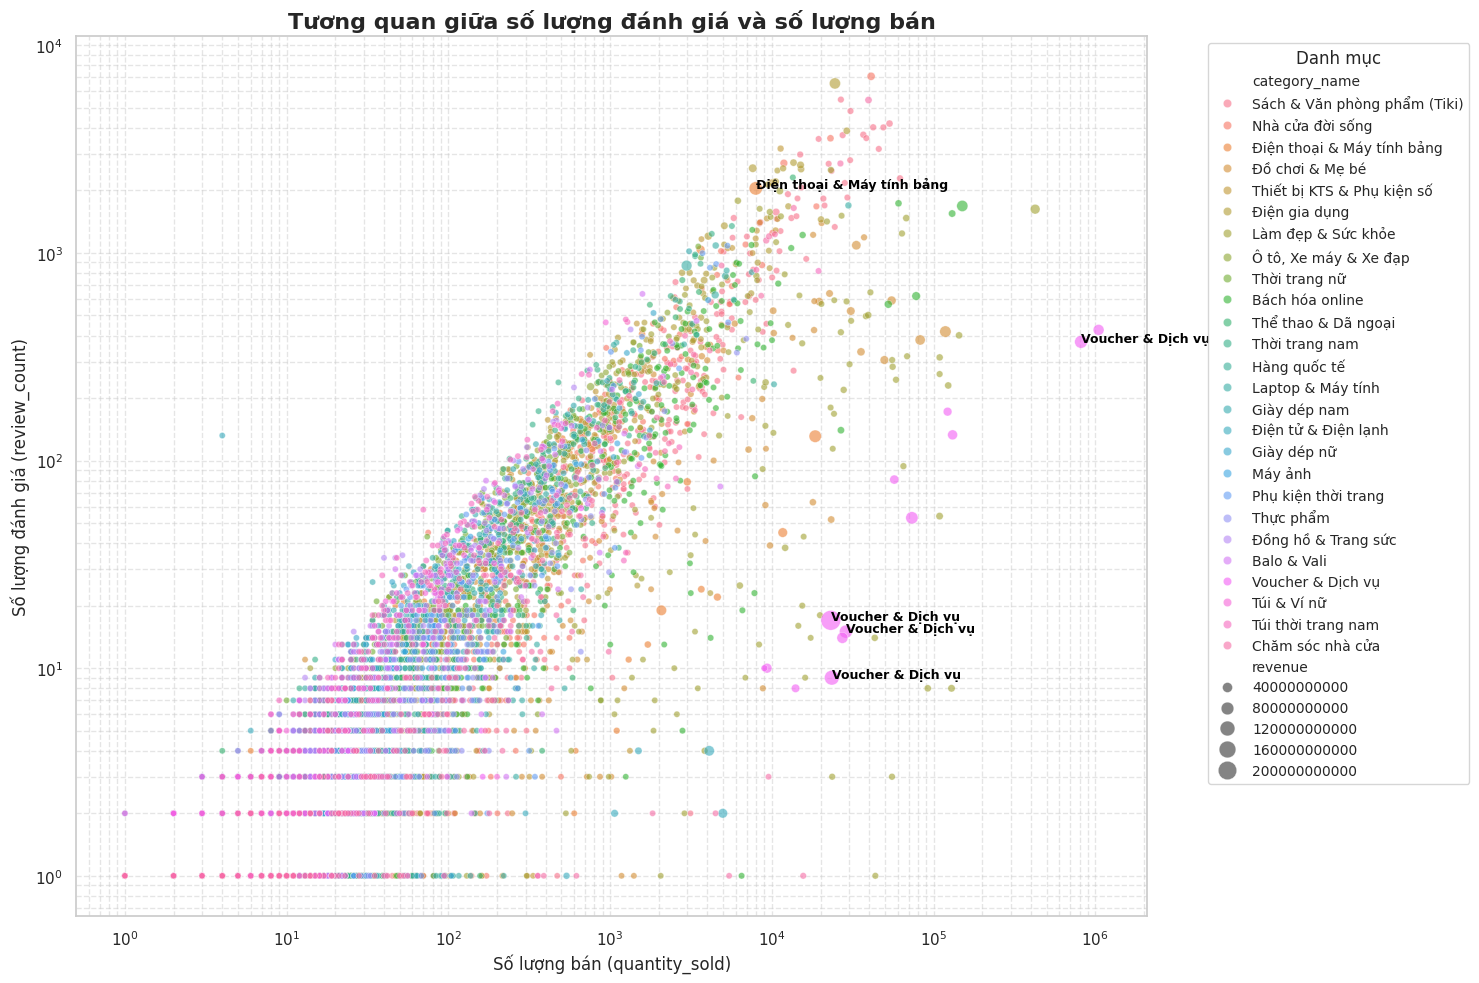

In [ ]:
# Kiểm tra và xử lý giá trị NaN/Inf
df = df_cleaned.dropna(subset=['quantity_sold', 'review_count'])
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['quantity_sold', 'review_count'])

# Lọc dữ liệu để loại bỏ giá trị bằng 0
df = df[df['quantity_sold'] > 0]
df = df[df['review_count'] > 0]

# Biểu đồ 1: Tương quan giữa số lượng đánh giá và số lượng bán (đã tối ưu)
plt.figure(figsize=(15, 10))
sns.scatterplot(x='quantity_sold', y='review_count', hue='category_name', size='revenue',
                sizes=(20, 200), alpha=0.6, data=df)

plt.xlabel('Số lượng bán (quantity_sold)', fontsize=12)
plt.ylabel('Số lượng đánh giá (review_count)', fontsize=12)
plt.title('Tương quan giữa số lượng đánh giá và số lượng bán', fontsize=16, fontweight='bold')
plt.yscale('log')
plt.xscale('log')

# Thêm nhãn cho top 5 điểm có revenue cao nhất
top_indices = df.nlargest(5, 'revenue').index
for i in top_indices:
    plt.text(df['quantity_sold'][i], df['review_count'][i],
             df['category_name'][i], fontsize=9, fontweight='bold', color='black')

plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Danh mục', fontsize=10)
plt.tight_layout()
plt.show()

1. **Mối tương quan tích cực**: Có thể thấy rõ rằng số lượng đánh giá có xu hướng tăng khi số lượng bán tăng, cho thấy một mối tương quan tích cực giữa hai yếu tố này.
2. **Phân bố dữ liệu**: Phần lớn các sản phẩm có số lượng bán và số lượng đánh giá thấp, tập trung ở góc dưới bên trái của biểu đồ. Tuy nhiên, cũng có một số sản phẩm có số lượng bán và đánh giá rất cao, nằm ở góc trên bên phải.
3. **Top 5 điểm danh mục có doanh thu cao nhất**: Các sản phẩm này được gắn nhãn trực tiếp trên biểu đồ, bao gồm:
   - **Voucher và Dịch vụ**
   - **Điện thoại và Máy tính bảng**
   
   Hai danh mục này có doanh thu cao nhất và nằm ở phần trên của biểu đồ, cho thấy chúng không chỉ bán chạy mà còn nhận được nhiều đánh giá. Và đặc biệt doanh thu cao nhất đều thuộc về danh mục Voucher và Dịch vụ (4/5), cho thấy đây là một thị trường tiềm năng, đem lại doanh thu lẫn lượt đánh giá cao.

4. **Phân bố theo danh mục**: Các danh mục sản phẩm khác nhau có thể được nhận diện qua màu sắc, giúp người xem dễ dàng nhận ra xu hướng của từng danh mục. Ví dụ, danh mục "Đồng hồ thông minh" và "Máy lọc không khí" có xu hướng nằm ở phần trên của biểu đồ, cho thấy chúng có số lượng bán và đánh giá cao hơn so với các danh mục khác.

**Kết luận:**

Biểu đồ này cung cấp một cái nhìn tổng quan về mối quan hệ giữa số lượng đánh giá và số lượng bán trên Tiki, cho thấy rằng các sản phẩm bán chạy thường nhận được nhiều đánh giá hơn. Điều này có thể hữu ích cho các nhà bán hàng khi đánh giá hiệu quả của chiến lược marketing và chất lượng sản phẩm dựa trên phản hồi từ khách hàng.

### Mối quan hệ giữa rating và số lượng đánh giá

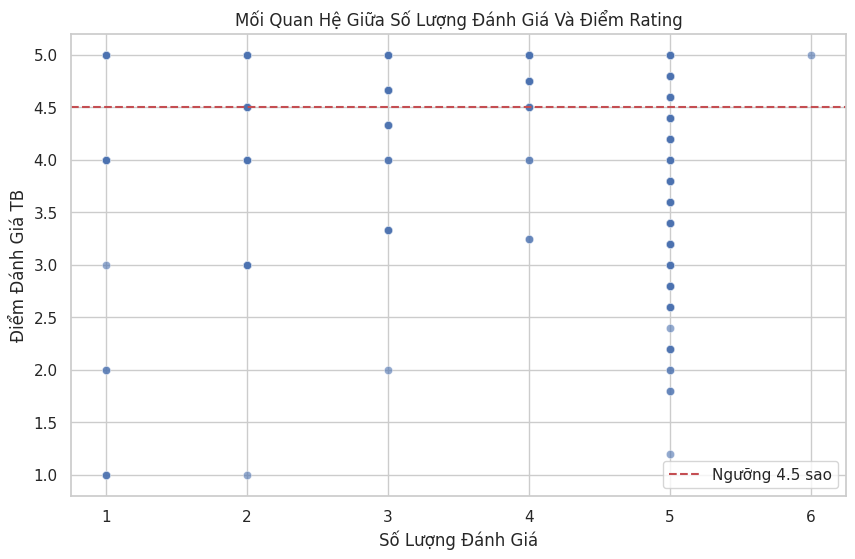

In [ ]:
# Tính số lượng đánh giá và điểm rating trung bình theo sản phẩm
product_ratings = comment_product_df.groupby('product_id').agg(
    avg_rating=('rating', 'mean'),
    review_count=('rating', 'count')
).reset_index()

# Biểu đồ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_ratings, x='review_count', y='avg_rating', alpha=0.6)
plt.title("Mối Quan Hệ Giữa Số Lượng Đánh Giá Và Điểm Rating")
plt.xlabel("Số Lượng Đánh Giá")
plt.ylabel("Điểm Đánh Giá TB")
plt.axhline(y=4.5, color='r', linestyle='--', label='Ngưỡng 4.5 sao')
plt.legend()
plt.grid(True)
plt.show()

📊 **Phân tích tổng quan:**

1. **Số lượng đánh giá và điểm rating:**
   - Biểu đồ cho thấy rằng **không có mối tương quan rõ ràng** giữa số lượng đánh giá và điểm đánh giá trung bình.
   - Một số sản phẩm có **số lượng đánh giá cao** nhưng điểm rating không nhất thiết cao hơn so với những sản phẩm có ít đánh giá hơn.

2. **Ngưỡng 4.5 sao (dotted line):**
   - Dòng ngang màu đỏ (**ngưỡng 4.5 sao**) giúp phân biệt các sản phẩm đạt hoặc vượt mức kỳ vọng của khách hàng.
   - Có thể thấy rằng:
     - Một số sản phẩm có **số lượng đánh giá thấp** nhưng vẫn đạt điểm rating cao (trên 4.5).
     - Ngược lại, một số sản phẩm có **số lượng đánh giá cao** nhưng điểm rating thấp (dưới 4.5).

3. **Điểm nổi bật trong biểu đồ:**
   - Sản phẩm có **số lượng đánh giá = 6** đạt điểm rating cao nhất (**5.0**), cho thấy sự hài lòng tuyệt đối từ khách hàng.
   - Một số sản phẩm có **số lượng đánh giá = 1** cũng đạt điểm rating cao (**5.0**), điều này có thể do chỉ có một vài người dùng để lại đánh giá tích cực.
   - Một số sản phẩm có **số lượng đánh giá = 5** nhưng điểm rating thấp (**khoảng 2.0–2.5**), phản ánh trải nghiệm không tốt của khách hàng.

---

💡 **Nhận xét chi tiết:**

1. **Không có mối tương quan tuyến tính rõ ràng:**
   - Mặc dù có xu hướng chung là các sản phẩm có **số lượng đánh giá cao** thường có điểm rating ổn định hơn, nhưng không phải tất cả đều đạt điểm cao.
   - Điều này cho thấy rằng **số lượng đánh giá không quyết định trực tiếp đến chất lượng sản phẩm hoặc trải nghiệm khách hàng**.

2. **Sản phẩm có số lượng đánh giá cao:**
   - Các sản phẩm có **số lượng đánh giá lớn** (ví dụ: 5 hoặc 6) thường có **điểm rating ổn định** (dao động từ 2.5 đến 5.0).
   - Điều này phản ánh rằng khi càng nhiều người đánh giá, điểm rating sẽ dần trở nên **chính xác và đại diện hơn** cho trải nghiệm thực tế của khách hàng.

3. **Sản phẩm có số lượng đánh giá thấp:**
   - Một số sản phẩm có **số lượng đánh giá rất thấp** (1 hoặc 2) nhưng đạt điểm rating cao (5.0).
   - Tuy nhiên, cần thận trọng khi đánh giá những sản phẩm này vì:
     - Số lượng đánh giá nhỏ có thể dẫn đến **sự thiên lệch** trong điểm rating.
     - Những đánh giá đầu tiên thường mang tính chủ quan cao, chưa phản ánh đầy đủ trải nghiệm của đa số khách hàng.

4. **Ngưỡng 4.5 sao:**
   - Dòng ngang màu đỏ (**ngưỡng 4.5 sao**) giúp dễ dàng nhận thấy:
     - Các sản phẩm đạt hoặc vượt ngưỡng 4.5 sao thường được khách hàng đánh giá cao.
     - Ngược lại, các sản phẩm dưới ngưỡng này có thể cần cải thiện chất lượng hoặc dịch vụ.

5. **Trend chung:**
   - Có xu hướng rằng các sản phẩm có **số lượng đánh giá cao** thường có điểm rating **ỔN ĐỊNH HƠN** (không bị dao động quá mạnh).
   - Điều này cho thấy rằng **số lượng đánh giá lớn** giúp giảm thiểu tác động của các đánh giá cá nhân hóa và phản ánh trải nghiệm tổng thể tốt hơn.

---

🌟 **Kết luận và gợi ý hành động:**

1. **Đối với sản phẩm có số lượng đánh giá cao:**
   - Nếu điểm rating ổn định và cao (**trên 4.5 sao**):
     - Tiếp tục duy trì chất lượng sản phẩm và dịch vụ.
     - Xây dựng chiến lược marketing để thu hút thêm khách hàng tiềm năng.
   - Nếu điểm rating thấp (**dưới 4.5 sao**):
     - Cần xem xét kỹ lưỡng nguyên nhân:
       - Chất lượng sản phẩm chưa đáp ứng kỳ vọng.
       - Dịch vụ khách hàng kém.
       - Thông tin sản phẩm không minh bạch.

2. **Đối với sản phẩm có số lượng đánh giá thấp:**
   - Cần thận trọng khi dựa vào điểm rating:
     - Số lượng đánh giá nhỏ có thể gây ra **sự thiên lệch**.
     - Cần thu thập thêm phản hồi từ khách hàng để đảm bảo đánh giá chính xác.
   - Để tăng độ tin cậy của điểm rating:
     - Khuyến khích khách hàng để lại đánh giá sau khi mua sắm.
     - Cải thiện trải nghiệm mua sắm để thu hút nhiều đánh giá hơn.

3. **Xác định ngưỡng tối thiểu để đánh giá đáng tin cậy:**
   - Có thể đặt ngưỡng **tối thiểu về số lượng đánh giá** trước khi sử dụng điểm rating để đưa ra quyết định.
   - Ví dụ: Chỉ hiển thị điểm rating cho các sản phẩm có **ít nhất 5–10 đánh giá** để đảm bảo tính đại diện.


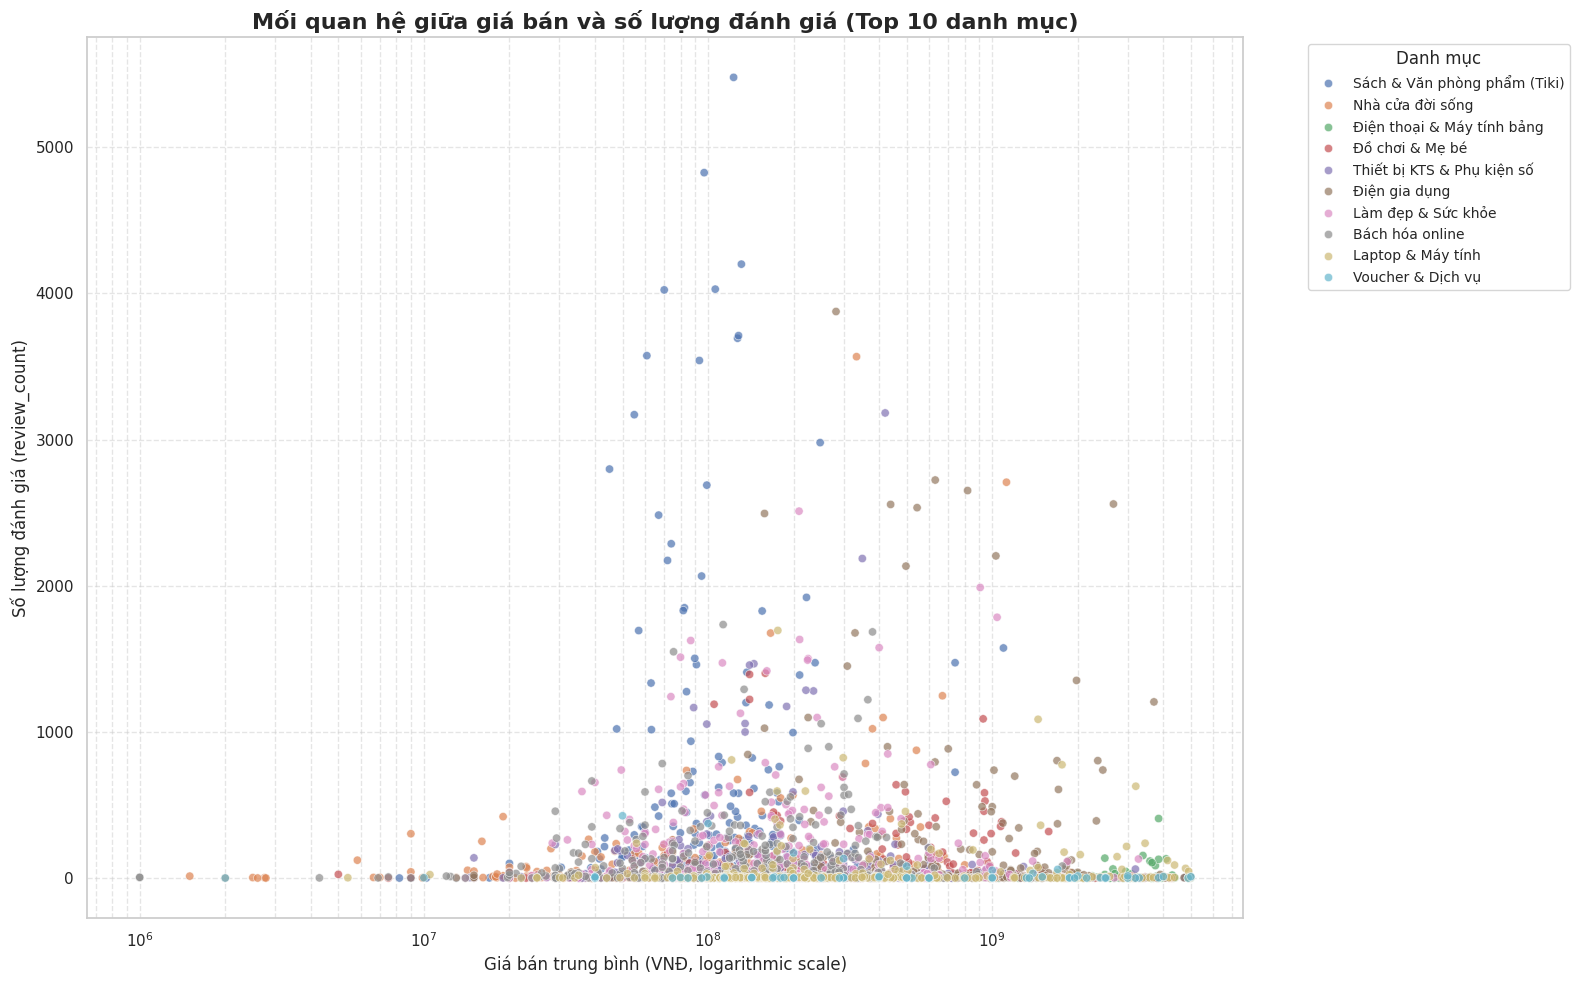

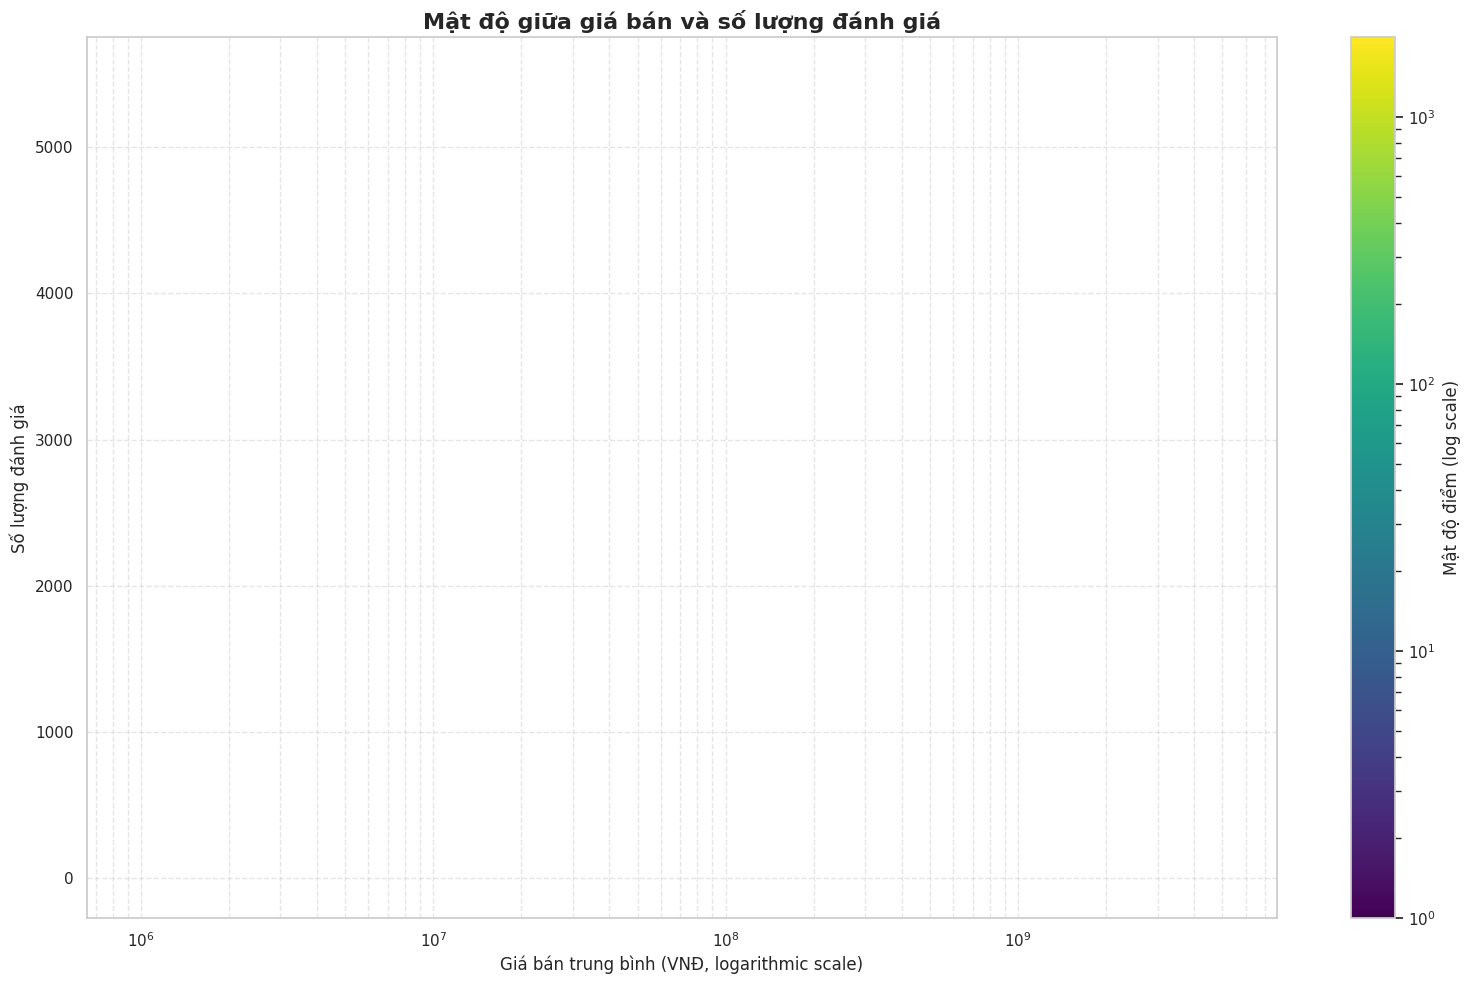

In [ ]:
# Lấy top 10 danh mục theo tổng doanh thu
top_categories = df_cleaned.groupby('category_name')['revenue'].sum().nlargest(10).index

# Lọc lại dữ liệu chỉ với top danh mục
df_top = df_cleaned[df_cleaned['category_name'].isin(top_categories)]

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='price', y='review_count', hue='category_name',
    data=df_top, alpha=0.7
)

plt.xscale('log')
plt.xlabel('Giá bán trung bình (VNĐ, logarithmic scale)', fontsize=12)
plt.ylabel('Số lượng đánh giá (review_count)', fontsize=12)
plt.title('Mối quan hệ giữa giá bán và số lượng đánh giá (Top 10 danh mục)', fontsize=16, fontweight='bold')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Danh mục', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))
plt.hexbin(df_cleaned['price'], df_cleaned['review_count'], gridsize=50, cmap='viridis', bins='log')
plt.colorbar(label='Mật độ điểm (log scale)')
plt.xscale('log')
plt.xlabel('Giá bán trung bình (VNĐ, logarithmic scale)')
plt.ylabel('Số lượng đánh giá')
plt.title('Mật độ giữa giá bán và số lượng đánh giá', fontsize=16, fontweight='bold')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()



### Giá bán và số lượng đánh giá (giả định giá trung bình)

1. **Mối quan hệ chung**
- **Giá bán và số lượng đánh giá:** Biểu đồ không cho thấy một mối tương quan rõ ràng hoặc tuyến tính giữa giá bán và số lượng đánh giá. Điều này có nghĩa là giá bán không phải là yếu tố quyết định chính ảnh hưởng đến số lượng đánh giá.
- **Điểm dữ liệu tập trung:** Hầu hết các điểm dữ liệu nằm ở phần phía trái của biểu đồ, với giá bán trung bình thấp (< 1 tỷ VNĐ) và số lượng đánh giá dao động từ 0 đến ~7.000. Điều này cho thấy đa số sản phẩm có giá bán thấp hơn thường nhận được nhiều đánh giá hơn so với những sản phẩm có giá cao.

2. **Phân tích theo danh mục**
- **Sách & Văn phòng phẩm (Tiki):** Có một số điểm dữ liệu nằm ở vùng giá thấp nhưng có số lượng đánh giá rất cao (~5.000 - 7.000). Điều này cho thấy danh mục này có xu hướng nhận được nhiều đánh giá dù giá bán không quá cao.
- **Nhà cửa & Đời sống:** Một số sản phẩm thuộc danh mục này cũng có giá bán thấp nhưng nhận được số lượng đánh giá lớn (~4.000 - 6.000).
- **Điện thoại & Máy tính bảng:** Có một số điểm dữ liệu nằm ở vùng giá cao (~1 tỷ VNĐ), nhưng số lượng đánh giá không quá cao (~2.000). Điều này cho thấy khách hàng mua sản phẩm công nghệ có thể ít để lại đánh giá hơn.
- **Hàng quốc tế:** Có một số sản phẩm có giá bán rất cao (> 6 tỷ VNĐ), nhưng số lượng đánh giá gần như bằng 0. Điều này cho thấy sản phẩm nhập khẩu đắt tiền có thể không nhận được nhiều đánh giá từ người dùng.
- **Thời trang nữ và Thời trang nam:** Các điểm dữ liệu của hai danh mục này chủ yếu nằm ở vùng giá thấp và số lượng đánh giá cũng không cao (~0 - 2.000). Điều này có thể liên quan đến đặc thù ngành thời trang, nơi khách hàng thường mua sắm lặp đi lặp lại nhưng không nhất thiết phải để lại đánh giá sau mỗi lần mua.

3. **Doanh thu và số lượng đánh giá**
Kích thước của các điểm dữ liệu (đại diện cho `revenue`) cho thấy:
- Sản phẩm có doanh thu cao không nhất thiết phải có số lượng đánh giá cao. Ví dụ: Một số sản phẩm có giá bán rất cao (ví dụ: hàng quốc tế) có doanh thu lớn nhưng số lượng đánh giá rất thấp.
- Ngược lại, một số sản phẩm có giá bán thấp nhưng có số lượng đánh giá cao, điều này cho thấy chất lượng dịch vụ hoặc trải nghiệm mua sắm tốt có thể thúc đẩy khách hàng để lại đánh giá.

=>
- **Giá bán không phải yếu tố quyết định số lượng đánh giá:** Dữ liệu cho thấy mối quan hệ giữa giá bán và số lượng đánh giá không rõ ràng. Điều này có thể do các yếu tố khác như chất lượng sản phẩm, trải nghiệm mua sắm, và khả năng tiếp cận khách hàng đóng vai trò quan trọng hơn.
- **Sản phẩm giá rẻ thường nhận được nhiều đánh giá hơn:** Hầu hết các điểm dữ liệu tập trung ở vùng giá thấp, cho thấy rằng sản phẩm giá rẻ dễ dàng thu hút sự chú ý và nhận được phản hồi từ khách hàng.
- **Sản phẩm cao cấp ít nhận được đánh giá:** Sản phẩm có giá bán cao (ví dụ: hàng quốc tế, điện thoại, máy tính bảng) thường có số lượng đánh giá thấp hơn, có thể do nhóm khách hàng mua sắm cao cấp ít quan tâm đến việc để lại đánh giá.


### Đánh giá trung bình theo phân khúc giá

In [ ]:
comment_product_df['price_segment'].unique()

['<500k', '1–5tr', '500k–1tr', '>5tr']
Categories (4, object): ['<500k' < '500k–1tr' < '1–5tr' < '>5tr']

In [ ]:
# Tính rating trung bình theo price_segment
avg_rating_by_price = comment_product_df.groupby('price_segment')['rating'].mean().reset_index()

# Sắp xếp lại thứ tự các nhóm theo đúng logic giá tăng dần để vẽ biểu đồ đúng thứ tự
price_order = ['<500k', '500k–1tr', '1–5tr', '>5tr']
avg_rating_by_price['price_segment'] = pd.Categorical(avg_rating_by_price['price_segment'], categories=price_order, ordered=True)
avg_rating_by_price = avg_rating_by_price.sort_values('price_segment')
avg_rating_by_price

<ipython-input-166-6a863dc97a51>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_price = comment_product_df.groupby('price_segment')['rating'].mean().reset_index()


price_segment  rating
0         <500k    4.44
1      500k–1tr    4.34
2         1–5tr    4.46
3          >5tr    4.57

<ipython-input-167-70509960221d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating_by_price, x='price_segment', y='rating', palette='Blues_d')


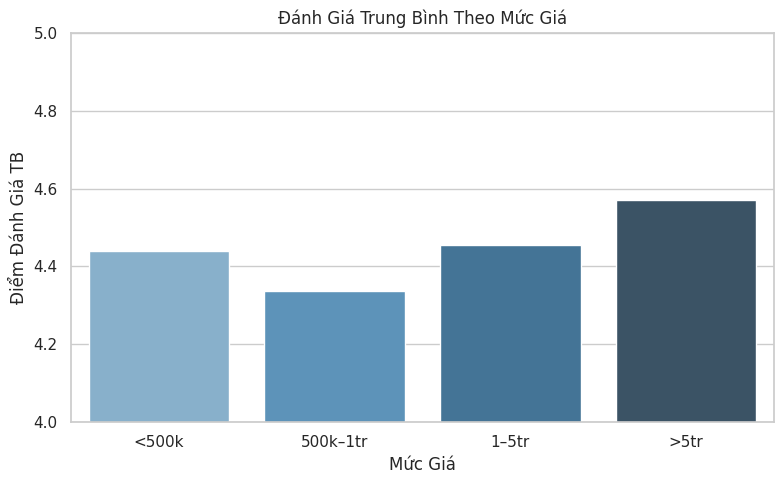

In [ ]:

# Biểu đồ
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rating_by_price, x='price_segment', y='rating', palette='Blues_d')
plt.title("Đánh Giá Trung Bình Theo Mức Giá")
plt.xlabel("Mức Giá")
plt.ylabel("Điểm Đánh Giá TB")
plt.ylim(4, 5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Phân tích tổng quan:**

1. **Mức giá thấp (<500k):**
   - Sản phẩm có mức giá dưới 500k có **điểm đánh giá trung bình khoảng 4.4**.
   - Đây là nhóm sản phẩm phổ thông, thường hướng đến người tiêu dùng tìm kiếm giá cả phải chăng.

2. **Mức giá trung bình (500k–1tr):**
   - Sản phẩm trong khoảng giá này có **điểm đánh giá trung bình thấp nhất (~4.3)**.
   - Điều này có thể phản ánh rằng:
     - Người mua ở phân khúc này kỳ vọng cao hơn về chất lượng hoặc tính năng sản phẩm.
     - Có thể do sự cạnh tranh gay gắt trong phân khúc này, dẫn đến trải nghiệm không đồng đều.

3. **Mức giá cao (1–5tr):**
   - Sản phẩm trong khoảng giá từ 1 triệu đến 5 triệu có **điểm đánh giá trung bình khoảng 4.5**.
   - Nhóm này cho thấy khách hàng sẵn sàng trả giá cao hơn để đổi lấy chất lượng tốt hơn, nhưng vẫn chưa đạt mức hoàn hảo.

4. **Mức giá rất cao (>5tr):**
   - Sản phẩm có giá trên 5 triệu có **điểm đánh giá trung bình cao nhất (~4.6)**.
   - Điều này cho thấy:
     - Khách hàng mua sản phẩm cao cấp thường hài lòng hơn với trải nghiệm tổng thể.
     - Các thương hiệu thuộc phân khúc này có thể đã xây dựng được uy tín và chất lượng vượt trội.

---

💡 **Nhận xét chi tiết:**

1. **Sự tương quan giữa mức giá và đánh giá:**
   - Có **trend tăng nhẹ** về điểm đánh giá trung bình khi mức giá tăng lên:
     - Từ `<500k` → `>5tr`, điểm đánh giá trung bình tăng dần.
   - Điều này phản ánh thực tế rằng:
     - Sản phẩm giá cao thường đi kèm với chất lượng tốt hơn, dịch vụ hậu mãi tốt hơn, hoặc trải nghiệm khách hàng toàn diện hơn.
     - Tuy nhiên, sự khác biệt giữa các nhóm giá không quá lớn, chỉ dao động trong khoảng **4.3–4.6**, cho thấy trải nghiệm khách hàng khá ổn định dù ở phân khúc nào.

2. **Điểm nhấn đáng chú ý:**
   - **Mức giá trung bình (500k–1tr) có điểm đánh giá thấp nhất (~4.3):**
     - Đây là phân khúc nhạy cảm nhất, nơi khách hàng dễ thất vọng nếu sản phẩm không đáp ứng kỳ vọng.
     - Cần xem xét kỹ lưỡng nguyên nhân tại sao nhóm này lại có đánh giá thấp hơn so với các nhóm khác:
       - Chất lượng sản phẩm chưa đồng đều.
       - Sự cạnh tranh gay gắt khiến nhiều sản phẩm không đủ tốt.
       - Khả năng là do thiếu thông tin minh bạch về sản phẩm.

   - **Mức giá rất cao (>5tr) có điểm đánh giá cao nhất (~4.6):**
     - Điều này cho thấy khách hàng mua sản phẩm cao cấp thường hài lòng hơn với trải nghiệm tổng thể.
     - Các thương hiệu trong phân khúc này có thể đã đầu tư mạnh vào chất lượng sản phẩm, dịch vụ khách hàng, và trải nghiệm mua sắm.

3. **Khả năng ảnh hưởng của yếu tố khác:**
   - **Chất lượng sản phẩm:** Sản phẩm cao cấp thường được đầu tư nhiều hơn về chất lượng, dẫn đến trải nghiệm tốt hơn.
   - **Dịch vụ khách hàng:** Thương hiệu cao cấp thường cung cấp dịch vụ hậu mãi tốt hơn, giúp tăng sự hài lòng của khách hàng.
   - **Kỳ vọng của khách hàng:** Khách hàng mua sản phẩm giá rẻ thường có kỳ vọng thấp hơn, trong khi khách hàng mua sản phẩm cao cấp có kỳ vọng cao hơn về chất lượng và trải nghiệm.

---

🌟 **Kết luận và gợi ý hành động:**

1. **Tập trung vào phân khúc giá trung bình (500k–1tr):**
   - Đây là nhóm có **điểm đánh giá thấp nhất**, mặc dù mức giá không quá cao.
   - Cần cải thiện chất lượng sản phẩm và dịch vụ khách hàng trong phân khúc này để nâng cao trải nghiệm người dùng.
   - Xem xét việc cung cấp thêm thông tin chi tiết về sản phẩm, chẳng hạn như video review, đánh giá chuyên sâu, hoặc chính sách bảo hành rõ ràng.

2. **Tiếp tục duy trì chất lượng cao cho phân khúc giá cao (>5tr):**
   - Các sản phẩm trong phân khúc này đang nhận được đánh giá cao nhất, cho thấy chiến lược kinh doanh và marketing hiệu quả.
   - Đừng ngừng đầu tư vào chất lượng sản phẩm, dịch vụ khách hàng, và trải nghiệm mua sắm để giữ vững vị thế.

3. **Xem xét chiến lược khuyến mãi cho phân khúc giá thấp (<500k):**
   - Mặc dù nhóm này có điểm đánh giá trung bình khá ổn (4.4), nhưng cần cân nhắc việc áp dụng các chương trình khuyến mãi phù hợp để thu hút khách hàng tiềm năng.
   - Khuyến mãi có thể giúp tăng doanh số mà không làm giảm chất lượng hình ảnh thương hiệu.

4. **Nghiên cứu sâu hơn về nguyên nhân đánh giá thấp:**
   - Phân tích cụ thể lý do tại sao khách hàng không hài lòng với sản phẩm trong phân khúc giá trung bình (500k–1tr).
   - Thu thập phản hồi từ khách hàng để hiểu rõ hơn về nhu cầu và kỳ vọng của họ.


### Giảm giá có ảnh hưởng đến đánh giá không?

<ipython-input-168-8381b949c215>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=avg_rating_by_discount, x='has_discount', y='rating', palette='Greens_d', ax=ax)


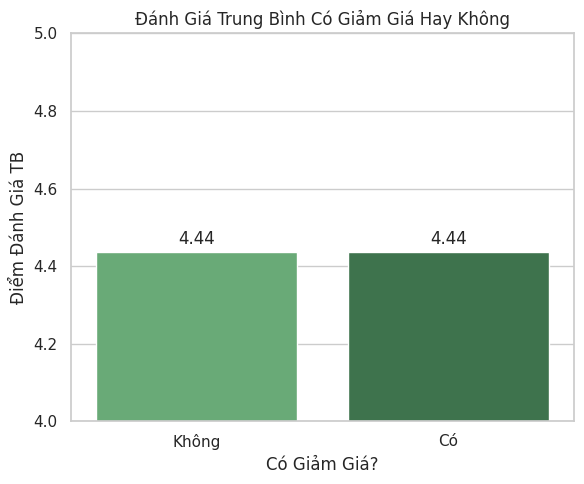

In [ ]:
# Tính điểm rating trung bình theo việc có giảm giá
avg_rating_by_discount = comment_product_df.groupby('has_discount')['rating'].mean().reset_index()

# Biểu đồ
fig, ax = plt.subplots(figsize=(6, 5))
bars = sns.barplot(data=avg_rating_by_discount, x='has_discount', y='rating', palette='Greens_d', ax=ax)

# Hiển thị giá trị trên từng cột
for container in bars.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

# Cấu hình hiển thị
plt.title("Đánh Giá Trung Bình Có Giảm Giá Hay Không")
plt.xlabel("Có Giảm Giá?")
plt.ylabel("Điểm Đánh Giá TB")
plt.xticks([0, 1], ['Không', 'Có'])
plt.ylim(4, 5)
plt.tight_layout()
plt.show()

💡 **Nhận xét chi tiết:**

1. **Giảm giá không ảnh hưởng lớn đến đánh giá:**
   - Điểm đánh giá trung bình của sản phẩm **có giảm giá (4.44)** bằng so với sản phẩm **không giảm giá (4.44)**.
   - Sự khác biệt gần như không đáng kể, cho thấy rằng khách hàng không bị ảnh hưởng mạnh bởi việc có giảm giá hay không khi đưa ra đánh giá.

2. **Khách hàng đánh giá dựa trên chất lượng sản phẩm:**
   - Kết quả này phản ánh rằng **chất lượng sản phẩm và trải nghiệm mua sắm** vẫn là yếu tố chính quyết định điểm đánh giá của khách hàng, chứ không phải việc có giảm giá hay không.
   - Khách hàng có thể đã cân nhắc các yếu tố khác như:
     - Chất lượng sản phẩm.
     - Dịch vụ khách hàng.
     - Độ tin cậy của thương hiệu.
     - Tính năng sản phẩm.

3. **Tầm quan trọng của giảm giá trong marketing:**
   - Mặc dù giảm giá không trực tiếp ảnh hưởng đến điểm đánh giá, nhưng nó vẫn đóng vai trò quan trọng trong chiến lược marketing:
     - Giảm giá có thể giúp tăng doanh số và thu hút khách hàng tiềm năng.
     - Tuy nhiên, nếu giảm giá đi kèm với chất lượng sản phẩm thấp hoặc dịch vụ kém, điều đó có thể dẫn đến sự thất vọng và giảm lòng trung thành của khách hàng.

4. **Kỳ vọng của khách hàng:**
   - Khi khách hàng mua sản phẩm **không giảm giá**, họ thường kỳ vọng vào chất lượng và giá trị tương xứng với giá tiền.
   - Ngược lại, khi mua sản phẩm **có giảm giá**, khách hàng có thể kỳ vọng mức giá thấp hơn sẽ đi kèm với chất lượng tương ứng, nhưng họ vẫn đánh giá dựa trên trải nghiệm thực tế.

---

🌟 **Kết luận và gợi ý hành động:**

1. **Giảm giá không phải là yếu tố quyết định đánh giá:**
   - Điểm đánh giá trung bình của sản phẩm có giảm giá và không giảm giá gần như bằng nhau, cho thấy rằng khách hàng đánh giá chủ yếu dựa trên **chất lượng sản phẩm và trải nghiệm tổng thể**.

2. **Chú trọng vào chất lượng và dịch vụ:**
   - Để cải thiện điểm đánh giá trung bình, cần tập trung vào:
     - Nâng cao chất lượng sản phẩm.
     - Cải thiện dịch vụ khách hàng.
     - Đảm bảo tính minh bạch và thông tin đầy đủ về sản phẩm.

3. **Sử dụng giảm giá thận trọng:**
   - Mặc dù giảm giá không ảnh hưởng nhiều đến đánh giá, nhưng cần sử dụng chiến lược giảm giá một cách hợp lý để tránh:
     - Làm giảm hình ảnh thương hiệu.
     - Gây cảm giác "sản phẩm rẻ tiền" đối với khách hàng.

4. **Nghiên cứu sâu hơn về phản hồi khách hàng:**
   - Thu thập thêm phản hồi từ khách hàng để hiểu rõ hơn về những yếu tố nào ảnh hưởng đến trải nghiệm mua sắm.
   - Phân tích cụ thể lý do tại sao khách hàng đánh giá cao hoặc thấp để điều chỉnh chiến lược phù hợp.


### Sự ảnh hưởng của thương hiệu đến điểm đánh giá

<ipython-input-169-57129f97cad8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=avg_rating_by_brand, x='brand_name', y='rating', palette='viridis', ax=ax)


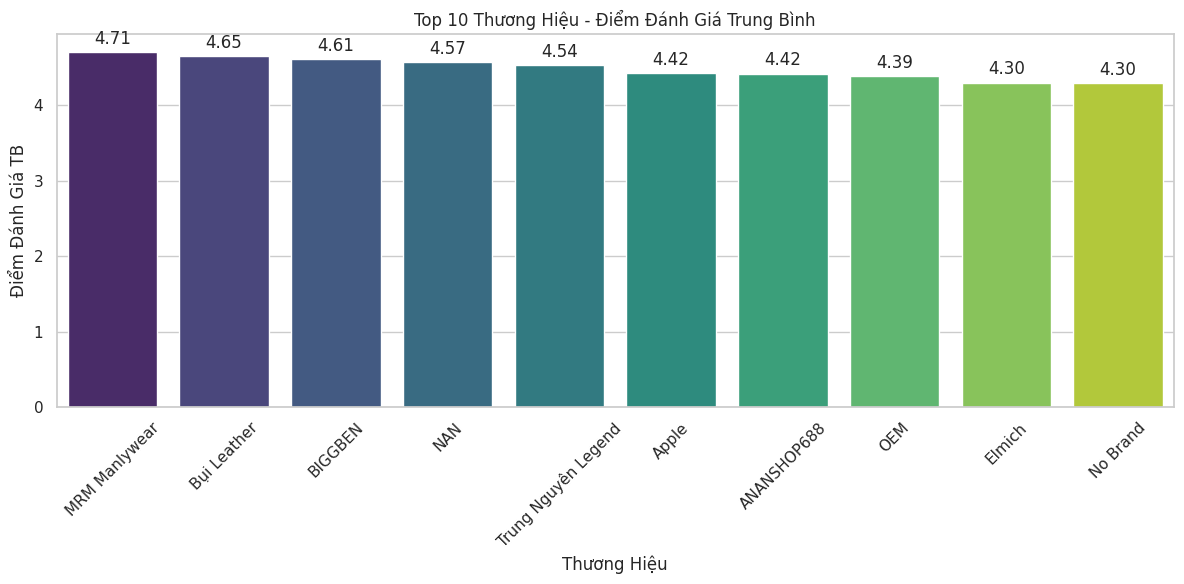

In [ ]:
# Lấy top 10 thương hiệu có nhiều đánh giá nhất
top_brands = comment_product_df['brand_name'].value_counts().head(10).index.tolist()
filtered_df = comment_product_df[comment_product_df['brand_name'].isin(top_brands)]

# Tính rating trung bình theo thương hiệu
avg_rating_by_brand = filtered_df.groupby('brand_name')['rating'].mean().sort_values(ascending=False).reset_index()

# Biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(data=avg_rating_by_brand, x='brand_name', y='rating', palette='viridis', ax=ax)

# Hiển thị giá trị trên từng cột
for container in bars.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

# Cấu hình hiển thị
plt.title("Top 10 Thương Hiệu - Điểm Đánh Giá Trung Bình")
plt.xlabel("Thương Hiệu")
plt.ylabel("Điểm Đánh Giá TB")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 📊 **Phân tích tổng quan:**

1. **Thương hiệu có điểm đánh giá cao nhất:**
   - **MRM Manlywear** dẫn đầu với **4.71 điểm**, cho thấy sự hài lòng rất cao từ khách hàng.
   - Đây là thương hiệu nổi bật nhất trong top 10, cho thấy chất lượng sản phẩm và dịch vụ tốt, hoặc chiến lược chăm sóc khách hàng hiệu quả.

2. **Các thương hiệu đứng đầu (4.65–4.55):**
   - Các thương hiệu như **Bụi Leather, BIGGBEN, NAN, và Trung Nguyên Legend** đều đạt điểm đánh giá trung bình cao (**4.65–4.55**).
   - Điều này cho thấy những thương hiệu này cũng được khách hàng yêu thích và đánh giá tích cực.

3. **Sản phẩm "No Brand" (4.29 điểm):**
   - Là nhóm sản phẩm **không có thương hiệu rõ ràng**, nhưng vẫn đạt mức điểm đánh giá khá (**4.29 điểm**), chỉ thấp hơn so với các thương hiệu khác.
   - Mặc dù điểm đánh giá chưa cao bằng các thương hiệu lớn, nhưng kết quả này cho thấy:
     - Sản phẩm "No Brand" vẫn đáp ứng được kỳ vọng cơ bản của người tiêu dùng.
     - Giá thành thường rẻ hơn, phù hợp với đối tượng khách hàng tìm kiếm sản phẩm giá rẻ.

4. **Sự chênh lệch giữa các nhóm:**
   - Khoảng cách giữa thương hiệu có điểm cao nhất (**MRM Manlywear: 4.71**) và nhóm "No Brand" (**4.29**) là **0.42 điểm**.
   - Điều này phản ánh rằng người mua vẫn có xu hướng đánh giá cao hơn cho các sản phẩm có thương hiệu rõ ràng, chất lượng ổn định và uy tín.

---

💡 **Nhận xét chi tiết:**

1. **Vai trò của thương hiệu trong đánh giá:**
   - Biểu đồ cho thấy rõ rằng **sản phẩm có thương hiệu rõ ràng** thường được đánh giá cao hơn.
   - Thương hiệu giúp tạo niềm tin, nâng cao kỳ vọng và trải nghiệm người dùng, từ đó ảnh hưởng đến điểm đánh giá.

2. **Đánh giá của khách hàng với sản phẩm "No Brand":**
   - Nhóm "No Brand" đạt điểm **4.29**, đây là một kết quả khả quan cho nhóm sản phẩm không có tên tuổi hay thương hiệu nổi bật.
   - Có thể lý giải bởi:
     - Giá cả phải chăng, phù hợp với nhu cầu sử dụng đơn giản.
     - Đáp ứng được kỳ vọng cơ bản của người dùng.
     - Tuy nhiên, chất lượng sản phẩm có thể chưa đồng đều hoặc thiếu tính vượt trội để khiến khách hàng đánh giá rất cao.

3. **Khách hàng có phân biệt rõ ràng giữa sản phẩm có thương hiệu và không có thương hiệu:**
   - Dù không phải lúc nào sản phẩm có thương hiệu cũng được đánh giá cao nhất, nhưng nhìn chung, **thương hiệu vẫn là yếu tố quan trọng ảnh hưởng đến sự hài lòng của khách hàng**.
   - Khách hàng thường kỳ vọng nhiều hơn vào sản phẩm có thương hiệu và dễ thất vọng hơn nếu sản phẩm không đáp ứng mong đợi.

---

🌟 **Kết luận và gợi ý hành động:**

1. **Đối với các thương hiệu đang dẫn đầu:**
   - Tiếp tục duy trì chất lượng sản phẩm và dịch vụ.
   - Tăng cường tương tác với khách hàng để giữ chân người dùng trung thành.
   - Thu thập phản hồi để cải tiến liên tục.

2. **Đối với nhóm sản phẩm "No Brand":**
   - Nên nghiên cứu sâu hơn về lý do tại sao điểm đánh giá còn thấp hơn các thương hiệu khác.
   - Cải thiện chất lượng sản phẩm, đặc biệt là độ bền, mẫu mã, và bao bì.
   - Nếu có thể, xây dựng thương hiệu nội bộ riêng để tăng độ tin cậy và giá trị cảm nhận.

3. **Tổng thể:**
   - Đánh giá của khách hàng bị ảnh hưởng bởi nhiều yếu tố, trong đó **thương hiệu là một yếu tố quan trọng**.
   - Việc có thương hiệu rõ ràng giúp tạo ra lợi thế cạnh tranh, ngay cả khi giá bán cao hơn một chút.


#  **5. MÔ HÌNH PHÂN LOẠI SẢN PHẨM**  


## 5.1. Xử lý các đặc trưng

## 5.2. Mô hình phân loại Naive Bayes phân loại danh mục sản phẩm theo tên sản phẩm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

In [ ]:
# Hàm để tiền xử lý văn bản tiếng Việt
def preprocess_text(text):
    if isinstance(text, str):
        # Chuyển văn bản về chữ thường
        text = text.lower()

        # Loại bỏ dấu câu và các ký tự đặc biệt
        text = re.sub(r'[^\w\s]', ' ', text)

        # Loại bỏ chữ số
        text = re.sub(r'\d+', ' ', text)

        # Loại bỏ các khoảng trắng thừa
        text = re.sub(r'\s+', ' ', text).strip()

        return text
    return ""

# Tiền xử lý tên sản phẩm
df_cleaned['processed_name'] = df_cleaned['name'].apply(preprocess_text)

# Thêm stopwords tiếng Việt
vietnamese_stopwords = [
    'và', 'của', 'cho', 'là', 'với', 'có', 'trong', 'đến', 'tới', 'từ', 'khi',
    'rằng', 'như', 'để', 'bởi', 'bởi vì', 'các', 'những', 'vì', 'về', 'theo',
    'cùng', 'hay', 'hoặc', 'nhưng', 'nếu', 'mà', 'là', 'không', 'được', 'tại',
    'một', 'này', 'đó', 'được', 'nên', 'rất', 'thì', 'đang', 'đã', 'sẽ', 'rồi',
    'mình', 'ra', 'vào', 'lại', 'đây', 'kia', 'thế'
]

# Kết hợp stopwords tiếng Việt với stopwords tiếng Anh
all_stopwords = set(stopwords.words('english') + vietnamese_stopwords)

# Loại bỏ stopwords từ tên đã xử lý
df_cleaned['processed_name'] = df_cleaned['processed_name'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in all_stopwords])
)


In [ ]:
# In ra kiểm tra
print(df_cleaned['processed_name'])

0                                       sống làm việc yêu
1          đừng làm việc chăm chỉ hãy làm việc thông minh
2       kế toán vỉa hè thực hành báo cáo tài chính căn...
3         truyện ehon bé tuổi bộ cuốn phát triển sáng tạo
4                             quy luật bản chất con người
                              ...                        
9878    lốc giấy thơm quần áo bounce x tờ total sheets mỹ
9879    lốc gói khăn giấy cao cấp tempo softpack mùi b...
9880    combo chai tẩy diệt khuẩn bồn cầu toilet hương...
9881    combo túi nước rửa chén hương táo loại túi ml ...
9882                chất tẩy bẩn đa năng siêu sạch sumo g
Name: processed_name, Length: 8572, dtype: object


In [ ]:
# Chọn các danh mục có ít nhất 20 sản phẩm để đảm bảo đủ dữ liệu huấn luyện
category_counts = df_cleaned['category'].value_counts()
valid_categories = category_counts[category_counts >= 20].index
df_filtered = df_cleaned[df_cleaned['category'].isin(valid_categories)].copy()

In [ ]:
print(f"Số lượng danh mục hợp lệ: {len(valid_categories)}")
print(f"Số lượng sản phẩm sau khi lọc: {len(df_filtered)}")

Số lượng danh mục hợp lệ: 26
Số lượng sản phẩm sau khi lọc: 8572


Chuẩn bị dữ liệu, chia thành 80% tập train và 20% tập test

In [ ]:
X = df_filtered['processed_name']
y = df_filtered['category_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Tạo vector TF-IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,  # Giới hạn số lượng từ vựng
)
# Huấn luyện TF-IDF vectorizer trên tập huấn luyện
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
# Chuyển đổi dữ liệu thành định dạng phù hợp cho Naiye Bayes
X_train = X_train_tfidf.toarray()
X_test = X_test_tfidf.toarray()

Mô hình Naive Bayes

In [ ]:
# Tạo mô hình Naiye Bayes
model_naiye_bayes = MultinomialNB()

# Huấn luyện mô hình
model_naiye_bayes.fit(X_train_tfidf, y_train)

# Đánh giá mô hình
y_pred = model_naiye_bayes.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác của mô hình phân loại: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Độ chính xác của mô hình phân loại: 0.8542
                              precision    recall  f1-score   support

                 Balo & Vali       0.75      0.85      0.80        74
             Bách hóa online       0.72      0.81      0.76        72
            Chăm sóc nhà cửa       0.71      0.99      0.83        71
                Giày dép nam       0.79      0.88      0.83        72
                 Giày dép nữ       0.89      0.84      0.87        70
                Hàng quốc tế       0.97      0.70      0.81        56
           Laptop & Máy tính       0.94      0.86      0.90        72
          Làm đẹp & Sức khỏe       0.86      0.83      0.85        72
                     Máy ảnh       0.88      0.96      0.92        69
            Nhà cửa đời sống       0.87      0.77      0.82        75
         Phụ kiện thời trang       0.87      0.90      0.89        73
Sách & Văn phòng phẩm (Tiki)       0.89      0.75      0.81        75
  Thiết bị KTS & Phụ kiện số       0.78      

Đánh giá mô hình Naive Bayes

**Ưu điểm:**
- Đơn giản, nhanh và hiệu quả với dữ liệu văn bản như tên sản phẩm.
- Hoạt động tốt với dữ liệu có số chiều lớn (TF-IDF).
- Với độ chính xác 0.8542 (tương đương 85.42%), mô hình đủ mạnh để ứng dụng thực tế trong thương mại điện tử.

**Ý nghĩa độ chính xác 0.8542:**
- Khoảng 85.42% sản phẩm được gán đúng danh mục.
- Là kết quả khả quan trong bài toán phân loại nhiều nhãn (multiclass).
---

Ứng dụng mô hình vào phân tích dữ liệu

- **Tự động phân loại sản phẩm chưa có nhãn**
  → Giúp xử lý hàng trăm nghìn sản phẩm mới mỗi ngày nhanh chóng và chính xác.

- **Hỗ trợ kiểm tra chất lượng dữ liệu**
  → So sánh kết quả phân loại với danh mục do người bán nhập → phát hiện sai lệch hoặc gian lận.

- **Cải thiện công cụ tìm kiếm và gợi ý**
  → Hiểu rõ ngữ nghĩa tên sản phẩm để đề xuất đúng ngành hàng cho người dùng.

- **Phân tích xu hướng thị trường theo danh mục**
  → Nhóm sản phẩm theo từ khóa danh mục → hỗ trợ phân tích hành vi tiêu dùng và xu hướng ngành hàng.

---

Ứng dụng cụ thể cho Tiki

- **Tăng tốc quy trình đăng sản phẩm mới**  
  → Gợi ý danh mục phù hợp ngay khi seller nhập tên sản phẩm → giảm sai sót thủ công.

- **Tối ưu hệ thống lọc và gợi ý sản phẩm**  
  → Cải thiện chất lượng đề xuất trong trang danh mục, giúp tăng CTR và tỉ lệ chuyển đổi.

- **Hỗ trợ đội kiểm duyệt dữ liệu sản phẩm**  
  → Ưu tiên kiểm tra các sản phẩm có gợi ý phân loại lệch với khai báo gốc.

- **Xây dựng hệ thống phân tích thị trường theo danh mục động**  
  → Theo dõi các nhóm sản phẩm mới nổi lên từ tên sản phẩm được phân loại → hỗ trợ marketing & mua hàng.



In [ ]:
# Lưu mô hình
joblib.dump(model_naiye_bayes, 'product_category_model.pkl')
# Lưu vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_naiye.pkl')

['tfidf_naiye.pkl']

## 5.3. Mô hình dự đoán số lượng sản phẩm sẽ bán được trên trang Tiki

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Chọn các đặc trưng quan trọng

In [ ]:
numeric_features = ['price', 'list_price', 'discount', 'discount_rate', 'review_count', 'has_discount']

Xét tương quan giữa các đặc trưng

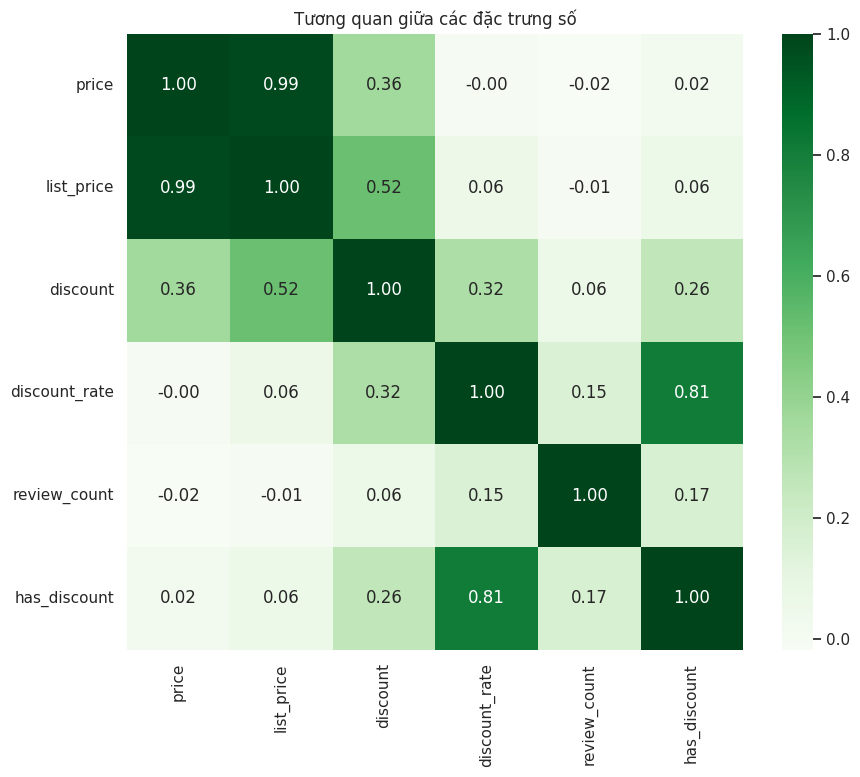

In [ ]:
# Xét tương quan
correlation_matrix = df_cleaned[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens', square=True)
plt.title('Tương quan giữa các đặc trưng số')
plt.show()


Các đặc trưng có độ tương quan với nhau lớn => Dùng Random Forest để tránh đa cộng tuyến <br>
Chúng xây dựng nhiều cây quyết định và mỗi cây tại mỗi nút chỉ chọn một đặc trưng tốt nhất, điều này giúp chúng tự nhiên "lọc" các đặc trưng dư thừa.<br>
Một số ít lại không tương quan với nhau cao => Random Forest có thể học các mối quan hệ phi tuyến.

Mã hóa đặc trưng danh mục sản phẩm

In [ ]:
# Mã hóa danh mục sản phẩm
label_encoder = LabelEncoder()
df_cleaned['category_encoded'] = label_encoder.fit_transform(df_cleaned['category'])
numeric_features.append('category_encoded')


Tạo ma trận TF-IDF cho tên sản phẩm
Giới hạn số lượng từ vựng để tránh overfitting

In [ ]:
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(df_cleaned['processed_name'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

Kết hợp các tính năng số với các tính năng từ TF-IDF để tạo bộ đặc trưng X hoàn chỉnh

In [ ]:
X_numeric = df_cleaned[numeric_features].values
X_combined = np.hstack([X_numeric, tfidf_matrix.toarray()])

Lấy log của số lượng bán để xử lý phân phối không chuẩn/ các số lớn

In [ ]:
df_cleaned['log_quantity_sold'] = np.log1p(df_cleaned['quantity_sold'])
# Biến mục tiêu là log_quantity_sold
y = df_cleaned['log_quantity_sold'].values

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

Chuẩn hóa dữ liệu tất cả về cùng một thang đo

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Tạo mô hình Radom Forest với 100 cây  

In [ ]:
model_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

Huấn luyện và dự đoán

In [ ]:
# Huấn luyện mô hình
model_random_forest.fit(X_train_scaled, y_train)
# Dự đoán
y_pred = model_random_forest.predict(X_test_scaled)
# Chuyển đổi lại từ log scale
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

Đánh giá mô hình

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"\nRMSE của mô hình Random Forest: {rmse:.2f}")
r2 = r2_score(y_test, y_pred)  # Sử dụng log scale để R² (do các giá trị lớn)
print(f"R² của mô hình Random Forest: {r2:.4f}")


RMSE của mô hình Random Forest: 25811.75
R² của mô hình Random Forest: 0.8502


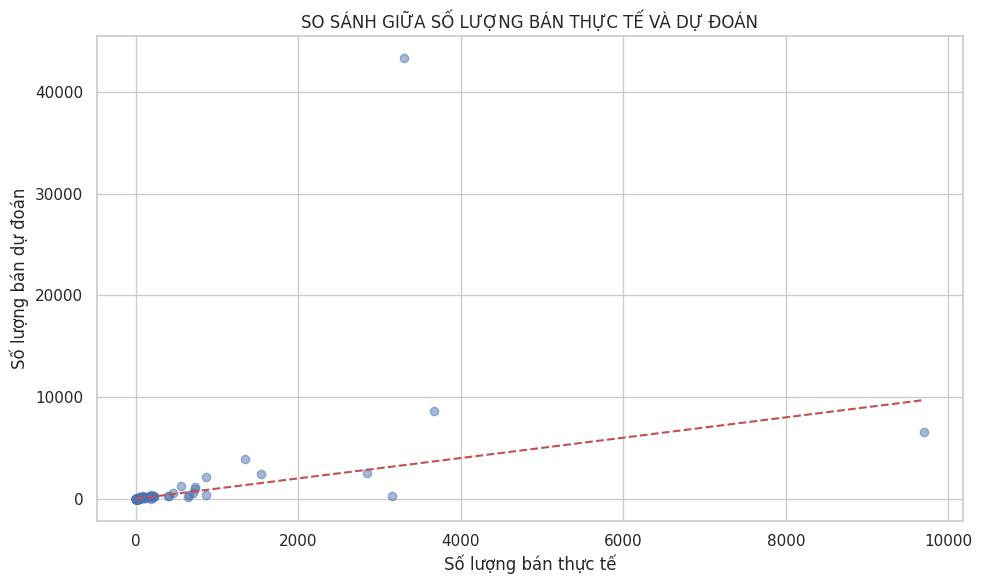

In [ ]:
# So sánh giá trị thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual[:100], y_pred_actual[:100], alpha=0.5)
plt.plot([0, max(y_test_actual[:100])], [0, max(y_test_actual[:100])], 'r--')
plt.xlabel('Số lượng bán thực tế')
plt.ylabel('Số lượng bán dự đoán')
plt.title('SO SÁNH GIỮA SỐ LƯỢNG BÁN THỰC TẾ VÀ DỰ ĐOÁN')
plt.tight_layout()
plt.show()

Đánh giá mô hình Random Forest

**Chỉ số đánh giá:**
- **RMSE (Root Mean Squared Error):** 25,811.75  
  → Trung bình sai số của mô hình khoảng 25.800 đơn vị sản phẩm so với thực tế.

- **R² (Hệ số xác định):** 0.8502  
  → Mô hình giải thích được ~85.02% phương sai trong dữ liệu → độ phù hợp cao.

**Đặc trưng sử dụng:**
['price', 'list_price', 'discount', 'discount_rate', 'review_count', 'has_discount', ‘category_name’,  processed_name’]

→ Đây là các yếu tố quan trọng ảnh hưởng đến doanh số bán ra, được trích xuất từ dữ liệu sản phẩm thực tế.

---

 Nhận xét mô hình

- Random Forest hoạt động tốt với dữ liệu phi tuyến, nhiều biến đầu vào và có tính tương tác cao.
- R² > 0.85 chứng tỏ mô hình có khả năng dự đoán tốt trong bối cảnh thương mại điện tử.
- RMSE lớn (25k+) do dữ liệu có thể bị lệch phân phối (sản phẩm hot bán cực cao, sản phẩm thường bán thấp).

---

Ứng dụng trong phân tích dữ liệu thương mại điện tử Tiki

- **Dự đoán doanh số cho sản phẩm mới**
  → Ước lượng trước số lượng bán dựa trên giá, khuyến mãi, đánh giá... giúp seller điều chỉnh chiến lược.

- **Hỗ trợ ra quyết định về giá và khuyến mãi**
  → Phân tích ảnh hưởng của discount/discount_rate đến doanh số → tối ưu hóa chính sách giảm giá.

- **Tối ưu tồn kho và logistics**
  → Dự báo nhu cầu sản phẩm giúp điều phối hàng tồn kho hợp lý hơn theo từng ngành hàng.

- **Phân loại sản phẩm tiềm năng**
  → Ước tính sản phẩm có khả năng bán cao để ưu tiên hiển thị, chạy quảng cáo hoặc đề xuất.

- **Hỗ trợ đội ngũ mua hàng & vận hành**
  → Xác định nhóm sản phẩm có lợi thế về giá và đánh giá để chủ động đàm phán với nhà cung cấp.



Lưu mô hình

In [ ]:
import joblib
# Lưu mô hình, scaler và vectorizer để sử dụng trong ứng dụng Streamlit
joblib.dump(model_random_forest, 'quantity_sold_prediction_model.pkl')
joblib.dump(scaler, 'sales_scaler.pkl')
joblib.dump(tfidf, 'sales_tfidf.pkl')
joblib.dump(numeric_features, 'sales_features.pkl')
# Lưu category_name
joblib.dump(category_mapping, 'category_mapping.pkl')
print("Đã lưu mô hình dự đoán số lượng bán.")

Đã lưu mô hình dự đoán số lượng bán.


## 5.3. Mô hình phân tích cảm xúc từ bình luận đánh giá sử dụng mô hình Logistic Regression và mô hình SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyvi import ViTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from collections import Counter
from tabulate import tabulate
import base64
from io import BytesIO
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
# Đọc dữ liệu và tiền xử lý (từ mã của bạn)
df = pd.read_csv('/content/drive/MyDrive/Nhóm 4_Colab_Notebooks/cleaned_comment_data.csv')
df['text'] = df['title'].fillna('') + ' ' + df['content'].fillna('')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Nhóm 4_Colab_Notebooks/cleaned_comment_data.csv'

In [ ]:
# Gán nhãn cảm xúc
def label_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating <= 2:
        return "negative"
    else:
        return None

In [ ]:
# Danh sách stopword tiếng Việt mở rộng
vietnamese_stopwords = {
    'là', 'và', 'của', 'trong', 'được', 'thì', 'này', 'đó', 'rất', 'quá', 'như',
    'cho', 'với', 'tại', 'một', 'các', 'có', 'không', 'để', 'tôi', 'mình', 'bạn',
    'hàng', 'sp', 'sản_phẩm', 'nên', 'nhưng', 'vì', 'nếu', 'khi', 'lại', 'đã', 'còn'
}

In [ ]:
# Tiền xử lý văn bản tiếng Việt
def preprocess_text(text):
    if pd.isna(text):
        return ""
    # Chuyển thành chữ thường, loại bỏ ký tự đặc biệt
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    # Tách từ bằng pyvi
    text = ViTokenizer.tokenize(text)
    # Loại bỏ stopword
    stop_words = set(stopwords.words('english')).union(vietnamese_stopwords)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Áp dụng tiền xử lý
if 'content' in df.columns:
    df['processed_content'] = df['content'].apply(preprocess_text)
else:
    print("Lỗi: Cột 'content' không tồn tại trong DataFrame.")
    exit()

print(df.info())

print(df.head())

In [ ]:
# Loại bỏ các hàng có nội dung rỗng sau khi xử lý
df = df[df['processed_content'] != ''].dropna(subset=['processed_content'])

print(df.columns)

# Tạo cột sentiment dựa trên rating
def map_sentiment(rating):
    if rating >= 4:
        return 'Tích cực'
    elif rating == 3:
        return 'Trung tính'
    else:
        return 'Tiêu cực'

df['sentiment'] = df['rating'].apply(map_sentiment)

# Trích xuất đặc trưng bằng TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df['processed_content'])
y = df['sentiment']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Huấn luyện và đánh giá mô hình Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision, lr_recall, lr_f1, _ = precision_recall_fscore_support(y_test, lr_y_pred, average='weighted')
lr_cm = confusion_matrix(y_test, lr_y_pred, labels=['Tích cực', 'Trung tính', 'Tiêu cực'])

In [ ]:
# Huấn luyện và đánh giá mô hình SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision, svm_recall, svm_f1, _ = precision_recall_fscore_support(y_test, svm_y_pred, average='weighted')
svm_cm = confusion_matrix(y_test, svm_y_pred, labels=['Tích cực', 'Trung tính', 'Tiêu cực'])

In [ ]:
# Hàm lưu biểu đồ thành base64
def save_plot_to_base64():
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    img_str = base64.b64encode(buffer.getvalue()).decode()
    buffer.close()
    return img_str

In [ ]:
# Biểu đồ phân phối cảm xúc
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, order=['Tích cực', 'Trung tính', 'Tiêu cực'])
plt.title('Phân Phối Cảm Xúc Từ Bình Luận', fontsize=14, fontweight='bold')
plt.xlabel('Cảm Xúc', fontsize=12)
plt.ylabel('Số Lượng Bình Luận', fontsize=12)
plt.tight_layout()
sentiment_dist_plot = save_plot_to_base64()

In [ ]:
# Biểu đồ ma trận nhầm lẫn cho Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tích cực', 'Trung tính', 'Tiêu cực'],
            yticklabels=['Tích cực', 'Trung tính', 'Tiêu cực'])
plt.title('Ma Trận Nhầm Lẫn (Logistic Regression)', fontsize=14, fontweight='bold')
plt.xlabel('Dự Đoán', fontsize=12)
plt.ylabel('Thực Tế', fontsize=12)
plt.tight_layout()
lr_confusion_matrix_plot = save_plot_to_base64()

- Ưu điểm:
  - Lớp Tích cực được mô hình dự đoán khá tốt, với 659/671 mẫu (98,2%) được phân loại đúng.

  - Lớp Tiêu cực có 78 mẫu được dự đoán đúng.
- Hạn chế:
  - Lớp Trung tính gần như bị bỏ qua: không có mẫu nào được dự đoán đúng (0).

  - Mô hình thường nhầm lẫn Trung tính → Tích cực (48 mẫu) và Trung tính → Tiêu cực (10 mẫu).
- Nhiều mẫu Tiêu cực bị dự đoán sai là Tích cực (87 mẫu), điều này có thể gây rủi ro nếu ứng dụng trong đánh giá sản phẩm

In [ ]:
# Biểu đồ ma trận nhầm lẫn cho SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tích cực', 'Trung tính', 'Tiêu cực'],
            yticklabels=['Tích cực', 'Trung tính', 'Tiêu cực'])
plt.title('Ma Trận Nhầm Lẫn (SVM)', fontsize=14, fontweight='bold')
plt.xlabel('Dự Đoán', fontsize=12)
plt.ylabel('Thực Tế', fontsize=12)
plt.tight_layout()
svm_confusion_matrix_plot = save_plot_to_base64()

- Ưu điểm:
  - Dự đoán lớp Tiêu cực tốt hơn so với Logistic Regression (98 đúng so với 78).

  - Giảm số lượng nhầm lẫn Tiêu cực → Tích cực (68 so với 87).

- Hạn chế:
  - Không dự đoán được lớp Trung tính (0 mẫu) – giống Logistic Regression.

  - Lớp Tích cực vẫn có nhiều mẫu bị nhầm sang Tiêu cực (22 mẫu).

  - Trung tính tiếp tục bị nhầm sang Tích cực (44 mẫu) và Tiêu cực (14 mẫu).

In [ ]:
# Trích xuất từ khóa phổ biến
def get_top_keywords(sentiment, n=10):
    texts = df[df['sentiment'] == sentiment]['processed_content'].str.split()
    words = [word for text in texts for word in text]
    word_counts = Counter(words)
    return word_counts.most_common(n)

positive_keywords = get_top_keywords('Tích cực')
negative_keywords = get_top_keywords('Tiêu cực')

# Tạo bảng so sánh hiệu suất mô hình
performance_table = [
    ['Logistic Regression', f'{lr_accuracy:.2f}', f'{lr_precision:.2f}', f'{lr_recall:.2f}', f'{lr_f1:.2f}'],
    ['SVM', f'{svm_accuracy:.2f}', f'{svm_precision:.2f}', f'{svm_recall:.2f}', f'{svm_f1:.2f}']
]
performance_html = tabulate(performance_table, headers=['Mô Hình', 'Accuracy', 'Precision', 'Recall', 'F1-Score'], tablefmt='html')

# Tạo bảng từ khóa phổ biến
keywords_table = [
    ['Tích cực', ', '.join([f'{word} ({count})' for word, count in positive_keywords])],
    ['Tiêu cực', ', '.join([f'{word} ({count})' for word, count in negative_keywords])]
]
keywords_html = tabulate(keywords_table, headers=['Cảm Xúc', 'Từ Khóa Phổ Biến'], tablefmt='html')

In [ ]:
# Dữ liệu hiệu suất mô hình
models = ['Logistic Regression', 'SVM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
performance_data = {
    'Logistic Regression': [lr_accuracy, lr_precision, lr_recall, lr_f1],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1]
}

# Tạo biểu đồ cột
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, performance_data['Logistic Regression'], width, label='Logistic Regression', color='skyblue')
plt.bar(x + width/2, performance_data['SVM'], width, label='SVM', color='lightcoral')
plt.xlabel('Chỉ Số', fontsize=12)
plt.ylabel('Giá Trị', fontsize=12)
plt.title('So Sánh Hiệu Suất Mô Hình', fontsize=14, fontweight='bold')
plt.xticks(x, metrics)
plt.legend()
plt.tight_layout()
model_performance_plot = save_plot_to_base64()

# In hiệu suất của các mô hình
print("\nPerformance Data:")
for model, scores in performance_data.items():
    print(f"\n{model}:")
    for metric, score in zip(metrics, scores):
        print(f"  {metric}: {score}")


- SVM vượt trội hơn về mọi mặt so với Logistic Regression:

  - Accuracy tăng nhẹ (~1%).

  - Precision, Recall và F1-Score đều tốt hơn.

- Điều này phản ánh rõ trong ma trận nhầm lẫn — đặc biệt là ở việc dự đoán tốt hơn lớp Tiêu cực.
- Nên sử dụng mô hình SVM để có kết quả tốt hơn
- Nhưng cần lưu ý cải thiện khả năng nhận diện lớp Trung tính để tăng chất lượng phân loại tổng thể.

- 2 mô hình trên được ứng dụng để:
  - Hiểu ý kiến khách hàng: Phân loại cảm xúc giúp doanh nghiệp hiểu được phản hồi của khách hàng về sản phẩm hoặc dịch vụ.
  - Cải thiện sản phẩm/dịch vụ: Dựa trên kết quả phân loại, doanh nghiệp có thể tập trung cải thiện các khía cạnh nhận được nhiều cảm xúc tiêu cực.
  - Tự động hóa phân tích: Thay vì đọc thủ công hàng nghìn bình luận, mô hình tự động phân loại cảm xúc, tiết kiệm thời gian và chi phí.

## 5.4. Mô hình phân tích chủ đề từ bình luận đánh giá sử dụng phương pháp LDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from underthesea import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import numpy as np

In [ ]:
# Đọc dữ liệu và tiền xử lý (từ mã của bạn)
df_lda = pd.read_csv('/content/drive/MyDrive/Nhóm 4_Colab_Notebooks/cleaned_comment_data.csv')
df_lda['text'] = df_lda['title'].fillna('') + ' ' + df_lda['content'].fillna('')

In [ ]:
# Danh sách stopword tiếng Việt mở rộng
stopwords = {
    'là', 'và', 'của', 'trong', 'được', 'thì', 'này', 'đó', 'rất', 'quá', 'như',
    'cho', 'với', 'tại', 'một', 'các', 'có', 'không', 'để', 'tôi', 'mình', 'bạn',
    'hàng', 'sp', 'sản_phẩm', 'nên', 'nhưng', 'vì', 'nếu', 'khi', 'lại', 'đã', 'còn',
    'được', 'thì', 'có', 'mình', 'là', 'nên', 'ko', 'không', 'và', 'kì', 'cực'
}

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords]
    return ' '.join(tokens)

In [ ]:
df_lda['text_cleaned'] = df_lda['text'].apply(preprocess_text)

In [ ]:
# Tạo cột sentiment
def map_sentiment(rating):
    if rating >= 4:
        return 'Tích cực'
    elif rating == 3:
        return 'Trung tính'
    else:
        return 'Tiêu cực'

In [ ]:
df_lda['sentiment'] = df_lda['rating'].apply(map_sentiment)

In [ ]:
# Áp dụng LDA
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

In [ ]:
# Gán chủ đề chính cho mỗi bình luận
topic_dist = lda.transform(X)
df_lda['main_topic'] = topic_dist.argmax(axis=1) + 1  # Chủ đề từ 1 đến n_topics

In [ ]:
# Hiển thị từ khóa cho mỗi chủ đề
feature_names = vectorizer.get_feature_names_out()
print("Từ khóa của các chủ đề:")
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-15:]]
    print(f"Chủ đề {topic_idx + 1}: {', '.join(top_words)}")

Kết quả phân tích chủ đề từ bình luận:

1. Mua sắm và giao hàng trên Tiki
   - Từ khóa: shop, tiki, giao, hàng, mua
   - Mô tả: Bình luận về trải nghiệm mua sắm trên Tiki, từ đặt hàng đến nhận hàng.

2. Bình nước
   - Từ khóa: bình, nước, mua, hàng
   - Mô tả: Bình luận về sản phẩm bình nước, bao gồm việc mua và các vấn đề gặp phải.

3. Đồ gia dụng và trang trí
   - Từ khóa: dụng, cây, gọn, dày, dễ, tiện, đẹp, chắn, chắc, lau
   - Mô tả: Bình luận tích cực về chất lượng sản phẩm, giao hàng nhanh và sự ủng hộ shop.

4. Chất lượng sản phẩm và dịch vụ
   - Từ khóa: shop, lượng, chất, sản, phẩm, ok, giao, hàng, nhanh, tốt, ủng
   - Mô tả: Bình luận về sản phẩm trang trí nhà cửa (như cây giả, đồ dán keo), đẹp và chắc chắn.

5. Dịch vụ đóng gói và giao hàng
   - Từ khóa: shop, giá, đóng, gói, chất, lượng, sản, phẩm, nhanh, giao, hàng
   - Mô tả: Bình luận về dịch vụ đóng gói cẩn thận, giao hàng nhanh và chất lượng sản phẩm.

In [ ]:
# --- Đánh giá mô hình ---
print("\nĐánh giá mô hình LDA:")

# 1. Tính Perplexity
perplexity = lda.perplexity(X)
print(f"Perplexity: {perplexity:.2f}")

# 2. Tính Topic Diversity (Độ đa dạng chủ đề)
def calculate_topic_diversity(lda_model, top_n=15):
    top_words_per_topic = []
    for topic in lda_model.components_:
        top_words = [feature_names[i] for i in topic.argsort()[-top_n:]]
        top_words_per_topic.append(set(top_words))

    # Tính tỷ lệ từ khóa duy nhất giữa các chủ đề
    unique_words = set()
    for topic_words in top_words_per_topic:
        unique_words.update(topic_words)

    total_words = len(top_words_per_topic) * top_n
    if total_words > 0:
        diversity_score = len(unique_words) / total_words
    else:
        diversity_score = 0
    return diversity_score

diversity_score = calculate_topic_diversity(lda)
print(f"Topic Diversity: {diversity_score:.2f}")

# 3. Phân tích phân bố tài liệu trên các chủ đề
topic_counts = df_lda['main_topic'].value_counts().sort_index()
print("\nPhân bố tài liệu trên các chủ đề:")
for topic in range(1, n_topics + 1):
    count = topic_counts.get(topic, 0)
    print(f"Chủ đề {topic}: {count} tài liệu ({count / len(df) * 100:.2f}%)")

Kết quả phân tích chủ đề từ bình luận:

1. Mua sắm và giao hàng trên Tiki
   - Từ khóa: shop, tiki, giao, hàng, mua
   - Mô tả: Bình luận về trải nghiệm mua sắm trên Tiki, từ đặt hàng đến nhận hàng.

2. Bình nước
   - Từ khóa: bình, nước, mua, hàng
   - Mô tả: Bình luận về sản phẩm bình nước, bao gồm việc mua và các vấn đề gặp phải.

3. Đồ gia dụng và trang trí
   - Từ khóa: dụng, cây, gọn, dày, dễ, tiện, đẹp, chắn, chắc, lau
   - Mô tả: Bình luận tích cực về chất lượng sản phẩm, giao hàng nhanh và sự ủng hộ shop.

4. Chất lượng sản phẩm và dịch vụ
   - Từ khóa: shop, lượng, chất, sản, phẩm, ok, giao, hàng, nhanh, tốt, ủng
   - Mô tả: Bình luận về sản phẩm trang trí nhà cửa (như cây giả, đồ dán keo), đẹp và chắc chắn.

5. Dịch vụ đóng gói và giao hàng
   - Từ khóa: shop, giá, đóng, gói, chất, lượng, sản, phẩm, nhanh, giao, hàng
   - Mô tả: Bình luận về dịch vụ đóng gói cẩn thận, giao hàng nhanh và chất lượng sản phẩm.

In [ ]:
# --- Đánh giá mô hình ---
print("\nĐánh giá mô hình LDA:")

# 1. Tính Perplexity
perplexity = lda.perplexity(X)
print(f"Perplexity: {perplexity:.2f}")

# 2. Tính Topic Diversity (Độ đa dạng chủ đề)
def calculate_topic_diversity(lda_model, top_n=15):
    top_words_per_topic = []
    for topic in lda_model.components_:
        top_words = [feature_names[i] for i in topic.argsort()[-top_n:]]
        top_words_per_topic.append(set(top_words))

    # Tính tỷ lệ từ khóa duy nhất giữa các chủ đề
    unique_words = set()
    for topic_words in top_words_per_topic:
        unique_words.update(topic_words)

    total_words = len(top_words_per_topic) * top_n
    if total_words > 0:
        diversity_score = len(unique_words) / total_words
    else:
        diversity_score = 0
    return diversity_score

diversity_score = calculate_topic_diversity(lda)
print(f"Topic Diversity: {diversity_score:.2f}")

# 3. Phân tích phân bố tài liệu trên các chủ đề
topic_counts = df_lda['main_topic'].value_counts().sort_index()
print("\nPhân bố tài liệu trên các chủ đề:")
for topic in range(1, n_topics + 1):
    count = topic_counts.get(topic, 0)
    print(f"Chủ đề {topic}: {count} tài liệu ({count / len(df) * 100:.2f}%)")

- Perplexity: 1569.94
  - Ý nghĩa:
    - Perplexity đo lường mức độ "bất ngờ" của mô hình khi dự đoán dữ liệu mới. Giá trị càng thấp, mô hình càng tốt (vì mô hình ít "bất ngờ" hơn, tức là dự đoán tốt hơn).
    - Trong LDA, Perplexity thường được tính trên tập kiểm tra để đánh giá khả năng tổng quát hóa của mô hình.
  - Nhận xét:
    - Giá trị Perplexity 1569.94 là khá cao, cho thấy mô hình LDA hiện tại chưa thực sự tối ưu trong việc dự đoán dữ liệu mới.
    - Tuy nhiên, Perplexity phụ thuộc vào kích thước từ vựng và số lượng tài liệu. Nếu tập dữ liệu của bạn lớn và có từ vựng đa dạng giá trị Perplexity  sẽ cao hơn.

Topic Diversity: 0.61
- Ý nghĩa:
  - Topic Diversity đo lường mức độ khác biệt giữa các chủ đề, thường được tính dựa trên sự không trùng lặp của các từ khóa hàng đầu (top words) giữa các chủ đề.
  - Giá trị nằm trong khoảng [0, 1]:
    - Gần 1: Các chủ đề rất khác biệt, ít trùng lặp từ khóa.
    - Gần 0: Các chủ đề có nhiều từ khóa trùng lặp, khó phân biệt.
  - Nhận xét:
    - Giá trị 0.61 cho thấy các chủ đề có mức độ khác biệt trung bình khá, nhưng vẫn còn không gian để cải thiện.
    - Mức 0.61 là chấp nhận được, nhưng lý tưởng hơn là đạt khoảng 0.7–0.8 để đảm bảo các chủ đề rõ ràng và phân biệt tốt hơn.

In [ ]:
# Diễn giải chủ đề dựa trên từ khóa mới
interpretations = [
    {"Chủ đề": "Mua sắm và giao hàng trên Tiki", "Từ khóa": "shop, tiki, giao, hàng, mua", "Mô tả": "Bình luận về trải nghiệm mua sắm trên Tiki, từ đặt hàng đến giao hàng."},
    {"Chủ đề": "Bình nước", "Từ khóa": "bình, nước, mua, bị", "Mô tả": "Bình luận về sản phẩm bình nước, bao gồm việc mua và các vấn đề gặp phải."},
    {"Chủ đề": "Đồ gia dụng và trang trí", "Từ khóa": "dụng, cây, gọn, dày, dễ, tiện, đẹp, chắn, chắc, lau", "Mô tả": "Bình luận về đồ gia dụng hoặc trang trí như cây giả, dụng cụ lau dọn, tiện lợi và thẩm mỹ."},
    {"Chủ đề": "Chất lượng sản phẩm và dịch vụ", "Từ khóa": "shop, lượng, chất, sản, phẩm, ok, giao, hàng, nhanh, tốt, ủng", "Mô tả": "Bình luận tích cực về chất lượng sản phẩm, giao hàng nhanh và sự ủng hộ shop."},
    {"Chủ đề": "Dịch vụ đóng gói và giao hàng", "Từ khóa": "shop, giá, đóng, gói, chất, lượng, sản, phẩm, nhanh, giao, hàng", "Mô tả": "Bình luận về dịch vụ đóng gói cẩn thận, giao hàng nhanh và chất lượng sản phẩm."}
]

df_topics = pd.DataFrame(interpretations)

# Gán chủ đề chính cho mỗi bình luận
topic_dist = lda.transform(X)
df_lda['main_topic'] = topic_dist.argmax(axis=1) + 1

# Phân tích cảm xúc theo chủ đề
topic_sentiment = df.groupby(['main_topic', 'sentiment']).size().unstack(fill_value=0)
topic_sentiment['Tổng'] = topic_sentiment.sum(axis=1)
for sentiment in ['Tích cực', 'Trung tính', 'Tiêu cực']:
    topic_sentiment[f'{sentiment} (%)'] = (topic_sentiment[sentiment] / topic_sentiment['Tổng'] * 100).round(2)

# Thêm thông tin cảm xúc vào bảng chủ đề
df_topics['Tích cực (%)'] = topic_sentiment['Tích cực (%)'].values
df_topics['Trung tính (%)'] = topic_sentiment['Trung tính (%)'].values
df_topics['Tiêu cực (%)'] = topic_sentiment['Tiêu cực (%)'].values

# In bảng chủ đề với cảm xúc
print("\n=== Phân tích chủ đề và cảm xúc ===")
print(df_topics[['Chủ đề', 'Từ khóa', 'Mô tả', 'Tích cực (%)', 'Trung tính (%)', 'Tiêu cực (%)']].to_string(index=False))

In [ ]:
# Vẽ biểu đồ phân bố cảm xúc
topic_names = df_topics['Chủ đề'].tolist()  # Lấy danh sách tên chủ đề
topic_sentiment[['Tích cực', 'Trung tính', 'Tiêu cực']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Phân bố cảm xúc theo chủ đề')
plt.xlabel('Chủ đề')
plt.ylabel('Số lượng bình luận')
plt.legend(title='Cảm xúc')
plt.xticks(ticks=range(len(topic_names)), labels=topic_names, rotation=45, ha='right')  # Sửa nhãn trục x
plt.tight_layout()
plt.show()

- Mô hình được sử dụng để lọc ra các chủ để của các bình luận đánh giá sản phẩm và biết được tỉ lệ đánh giá tiêu cực và tích cực của các chủ đề đó. Từ đó có thể áp dụng để biết được rõ những điểm cần phải cãi thiện để cao hơn.
- Nhưng mô hình vẫn cần được cải thiện hơn về việc lọc ra các chủ đề.
- Từ biểu đồ trên ta thấy điểm tiêu cực của dịch vụ mua sắm và giao hàng của Tiki là khá cao(41%) cần tìm hiểu nguyên nhân và đưa ra giải pháp.
- Chất lượng sản phầm và dịch vụ, Dịch vụ đóng gói và giao hàng của Tiki là cực kì tốt cho thấy khách hài lòng nhất với 2 dịch vụ này.